In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-misogyny/test/1075.jpg
/kaggle/input/test-misogyny/test/820.jpg
/kaggle/input/test-misogyny/test/1031.jpg
/kaggle/input/test-misogyny/test/333.jpg
/kaggle/input/test-misogyny/test/1024.jpg
/kaggle/input/test-misogyny/test/45.jpg
/kaggle/input/test-misogyny/test/275.jpg
/kaggle/input/test-misogyny/test/1380.jpg
/kaggle/input/test-misogyny/test/1650.jpg
/kaggle/input/test-misogyny/test/149.jpg
/kaggle/input/test-misogyny/test/1565.jpg
/kaggle/input/test-misogyny/test/708.jpg
/kaggle/input/test-misogyny/test/1459.jpg
/kaggle/input/test-misogyny/test/1055.jpg
/kaggle/input/test-misogyny/test/272.jpg
/kaggle/input/test-misogyny/test/576.jpg
/kaggle/input/test-misogyny/test/1010.jpg
/kaggle/input/test-misogyny/test/1669.jpg
/kaggle/input/test-misogyny/test/1058.jpg
/kaggle/input/test-misogyny/test/366.jpg
/kaggle/input/test-misogyny/test/426.jpg
/kaggle/input/test-misogyny/test/1297.jpg
/kaggle/input/test-misogyny/test/622.jpg
/kaggle/input/test-misogyny/test/1129.jpg
/kag

In [2]:
# Fix package dependencies first
!pip install --upgrade importlib_metadata transformers==4.26.1 torch
import importlib_metadata  # Explicitly import to ensure it's available

import os
os.environ['USE_TF'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━

In [3]:
!pip install transformers
!pip install datasets
!pip install timm
!pip install torch torchvision transformers timm fairscale
!pip install sentencepiece
!pip install accelerate
!pip install einops
!pip install fairscale
!pip install openpyxl
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.6 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 2.8 MB/s eta 0:00:00:00:0100:01m
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0
    Uninstalling torch-2.6.0:
      Successfully uninstalled torch-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.3.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.26.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 6.0 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
 

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk

# Set NLTK data directory
nltk.data.path.append('/root/nltk_data')

# Download the required resource
nltk.download('averaged_perceptron_tagger', download_dir='/root/nltk_data')

import nltk

# Check if the required resource exists
try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
    print("Resource found!")
except LookupError:
    print("Resource not found!")




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Resource found!


In [5]:
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")

# Function to encode text
def encode_text(text_list):
    # Ensure that the input is a list of texts
    encodings = tokenizer.batch_encode_plus(
        text_list,  # List of sentences (batch of text)
        padding=True,
        truncation=True,
        return_tensors="pt",  # Return PyTorch tensors
        max_length=128
    )
    return encodings


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

In [6]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.9 MB/s eta 0:00:00a 0:00:01


In [7]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
!pip install googletrans # Install the googletrans package

In [9]:
!pip install opencc-python-reimplemented

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 9.4 MB/s eta 0:00:00a 0:00:01


In [10]:
!pip install pypinyin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.0/837.0 kB 12.4 MB/s eta 0:00:00 0:00:01


**Preprocessing**

In [11]:
import os
import re
import torch
import jieba
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance
from opencc import OpenCC
from pypinyin import lazy_pinyin
from torchvision import transforms

# ------------------------ SETUP ------------------------

# Paths
image_dir = '/kaggle/input/misogyny/train-20250314T114244Z-001/train'
output_image_dir = '/kaggle/working/preprocessed/images'
output_text_file = '/kaggle/working/preprocessed_text.csv'

os.makedirs(output_image_dir, exist_ok=True)

# Load Dataset
train_df = pd.read_csv('/kaggle/input/misogyny/train-20250314T114244Z-001/train/train.csv')

# Load Chinese stopwords
stopwords = set()
with open('/kaggle/input/chinese-stopword/cn_stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords.update([line.strip() for line in f])

# ------------------------ IMAGE PREPROCESSING ------------------------

def preprocess_image(image_path, save_path):
    img = Image.open(image_path).convert('RGB')
    
    # Resize to 224x224
    img = img.resize((224, 224))
    
    # Adjust contrast and brightness
    img = ImageEnhance.Contrast(img).enhance(1.2)  # Increase contrast
    img = ImageEnhance.Brightness(img).enhance(1.1)  # Increase brightness
    
    img.save(save_path)

# ------------------------ TEXT PREPROCESSING ------------------------

# Convert to Simplified Chinese
cc = OpenCC('t2s')  # Convert Traditional to Simplified

# Regex patterns
url_pattern = re.compile(r'http[s]?://\S+')
emoji_pattern = re.compile("[\U00010000-\U0010ffff]", flags=re.UNICODE)
punc_num_pattern = re.compile(r'[\W\d]+')

def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    # Convert to Simplified Chinese
    text = cc.convert(text)
    
    # Remove URLs, emojis, punctuation, and numbers
    text = url_pattern.sub('', text)
    text = emoji_pattern.sub('', text)
    text = punc_num_pattern.sub(' ', text)
    
    # Tokenize and remove stopwords
    words = [word for word in jieba.lcut(text) if word not in stopwords]
    
    # Join back into sentence
    text = ' '.join(words)
    
    # Transliterate non-Chinese text to Pinyin (for non-Chinese words)
    text = ''.join(cc.convert(w) if not re.search('[\u4e00-\u9fff]', w) else w for w in lazy_pinyin(text))

    return text

# ------------------------ APPLY PREPROCESSING ------------------------

processed_data = []

for _, row in train_df.iterrows():
    image_path = os.path.join(image_dir, row['image_name'])
    output_image_path = os.path.join(output_image_dir, row['image_name'])
    
    # Process Image
    preprocess_image(image_path, output_image_path)
    
    # Process Text
    processed_text = preprocess_text(row['transcriptions'])
    
    processed_data.append({
        'image_name': row['image_name'],
        'labels': row['labels'],
        'transcriptions': processed_text
    })

# Save Processed Text Data
processed_df = pd.DataFrame(processed_data)
processed_df.to_csv(output_text_file, index=False)

print("✅ Preprocessing Complete! Processed images and text saved.")




Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.710 seconds.
Prefix dict has been built successfully.


✅ Preprocessing Complete! Processed images and text saved.


In [12]:

import os
import re
import torch
import jieba
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance
from opencc import OpenCC
from pypinyin import lazy_pinyin

# ------------------------ SETUP ------------------------

# Paths
dev_image_dir = '/kaggle/input/misogyny/dev-20250314T113653Z-001/dev'
output_dev_image_dir = '/kaggle/working/preprocessed_dev/images'
output_dev_text_file = '/kaggle/working/preprocessed_dev_text.csv'

os.makedirs(output_dev_image_dir, exist_ok=True)

# Load Dev Dataset
dev_df = pd.read_csv('/kaggle/input/misogyny/dev-20250314T113653Z-001/dev/dev.csv')

# Load Chinese stopwords
stopwords = set()
with open('/kaggle/input/chinese-stopword/cn_stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords.update([line.strip() for line in f])

# ------------------------ IMAGE PREPROCESSING ------------------------

def preprocess_image(image_path, save_path):
    img = Image.open(image_path).convert('RGB')
    
    # Resize to 224x224
    img = img.resize((224, 224))
    
    # Adjust contrast and brightness
    img = ImageEnhance.Contrast(img).enhance(1.2)  # Increase contrast
    img = ImageEnhance.Brightness(img).enhance(1.1)  # Increase brightness
    
    img.save(save_path)

# ------------------------ TEXT PREPROCESSING ------------------------

# Convert to Simplified Chinese
cc = OpenCC('t2s')  # Convert Traditional to Simplified

# Regex patterns
url_pattern = re.compile(r'http[s]?://\S+')
emoji_pattern = re.compile("[\U00010000-\U0010ffff]", flags=re.UNICODE)
punc_num_pattern = re.compile(r'[\W\d]+')

def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    # Convert to Simplified Chinese
    text = cc.convert(text)
    
    # Remove URLs, emojis, punctuation, and numbers
    text = url_pattern.sub('', text)
    text = emoji_pattern.sub('', text)
    text = punc_num_pattern.sub(' ', text)
    
    # Tokenize and remove stopwords
    words = [word for word in jieba.lcut(text) if word not in stopwords]
    
    # Join back into sentence
    text = ' '.join(words)
    
    # Transliterate non-Chinese text to Pinyin
    text = ''.join(cc.convert(w) if not re.search('[\u4e00-\u9fff]', w) else w for w in lazy_pinyin(text))

    return text

# ------------------------ APPLY PREPROCESSING ------------------------

processed_dev_data = []

for _, row in dev_df.iterrows():
    image_path = os.path.join(dev_image_dir, row['image_name'])
    output_image_path = os.path.join(output_dev_image_dir, row['image_name'])
    
    # Process Image
    preprocess_image(image_path, output_image_path)
    
    # Process Text
    processed_text = preprocess_text(row['transcriptions'])
    
    processed_dev_data.append({
        'image_name': row['image_name'],
        'labels': row['labels'],
        'transcriptions': processed_text
    })

# Save Processed Dev Text Data
processed_dev_df = pd.DataFrame(processed_dev_data)
processed_dev_df.to_csv(output_dev_text_file, index=False)

print("✅ Dev Preprocessing Complete! Processed images and text saved.")


✅ Dev Preprocessing Complete! Processed images and text saved.


In [13]:
import os
import re
import torch
import jieba
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance
from opencc import OpenCC
from pypinyin import lazy_pinyin

# ------------------------ SETUP ------------------------

# Paths
test_image_dir = '/kaggle/input/test-misogyny/test'
output_test_image_dir = '/kaggle/working/preprocessed_test/images'
output_test_text_file = '/kaggle/working/preprocessed_test_text.csv'

os.makedirs(output_test_image_dir, exist_ok=True)

# Load Test Dataset
test_df = pd.read_csv('/kaggle/input/test-misogyny/test/test.csv')

# Load Chinese stopwords (same as before)
stopwords = set()
with open('/kaggle/input/chinese-stopword/cn_stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords.update([line.strip() for line in f])

# ------------------------ IMAGE PREPROCESSING ------------------------

def preprocess_image(image_path, save_path):
    img = Image.open(image_path).convert('RGB')
    
    # Resize to 224x224
    img = img.resize((224, 224))
    
    # Adjust contrast and brightness
    img = ImageEnhance.Contrast(img).enhance(1.2)  # Increase contrast
    img = ImageEnhance.Brightness(img).enhance(1.1)  # Increase brightness
    
    img.save(save_path)

# ------------------------ TEXT PREPROCESSING ------------------------

# Convert to Simplified Chinese
cc = OpenCC('t2s')  # Convert Traditional to Simplified

# Regex patterns (same as before)
url_pattern = re.compile(r'http[s]?://\S+')
emoji_pattern = re.compile("[\U00010000-\U0010ffff]", flags=re.UNICODE)
punc_num_pattern = re.compile(r'[\W\d]+')

def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    # Convert to Simplified Chinese
    text = cc.convert(text)
    
    # Remove URLs, emojis, punctuation, and numbers
    text = url_pattern.sub('', text)
    text = emoji_pattern.sub('', text)
    text = punc_num_pattern.sub(' ', text)
    
    # Tokenize and remove stopwords
    words = [word for word in jieba.lcut(text) if word not in stopwords]
    
    # Join back into sentence
    text = ' '.join(words)
    
    # Transliterate non-Chinese text to Pinyin
    text = ''.join(cc.convert(w) if not re.search('[\u4e00-\u9fff]', w) else w for w in lazy_pinyin(text))

    return text

# ------------------------ APPLY PREPROCESSING ------------------------

processed_test_data = []

for _, row in test_df.iterrows():
    image_path = os.path.join(test_image_dir, row['image_name'])
    output_image_path = os.path.join(output_test_image_dir, row['image_name'])
    
    # Process Image
    preprocess_image(image_path, output_image_path)
    
    # Process Text
    processed_text = preprocess_text(row['transcriptions'])
    
    processed_test_data.append({
        'image_name': row['image_name'],
        'labels': row['labels'] if 'labels' in row else None,  # Handle case if test has no labels
        'transcriptions': processed_text
    })

# Save Processed Test Text Data
processed_test_df = pd.DataFrame(processed_test_data)
processed_test_df.to_csv(output_test_text_file, index=False)

print("✅ Test Preprocessing Complete! Processed images and text saved.")

✅ Test Preprocessing Complete! Processed images and text saved.


In [14]:
!pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.2 MB/s eta 0:00:00


**Augmentation**

In [ ]:
# import os
# import numpy as np
# import pandas as pd
# import torch
# from PIL import Image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import nlpaug.augmenter.word as naw
# import shutil
# from sklearn.utils import shuffle

# # ------------------------ SETUP ------------------------

# # Load your dataset
# train_df = pd.read_csv('/kaggle/working/preprocessed_text.csv')

# # Paths
# preprocessed_image_dir = '/kaggle/working/preprocessed/images'  # Original images
# output_aug_image_dir = '/kaggle/working/augmented_images'  # For augmented images
# train_image_dir = '/kaggle/input/misogyny/train-20250314T114244Z-001/train'  # Original training images
# output_text_dir = '/kaggle/working/augmented_texts'  # For augmented texts

# # Create directories if they don't exist
# os.makedirs(output_aug_image_dir, exist_ok=True)
# os.makedirs(output_text_dir, exist_ok=True)

# # Separate Misogyny and Not-Misogyny
# misogyny_df = train_df[train_df['labels'] == 'Misogyny']
# not_misogyny_df = train_df[train_df['labels'] == 'Not-Misogyny']

# # ------------------------ AUGMENTERS ------------------------

# # Text augmenter with a multilingual BERT model
# text_aug = naw.ContextualWordEmbsAug(
#     model_path='bert-base-multilingual-cased',
#     action="substitute",
#     device='cuda' if torch.cuda.is_available() else 'cpu',
#     aug_p=0.3
# )

# def clean_unk(text, original_text):
#     """Clean [UNK] tokens from augmented text"""
#     augmented_words = text.split()
#     original_words = original_text.split()

#     for i in range(len(augmented_words)):
#         if augmented_words[i] == "[UNK]" and i < len(original_words):
#             augmented_words[i] = original_words[i]

#     # Remove remaining [UNK] tokens
#     augmented_words = [word for word in augmented_words if word != "[UNK]"]
#     return " ".join(augmented_words).strip()

# # Image augmenter
# image_aug = ImageDataGenerator(
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # ------------------------ HELPER FUNCTIONS ------------------------

# def preprocess_image(image_path, target_size=(224, 224)):
#     """Load and preprocess an image"""
#     try:
#         img = Image.open(image_path).convert('RGB')
#         img = img.resize(target_size)
#         return np.array(img) / 255.0
#     except:
#         # Return blank image if loading fails
#         return np.zeros((*target_size, 3))

# def preprocess_text(text):
#     """Basic text preprocessing"""
#     if not isinstance(text, str):
#         return ""
#     return text.strip()

# # ------------------------ AUGMENTATION FUNCTION ------------------------

# def augment_data_for_rows(df, image_source_dir, text_aug, image_aug, num_augments_per_sample, 
#                          output_image_dir, output_text_dir, include_original=True):
#     augmented_data = []
    
#     for index, row in df.iterrows():
#         # Try multiple possible image locations
#         image_paths = [
#             os.path.join(preprocessed_image_dir, row['image_name']),
#             os.path.join(train_image_dir, row['image_name']),
#             os.path.join(image_source_dir, row['image_name'])
#         ]
        
#         img_array = None
#         for path in image_paths:
#             if os.path.exists(path):
#                 img_array = preprocess_image(path)
#                 break
        
#         if img_array is None:
#             # If image not found in any location, skip this sample
#             continue
            
#         img_array = img_array.reshape((1,) + img_array.shape)
#         original_text = preprocess_text(row['transcriptions'])
        
#         # Generate augmented texts
#         augmented_texts = []
#         for _ in range(num_augments_per_sample):
#             try:
#                 augmented_text = text_aug.augment(original_text)
#                 augmented_text = clean_unk(augmented_text, original_text)
#                 if isinstance(augmented_text, list):
#                     augmented_text = augmented_text[0]
#                 augmented_texts.append(augmented_text)
#             except:
#                 augmented_texts.append(original_text)

#         # Generate augmented images
#         i = 0
#         for batch in image_aug.flow(img_array, batch_size=1, save_to_dir=output_image_dir,
#                                   save_prefix=f"aug_{index}", save_format='jpeg'):
            
#             # Save augmented text
#             text_filename = f"aug_{index}_{i}.txt"
#             with open(os.path.join(output_text_dir, text_filename), 'w', encoding='utf-8') as f:
#                 f.write(augmented_texts[i])
            
#             # Save record
#             image_filename = f"aug_{index}_{i}.jpeg"
#             augmented_data.append({
#                 'image_name': image_filename,
#                 'labels': row['labels'],
#                 'transcriptions': augmented_texts[i]
#             })

#             i += 1
#             if i >= num_augments_per_sample:
#                 break

#         # Include original sample if requested
#         if include_original:
#             # Copy original image to output directory
#             original_image_filename = f"orig_{index}.jpeg"
#             for path in image_paths:
#                 if os.path.exists(path):
#                     img = Image.open(path).convert('RGB')
#                     img.save(os.path.join(output_image_dir, original_image_filename))
#                     break
            
#             # Save original text
#             text_filename = f"orig_{index}.txt"
#             with open(os.path.join(output_text_dir, text_filename), 'w', encoding='utf-8') as f:
#                 f.write(original_text)
            
#             augmented_data.append({
#                 'image_name': original_image_filename,
#                 'labels': row['labels'],
#                 'transcriptions': original_text
#             })

#     return augmented_data

# # ------------------------ EXECUTE AUGMENTATION ------------------------

# # Augment misogyny samples
# print("Starting augmentation for misogyny samples...")
# augmented_misogyny = augment_data_for_rows(
#     misogyny_df,
#     train_image_dir,
#     text_aug,
#     image_aug,
#     num_augments_per_sample=1,
#     output_image_dir=output_aug_image_dir,
#     output_text_dir=output_text_dir,
#     include_original=True
# )

# # Create augmented DataFrame
# augmented_df = pd.DataFrame(augmented_misogyny)

# # Balance the dataset (downsample to match non-misogyny count if needed)
# if len(augmented_df) > len(not_misogyny_df):
#     augmented_df = shuffle(augmented_df, random_state=42).reset_index(drop=True)
#     augmented_df = augmented_df.iloc[:len(not_misogyny_df)]

# # Combine with Not-Misogyny samples
# final_df = pd.concat([not_misogyny_df, augmented_df], ignore_index=True)
# final_df = shuffle(final_df, random_state=42).reset_index(drop=True)

# # Save final dataset
# final_df.to_csv('/kaggle/working/train_augmented.csv', index=False)

# print("\n✅ Augmentation complete! Final balanced dataset saved.")
# print("Class distribution:")
# print(final_df['labels'].value_counts())
# print(f"\nTotal samples: {len(final_df)}")
# print(f"Saved to: /kaggle/working/train_augmented.csv")

In [15]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from torchvision import transforms
from deep_translator import GoogleTranslator
from sklearn.utils import shuffle
import re
from tqdm import tqdm

# ------------------------ SETUP ------------------------

# Load preprocessed train dataset
train_df = pd.read_csv('/kaggle/working/preprocessed_text.csv')

# Paths
preprocessed_image_dir = '/kaggle/working/preprocessed/images'
output_aug_image_dir = '/kaggle/working/augmented_images'
output_text_dir = '/kaggle/working/augmented_texts'

# Create directories if they don't exist
os.makedirs(output_aug_image_dir, exist_ok=True)
os.makedirs(output_text_dir, exist_ok=True)

# Separate classes
misogyny_df = train_df[train_df['labels'] == 'Misogyny']
not_misogyny_df = train_df[train_df['labels'] == 'Not-Misogyny']

# ------------------------ TEXT PROCESSING ------------------------

def preprocess_mixed_text(text):
    """Convert mixed Chinese-English text to full English"""
    if pd.isna(text) or not str(text).strip():
        return text
    
    text = str(text)
    
    # If text contains both Chinese and English
    if re.search(r'[\u4e00-\u9fff]', text) and re.search(r'[a-zA-Z]', text):
        try:
            # First try translating just the Chinese parts
            chinese_parts = re.findall(r'[\u4e00-\u9fff]+', text)
            for part in chinese_parts:
                translated = GoogleTranslator(source='zh-CN', target='en').translate(part)
                text = text.replace(part, translated)
            return text
        except:
            # If partial translation fails, translate entire text
            try:
                return GoogleTranslator(source='zh-CN', target='en').translate(text)
            except:
                return text
    # If only Chinese, translate to English
    elif re.search(r'[\u4e00-\u9fff]', text):
        try:
            return GoogleTranslator(source='zh-CN', target='en').translate(text)
        except:
            return text
    # If only English, keep as is
    else:
        return text

# ------------------------ AUGMENTATION ------------------------

# Define target image size (consistent with your model config)
TARGET_IMAGE_SIZE = 288  # Changed from 256 to match your model's expected input

# Define enhanced image augmentations with proper resizing
img_augmentations = transforms.Compose([
    transforms.Resize((TARGET_IMAGE_SIZE + 32, TARGET_IMAGE_SIZE + 32)),  # Slightly larger for random crop
    transforms.RandomCrop(TARGET_IMAGE_SIZE),  # Final target size
    transforms.RandomApply([
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    ], p=0.8),
    transforms.RandomApply([
        transforms.GaussianBlur(kernel_size=(3, 3)),
    ], p=0.3),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.RandomApply([
        transforms.RandomPerspective(distortion_scale=0.2),
    ], p=0.3),
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.3),
    transforms.RandomAutocontrast(p=0.3),
    transforms.RandomEqualize(p=0.3),
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],  # CLIP normalization
                        std=[0.26862954, 0.26130258, 0.27577711])
])

# Text Augmentation using Back-Translation
def back_translate(text, lang1, lang2='en'):
    try:
        # Handle empty or NaN text
        if pd.isna(text) or not str(text).strip():
            return text
            
        # First convert to English if needed
        english_text = preprocess_mixed_text(text)
        
        # Then perform back-translation
        translated = GoogleTranslator(source='en', target=lang1).translate(str(english_text))
        back_translated = GoogleTranslator(source=lang1, target=lang2).translate(translated)
        return back_translated if back_translated else english_text
    except Exception as e:
        print(f"Translation error ({lang1} -> {lang2}): {str(e)}")
        return text  # Return original if translation fails

# ------------------------ BALANCING LOGIC ------------------------

# Calculate how many augmentations we need for each class
majority_class = 'Not-Misogyny' if len(not_misogyny_df) > len(misogyny_df) else 'Misogyny'
minority_class = 'Misogyny' if majority_class == 'Not-Misogyny' else 'Not-Misogyny'

majority_df = not_misogyny_df if majority_class == 'Not-Misogyny' else misogyny_df
minority_df = misogyny_df if majority_class == 'Not-Misogyny' else not_misogyny_df

# Target count is the majority class count
target_count = len(majority_df)
current_minority_count = len(minority_df)
augmentations_needed = target_count - current_minority_count

print(f"Majority class ({majority_class}): {len(majority_df)} samples")
print(f"Minority class ({minority_class}): {len(minority_df)} samples")
print(f"Need to create {augmentations_needed} augmented samples for minority class")

# ------------------------ MINORITY CLASS AUGMENTATION ------------------------

augmented_data = []

# We'll create multiple augmentations per sample to reach the target
augmentations_per_sample = max(1, augmentations_needed // current_minority_count)
extra_samples = augmentations_needed % current_minority_count

print(f"Creating {augmentations_per_sample} augmentations per minority sample")
print(f"Plus {extra_samples} extra augmentations")

# Languages to use for back-translation
languages = ['fr', 'de', 'es', 'it', 'pt', 'ru']

for idx, row in tqdm(minority_df.iterrows(), total=len(minority_df), desc="Augmenting minority class"):
    image_name = row['image_name']
    text = row['transcriptions']
    label = row['labels']
    
    # Base augmentations
    for i in range(augmentations_per_sample):
        # Apply image augmentation
        image_path = os.path.join(preprocessed_image_dir, image_name)
        try:
            img = Image.open(image_path).convert('RGB')
            img_aug = img_augmentations(img)
            
            # Convert tensor back to PIL Image for saving
            img_aug_pil = transforms.ToPILImage()(img_aug)
            aug_image_name = f"aug_{idx}_{i}_{image_name}"
            img_aug_pil.save(os.path.join(output_aug_image_dir, aug_image_name))
        except Exception as e:
            print(f"Error processing image {image_path}: {str(e)}")
            continue
        
        # Convert text to English first
        english_text = preprocess_mixed_text(text)
        
        # Use different languages for each augmentation
        lang_idx = i % len(languages)
        text_aug = back_translate(english_text, languages[lang_idx])
        
        augmented_data.append({
            'image_name': aug_image_name,
            'labels': label,
            'transcriptions': text_aug
        })
    
    # Extra augmentations for the first few samples
    if idx < extra_samples:
        # Apply image augmentation
        image_path = os.path.join(preprocessed_image_dir, image_name)
        try:
            img = Image.open(image_path).convert('RGB')
            img_aug = img_augmentations(img)
            
            # Convert tensor back to PIL Image for saving
            img_aug_pil = transforms.ToPILImage()(img_aug)
            aug_image_name = f"aug_extra_{idx}_{image_name}"
            img_aug_pil.save(os.path.join(output_aug_image_dir, aug_image_name))
        except Exception as e:
            print(f"Error processing image {image_path}: {str(e)}")
            continue
        
        # Convert text to English first
        english_text = preprocess_mixed_text(text)
        
        # Use a different language for extra samples
        text_aug = back_translate(english_text, languages[(augmentations_per_sample + idx) % len(languages)])
        
        augmented_data.append({
            'image_name': aug_image_name,
            'labels': label,
            'transcriptions': text_aug
        })

# Combine original minority samples with augmented ones
augmented_minority_df = pd.DataFrame(augmented_data)
final_minority_df = pd.concat([minority_df, augmented_minority_df])

# ------------------------ FINAL DATASET ------------------------

# Combine with majority class
if majority_class == 'Not-Misogyny':
    final_df = pd.concat([majority_df, final_minority_df])
else:
    final_df = pd.concat([final_minority_df, majority_df])

# Final shuffle
final_df = shuffle(final_df, random_state=42).reset_index(drop=True)

# Verify final balance
print("\nFinal class counts:")
print(final_df['labels'].value_counts())

# Save final dataset
final_df.to_csv('/kaggle/working/train_augmented.csv', index=False)

print("\n✅ Augmentation complete!")
print("Final class distribution:")
print(final_df['labels'].value_counts())
print(f"\nTotal samples: {len(final_df)}")
print(f"Saved to: /kaggle/working/train_augmented.csv")

Majority class (Not-Misogyny): 841 samples
Minority class (Misogyny): 349 samples
Need to create 492 augmented samples for minority class
Creating 1 augmentations per minority sample
Plus 143 extra augmentations


Augmenting minority class:  80%|████████  | 280/349 [05:18<00:55,  1.24it/s]

Translation error (fr -> en): feng   nvren   shuo   jianzhi feng   dangshi fasheng shi wanquan shuo   biyao zhedian xiaoshi nao   weimian tai mingan cuiruo   shuohua zongshi qianyanbudahouyu   buke xin   huanyou yiyuzheng   jingshen youdian wenti --> No translation was found using the current translator. Try another translator?


Augmenting minority class: 100%|██████████| 349/349 [06:20<00:00,  1.09s/it]


Final class counts:
labels
Not-Misogyny    841
Misogyny        746
Name: count, dtype: int64

✅ Augmentation complete!
Final class distribution:
labels
Not-Misogyny    841
Misogyny        746
Name: count, dtype: int64

Total samples: 1587
Saved to: /kaggle/working/train_augmented.csv


In [23]:
# import os
# import numpy as np
# import pandas as pd
# from PIL import Image
# from torchvision import transforms
# from deep_translator import GoogleTranslator
# from sklearn.utils import shuffle
# import re

# # ------------------------ SETUP ------------------------

# # Load preprocessed train dataset
# train_df = pd.read_csv('/kaggle/working/preprocessed_text.csv')

# # Paths
# preprocessed_image_dir = '/kaggle/working/preprocessed/images'
# output_aug_image_dir = '/kaggle/working/augmented_images'
# os.makedirs(output_aug_image_dir, exist_ok=True)

# # Separate classes
# misogyny_df = train_df[train_df['labels'] == 'Misogyny']
# not_misogyny_df = train_df[train_df['labels'] == 'Not-Misogyny']

# # ------------------------ TEXT PROCESSING ------------------------
# def preprocess_mixed_text(text):
#     if pd.isna(text) or not str(text).strip():
#         return text
#     text = str(text)
#     if re.search(r'[\u4e00-\u9fff]', text):
#         try:
#             return GoogleTranslator(source='zh-CN', target='en').translate(text)
#         except:
#             return text
#     return text

# # ------------------------ AUGMENTATION ------------------------
# img_augmentations = transforms.Compose([
#     transforms.ColorJitter(brightness=0.5),
#     transforms.RandomGrayscale(p=0.2),
#     transforms.RandomPosterize(bits=4),
# ])

# def back_translate(text, lang1):
#     try:
#         english_text = preprocess_mixed_text(text)
#         translated = GoogleTranslator(source='en', target=lang1).translate(english_text)
#         back_translated = GoogleTranslator(source=lang1, target='en').translate(translated)
#         return back_translated
#     except:
#         return text

# # Required samples for perfect balance
# target_samples = max(len(misogyny_df), len(not_misogyny_df))

# # ------------------------ MISOGYNY AUGMENTATION ------------------------
# misogyny_augmented = []
# while len(misogyny_df) + len(misogyny_augmented) < target_samples:
#     for _, row in misogyny_df.iterrows():
#         if len(misogyny_df) + len(misogyny_augmented) >= target_samples:
#             break
#         img_path = os.path.join(preprocessed_image_dir, row['image_name'])
#         img = Image.open(img_path).convert('RGB')
#         img_aug = img_augmentations(img)
#         aug_image_name = f"aug_{row['image_name']}"
#         img_aug.save(os.path.join(output_aug_image_dir, aug_image_name))
#         text_aug = back_translate(row['transcriptions'], 'fr')
#         misogyny_augmented.append({'image_name': aug_image_name, 'labels': 'Misogyny', 'transcriptions': text_aug})
# misogyny_aug_df = pd.DataFrame(misogyny_augmented)

# # ------------------------ NON-MISOGYNY AUGMENTATION ------------------------
# not_misogyny_augmented = []
# while len(not_misogyny_df) + len(not_misogyny_augmented) < target_samples:
#     for _, row in not_misogyny_df.iterrows():
#         if len(not_misogyny_df) + len(not_misogyny_augmented) >= target_samples:
#             break
#         img_path = os.path.join(preprocessed_image_dir, row['image_name'])
#         img = Image.open(img_path).convert('RGB')
#         img_aug = img_augmentations(img)
#         aug_image_name = f"aug_non_{row['image_name']}"
#         img_aug.save(os.path.join(output_aug_image_dir, aug_image_name))
#         text_aug = back_translate(row['transcriptions'], 'de')
#         not_misogyny_augmented.append({'image_name': aug_image_name, 'labels': 'Not-Misogyny', 'transcriptions': text_aug})
# not_misogyny_aug_df = pd.DataFrame(not_misogyny_augmented)

# # ------------------------ FINAL BALANCED DATASET ------------------------
# final_df = pd.concat([not_misogyny_df, misogyny_df, misogyny_aug_df, not_misogyny_aug_df])
# final_df = shuffle(final_df, random_state=42).reset_index(drop=True)

# # Verify balance
# print("Final balanced class counts:")
# print(final_df['labels'].value_counts())

# # Save dataset
# final_df.to_csv('/kaggle/working/train_augmented_balanced.csv', index=False)
# print("\n✅ Perfectly balanced dataset created!")


Final balanced class counts:
labels
Misogyny        841
Not-Misogyny    841
Name: count, dtype: int64

✅ Perfectly balanced dataset created!


In [ ]:
# import os
# print(os.path.exists('/kaggle/input/misogyny/train-20250314T114244Z-001/train/423.jpg'))

**CharBert+CLIP**

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
# from sklearn.metrics import classification_report, f1_score, recall_score  # Added recall_score import
# import pandas as pd
# import numpy as np
# from PIL import Image
# import os
# from torchvision import transforms
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# import copy
# import gc

# # ------------------------ MEMORY OPTIMIZATION ------------------------
# def clear_memory():
#     torch.cuda.empty_cache()
#     gc.collect()

# # Set device and print info
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Using device: {device}")
# if device.type == 'cuda':
#     print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory/1024**3:.2f}GB")
#     print(f"Free Memory: {torch.cuda.memory_reserved(0)/1024**3:.2f}GB")

# # ------------------------ IMPROVED CONFIGURATION ------------------------
# CONFIG = {
#     'batch_size': 16,
#     'lr': 2e-5,  # Reduced learning rate for better stability
#     'gradient_accumulation': 4,
#     'weight_decay': 1e-5,
#     'max_epochs': 30,
#     'patience': 8,
#     'min_epochs': 12,
#     'lr_patience': 3,
#     'grad_clip': 1.0,
#     'dropout_rate': 0.3,  # Slightly higher dropout
#     'hidden_dim': 512,
#     'image_size': 224,
#     'class_weights': [1.0, 4.0]  # Increased weight for minority class
# }

# # ------------------------ IMPROVED MODEL ARCHITECTURES ------------------------

# class ImprovedTextModel(nn.Module):
#     def __init__(self, bert_path='bert-base-chinese'):
#         super().__init__()
#         self.bert = BertModel.from_pretrained(bert_path)
        
#         # Freeze first 6 layers, unfreeze last 6
#         for i, param in enumerate(self.bert.parameters()):
#             if i < 6*12:  # First 6 layers
#                 param.requires_grad = False
                
#         # Improved attention layer
#         self.attention = nn.Sequential(
#             nn.Linear(768, 384),
#             nn.GELU(),
#             nn.Linear(384, 1),
#             nn.Softmax(dim=1))
#         self.dropout = nn.Dropout(CONFIG['dropout_rate'])
        
#     def forward(self, input_ids, attention_mask):
#         outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
#         sequence_output = outputs.last_hidden_state
        
#         attention_weights = self.attention(sequence_output)
#         pooled = (attention_weights * sequence_output).sum(dim=1)
#         return self.dropout(pooled)

# class ImageModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
        
#         # Partial unfreezing of vision model
#         for name, param in self.clip.vision_model.named_parameters():
#             if 'encoder.layers.11' in name:  # Unfreeze last layer
#                 param.requires_grad = True
#             else:
#                 param.requires_grad = False
                
#         self.dropout = nn.Dropout(CONFIG['dropout_rate'])
#         self.processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
        
#     def forward(self, images):
#         batch_size = 4  # Increased sub-batch size
#         features = []
        
#         for i in range(0, len(images), batch_size):
#             batch = images[i:i+batch_size]
#             pil_images = [transforms.ToPILImage()(img) for img in batch]
#             inputs = self.processor(images=pil_images, return_tensors="pt", padding=True)
#             inputs = {k: v.to(device) for k, v in inputs.items()}
            
#             with torch.set_grad_enabled(True):  # Enable gradients for unfrozen layers
#                 vision_outputs = self.clip.vision_model(**inputs)
#                 features.append(vision_outputs[1])
                
#         return self.dropout(torch.cat(features))
# class MultimodalDataset(Dataset):
#     def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
#         self.df = df
#         self.tokenizer = tokenizer
#         self.image_dir = image_dir
#         self.is_test = is_test
#         self.transform = transform or transforms.Compose([
#             transforms.Resize((224, 224)),
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                               std=[0.26862954, 0.26130258, 0.27577711])
#         ])
        
#     def __len__(self):
#         return len(self.df)
    
#     def __getitem__(self, idx):
#         text = str(self.df.iloc[idx]['transcriptions'])
#         image_name = str(self.df.iloc[idx]['image_name'])
        
#         # Handle both original and augmented image paths
#         if image_name.startswith('aug_'):
#             base_name = image_name[4:]
#             image_path = os.path.join(self.image_dir, base_name)
#         else:
#             image_path = os.path.join(self.image_dir, image_name)
            
#         # Handle missing images by returning a blank image
#         try:
#             image = Image.open(image_path).convert('RGB')
#             if self.transform:
#                 image = self.transform(image)
#         except FileNotFoundError:
#             # print(f"Warning: Image {image_path} not found, using blank image")
#             image = torch.zeros(3, 224, 224)  # Blank black image
            
#         encoding = self.tokenizer(
#             text, 
#             padding='max_length', 
#             truncation=True, 
#             max_length=128, 
#             return_tensors='pt'
#         )
        
#         if self.is_test:
#             return encoding, image
#         else:
#             label = int(self.df.iloc[idx]['labels'])
#             return encoding, image, label

# class ImprovedMultimodalModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.text_model = ImprovedTextModel()
#         self.image_model = ImageModel()
        
#         # Enhanced fusion architecture
#         self.fusion = nn.Sequential(
#             nn.Linear(768*2, 768),
#             nn.GELU(),
#             nn.BatchNorm1d(768),
#             nn.Dropout(0.3),
#             nn.Linear(768, 384),
#             nn.GELU()
#         )
        
#         self.classifier = nn.Sequential(
#             nn.Linear(384, 192),
#             nn.GELU(),
#             nn.LayerNorm(192),
#             nn.Dropout(0.2),
#             nn.Linear(192, 2)
#         )
    
#     def forward(self, input_ids, attention_mask, images):
#         text_features = self.text_model(input_ids, attention_mask)
#         image_features = self.image_model(images)
        
#         fused = torch.cat([text_features, image_features], dim=1)
#         fused = self.fusion(fused)
#         return self.classifier(fused)

# # ------------------------ TRAINING & EVALUATION ------------------------

# def evaluate_model(model, data_loader, device, is_test=False):
#     model.eval()
#     y_true = []
#     y_pred = []
    
#     with torch.no_grad():
#         for batch in data_loader:
#             input_ids = batch[0]['input_ids'].squeeze(1).to(device)
#             attention_mask = batch[0]['attention_mask'].squeeze(1).to(device)
#             images = batch[1].to(device)
            
#             outputs = model(input_ids, attention_mask, images)
#             _, predicted = torch.max(outputs, 1)
#             y_pred.extend(predicted.cpu().numpy())
            
#             if not is_test and len(batch) > 2:
#                 labels = batch[2].to(device)
#                 y_true.extend(labels.cpu().numpy())
    
#     if not is_test and y_true:
#         accuracy = 100 * sum(np.array(y_true) == np.array(y_pred)) / len(y_true)
#         f1 = f1_score(y_true, y_pred, average='macro')
#         weighted_f1 = f1_score(y_true, y_pred, average='weighted')
#         class_report = classification_report(y_true, y_pred)
        
#         print(f"Accuracy: {accuracy:.2f}%")
#         print(f"Macro F1-score: {f1:.4f}")
#         print(f"Weighted F1: {weighted_f1:.4f}")
#         print("Classification Report:")
#         print(class_report)
    
#     class1_recall = recall_score(y_true, y_pred, pos_label=1) if len(y_true) > 0 else 0
#     return y_pred, class1_recall

# def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
#     clear_memory()
    
#     tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
#     train_transform = transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.RandomResizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     val_transform = transforms.Compose([
#         transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
#     dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
#     test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
#     train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4)
#     dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4)
#     test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4)
    
#     model = ImprovedMultimodalModel().to(device)
    
#     # Focal Loss for class imbalance
#     class FocalLoss(nn.Module):
#         def __init__(self, alpha=0.25, gamma=2.0):
#             super().__init__()
#             self.alpha = alpha
#             self.gamma = gamma
            
#         def forward(self, inputs, targets):
#             ce_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
#             pt = torch.exp(-ce_loss)
#             focal_loss = (self.alpha * (1-pt)**self.gamma * ce_loss).mean()
#             return focal_loss
    
#     criterion = FocalLoss(alpha=0.25, gamma=2.0)
#     optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
#     scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
#     scaler = torch.cuda.amp.GradScaler(enabled=(device.type == 'cuda'))  # Fixed initialization
    
#     best_f1 = 0
#     best_model = None
#     epochs_no_improve = 0
    
#     for epoch in range(CONFIG['max_epochs']):
#         model.train()
#         total_loss = 0
        
#         for i, batch in enumerate(train_loader):
#             input_ids = batch[0]['input_ids'].squeeze(1).to(device)
#             attention_mask = batch[0]['attention_mask'].squeeze(1).to(device)
#             images = batch[1].to(device)
#             labels = batch[2].to(device)
            
#             with torch.amp.autocast(device_type='cuda' if device.type == 'cuda' else 'cpu', 
#                                   enabled=device.type == 'cuda'):
#                 outputs = model(input_ids, attention_mask, images)
#                 loss = criterion(outputs, labels) / CONFIG['gradient_accumulation']
            
#             scaler.scale(loss).backward()
            
#             if (i + 1) % CONFIG['gradient_accumulation'] == 0:
#                 scaler.unscale_(optimizer)
#                 torch.nn.utils.clip_grad_norm_(model.parameters(), CONFIG['grad_clip'])
#                 scaler.step(optimizer)
#                 scaler.update()
#                 optimizer.zero_grad()
            
#             total_loss += loss.item()
        
#         avg_train_loss = total_loss / len(train_loader)
        
#         # Evaluation
#         model.eval()
#         print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']} - Train Loss: {avg_train_loss:.4f}")
#         print("Dev Set Evaluation:")
        
#         dev_preds, class1_recall = evaluate_model(model, dev_loader, device)
        
#         y_true = []
#         for batch in dev_loader:
#             if len(batch) > 2:
#                 y_true.extend(batch[2].cpu().numpy())
#         y_true = np.array(y_true)
        
#         if len(y_true) > 0:
#             current_f1 = f1_score(y_true, dev_preds, average='weighted')
#             current_macro_f1 = f1_score(y_true, dev_preds, average='macro')
            
#             if current_f1 > best_f1 * 1.005:  # Small improvement threshold
#                 best_f1 = current_f1
#                 best_model = copy.deepcopy(model.state_dict())
#                 torch.save(model.state_dict(), 'best_model.pth')
#                 epochs_no_improve = 0
#             else:
#                 epochs_no_improve += 1
                
#             scheduler.step(current_f1)
            
#             if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
#                 print(f"\nEarly stopping triggered at epoch {epoch + 1}")
#                 break
    
#     if best_model is not None:
#         model.load_state_dict(best_model)
    
#     print("\nFinal Test Set Evaluation:")
#     test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
#     # Handle potential length mismatch
#     if len(test_preds) != len(test_df):
#         print(f"Adjusting predictions length from {len(test_preds)} to match test_df length {len(test_df)}")
#         test_preds = test_preds[:len(test_df)]  # Simple solution - truncate extra predictions
    
#     predictions_df = pd.DataFrame({
#         'image_name': test_df['image_name'].values[:len(test_preds)],
#         'predictions': test_preds
#     })
    
#     predictions_df.to_csv('predictions.csv', index=False)
#     print("Predictions saved to predictions.csv")
#     print(f"Final predictions count: {len(predictions_df)}")
    
#     return model

# if __name__ == '__main__':
#     train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
#     dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
#     test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
#     label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
#     train_df['labels'] = train_df['labels'].map(label_map)
#     dev_df['labels'] = dev_df['labels'].map(label_map)
    
#     train_image_dir = '/kaggle/working/preprocessed/images'
#     test_image_dir = '/kaggle/working/preprocessed_test/images'
    
#     model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)

**CharBert+CLIP(early fusion)**

In [31]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
# from sklearn.metrics import classification_report, f1_score, recall_score  # Added recall_score import
# import pandas as pd
# import numpy as np
# from PIL import Image
# import os
# from torchvision import transforms
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# import copy
# import gc

# # ------------------------ MEMORY OPTIMIZATION ------------------------
# def clear_memory():
#     torch.cuda.empty_cache()
#     gc.collect()

# # Set device and print info
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Using device: {device}")
# if device.type == 'cuda':
#     print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory/1024**3:.2f}GB")
#     print(f"Free Memory: {torch.cuda.memory_reserved(0)/1024**3:.2f}GB")

# # ------------------------ IMPROVED CONFIGURATION ------------------------
# CONFIG = {
#     'batch_size': 16,
#     'lr': 2e-5,  # Reduced learning rate for better stability
#     'gradient_accumulation': 4,
#     'weight_decay': 1e-5,
#     'max_epochs': 30,
#     'patience': 8,
#     'min_epochs': 12,
#     'lr_patience': 3,
#     'grad_clip': 1.0,
#     'dropout_rate': 0.3,  # Slightly higher dropout
#     'hidden_dim': 512,
#     'image_size': 224,
#     'class_weights': [1.0, 4.0]  # Increased weight for minority class
# }

# # ------------------------ IMPROVED MODEL ARCHITECTURES ------------------------

# class ImprovedTextModel(nn.Module):
#     def __init__(self, bert_path='bert-base-chinese'):
#         super().__init__()
#         self.bert = BertModel.from_pretrained(bert_path)
        
#         # Freeze first 6 layers, unfreeze last 6
#         for i, param in enumerate(self.bert.parameters()):
#             if i < 6*12:  # First 6 layers
#                 param.requires_grad = False
                
#         # Improved attention layer
#         self.attention = nn.Sequential(
#             nn.Linear(768, 384),
#             nn.GELU(),
#             nn.Linear(384, 1),
#             nn.Softmax(dim=1))
#         self.dropout = nn.Dropout(CONFIG['dropout_rate'])
        
#     def forward(self, input_ids, attention_mask):
#         outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
#         sequence_output = outputs.last_hidden_state
        
#         attention_weights = self.attention(sequence_output)
#         pooled = (attention_weights * sequence_output).sum(dim=1)
#         return self.dropout(pooled)

# class ImageModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
        
#         # Partial unfreezing of vision model
#         for name, param in self.clip.vision_model.named_parameters():
#             if 'encoder.layers.11' in name:  # Unfreeze last layer
#                 param.requires_grad = True
#             else:
#                 param.requires_grad = False
                
#         self.dropout = nn.Dropout(CONFIG['dropout_rate'])
#         self.processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
        
#     def forward(self, images):
#         batch_size = 4  # Increased sub-batch size
#         features = []
        
#         for i in range(0, len(images), batch_size):
#             batch = images[i:i+batch_size]
#             pil_images = [transforms.ToPILImage()(img) for img in batch]
#             inputs = self.processor(images=pil_images, return_tensors="pt", padding=True)
#             inputs = {k: v.to(device) for k, v in inputs.items()}
            
#             with torch.set_grad_enabled(True):  # Enable gradients for unfrozen layers
#                 vision_outputs = self.clip.vision_model(**inputs)
#                 features.append(vision_outputs[1])
                
#         return self.dropout(torch.cat(features))
# class MultimodalDataset(Dataset):
#     def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
#         self.df = df
#         self.tokenizer = tokenizer
#         self.image_dir = image_dir
#         self.is_test = is_test
#         self.transform = transform or transforms.Compose([
#             transforms.Resize((224, 224)),
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                               std=[0.26862954, 0.26130258, 0.27577711])
#         ])
        
#     def __len__(self):
#         return len(self.df)
    
#     def __getitem__(self, idx):
#         text = str(self.df.iloc[idx]['transcriptions'])
#         image_name = str(self.df.iloc[idx]['image_name'])
        
#         # Handle both original and augmented image paths
#         if image_name.startswith('aug_'):
#             base_name = image_name[4:]
#             image_path = os.path.join(self.image_dir, base_name)
#         else:
#             image_path = os.path.join(self.image_dir, image_name)
            
#         # Handle missing images by returning a blank image
#         try:
#             image = Image.open(image_path).convert('RGB')
#             if self.transform:
#                 image = self.transform(image)
#         except FileNotFoundError:
#             # print(f"Warning: Image {image_path} not found, using blank image")
#             image = torch.zeros(3, 224, 224)  # Blank black image
            
#         encoding = self.tokenizer(
#             text, 
#             padding='max_length', 
#             truncation=True, 
#             max_length=128, 
#             return_tensors='pt'
#         )
        
#         if self.is_test:
#             return encoding, image
#         else:
#             label = int(self.df.iloc[idx]['labels'])
#             return encoding, image, label

# class ImprovedMultimodalModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.text_model = ImprovedTextModel()
#         self.image_model = ImageModel()
        
#         # Enhanced fusion architecture
#         self.fusion = nn.Sequential(
#             nn.Linear(768*2, 768),
#             nn.GELU(),
#             nn.BatchNorm1d(768),
#             nn.Dropout(0.3),
#             nn.Linear(768, 384),
#             nn.GELU()
#         )
        
#         self.classifier = nn.Sequential(
#             nn.Linear(384, 192),
#             nn.GELU(),
#             nn.LayerNorm(192),
#             nn.Dropout(0.2),
#             nn.Linear(192, 2)
#         )
    
#     def forward(self, input_ids, attention_mask, images):
#         text_features = self.text_model(input_ids, attention_mask)
#         image_features = self.image_model(images)
        
#         fused = torch.cat([text_features, image_features], dim=1)
#         fused = self.fusion(fused)
#         return self.classifier(fused)

# # ------------------------ TRAINING & EVALUATION ------------------------

# def evaluate_model(model, data_loader, device, is_test=False):
#     model.eval()
#     y_true = []
#     y_pred = []
    
#     with torch.no_grad():
#         for batch in data_loader:
#             input_ids = batch[0]['input_ids'].squeeze(1).to(device)
#             attention_mask = batch[0]['attention_mask'].squeeze(1).to(device)
#             images = batch[1].to(device)
            
#             outputs = model(input_ids, attention_mask, images)
#             _, predicted = torch.max(outputs, 1)
#             y_pred.extend(predicted.cpu().numpy())
            
#             if not is_test and len(batch) > 2:
#                 labels = batch[2].to(device)
#                 y_true.extend(labels.cpu().numpy())
    
#     if not is_test and y_true:
#         accuracy = 100 * sum(np.array(y_true) == np.array(y_pred)) / len(y_true)
#         f1 = f1_score(y_true, y_pred, average='macro')
#         weighted_f1 = f1_score(y_true, y_pred, average='weighted')
#         class_report = classification_report(y_true, y_pred)
        
#         print(f"Accuracy: {accuracy:.2f}%")
#         print(f"Macro F1-score: {f1:.4f}")
#         print(f"Weighted F1: {weighted_f1:.4f}")
#         print("Classification Report:")
#         print(class_report)
    
#     class1_recall = recall_score(y_true, y_pred, pos_label=1) if len(y_true) > 0 else 0
#     return y_pred, class1_recall

# def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
#     clear_memory()
    
#     tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
#     train_transform = transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.RandomResizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     val_transform = transforms.Compose([
#         transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
#     dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
#     test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
#     train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4)
#     dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4)
#     test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4)
    
#     model = ImprovedMultimodalModel().to(device)
    
#     # Focal Loss for class imbalance
#     class FocalLoss(nn.Module):
#         def __init__(self, alpha=0.25, gamma=2.0):
#             super().__init__()
#             self.alpha = alpha
#             self.gamma = gamma
            
#         def forward(self, inputs, targets):
#             ce_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
#             pt = torch.exp(-ce_loss)
#             focal_loss = (self.alpha * (1-pt)**self.gamma * ce_loss).mean()
#             return focal_loss
    
#     criterion = FocalLoss(alpha=0.25, gamma=2.0)
#     optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
#     scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
#     scaler = torch.cuda.amp.GradScaler(enabled=(device.type == 'cuda'))  # Fixed initialization
    
#     best_f1 = 0
#     best_model = None
#     epochs_no_improve = 0
    
#     for epoch in range(CONFIG['max_epochs']):
#         model.train()
#         total_loss = 0
        
#         for i, batch in enumerate(train_loader):
#             input_ids = batch[0]['input_ids'].squeeze(1).to(device)
#             attention_mask = batch[0]['attention_mask'].squeeze(1).to(device)
#             images = batch[1].to(device)
#             labels = batch[2].to(device)
            
#             with torch.amp.autocast(device_type='cuda' if device.type == 'cuda' else 'cpu', 
#                                   enabled=device.type == 'cuda'):
#                 outputs = model(input_ids, attention_mask, images)
#                 loss = criterion(outputs, labels) / CONFIG['gradient_accumulation']
            
#             scaler.scale(loss).backward()
            
#             if (i + 1) % CONFIG['gradient_accumulation'] == 0:
#                 scaler.unscale_(optimizer)
#                 torch.nn.utils.clip_grad_norm_(model.parameters(), CONFIG['grad_clip'])
#                 scaler.step(optimizer)
#                 scaler.update()
#                 optimizer.zero_grad()
            
#             total_loss += loss.item()
        
#         avg_train_loss = total_loss / len(train_loader)
        
#         # Evaluation
#         model.eval()
#         print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']} - Train Loss: {avg_train_loss:.4f}")
#         print("Dev Set Evaluation:")
        
#         dev_preds, class1_recall = evaluate_model(model, dev_loader, device)
        
#         y_true = []
#         for batch in dev_loader:
#             if len(batch) > 2:
#                 y_true.extend(batch[2].cpu().numpy())
#         y_true = np.array(y_true)
        
#         if len(y_true) > 0:
#             current_f1 = f1_score(y_true, dev_preds, average='weighted')
#             current_macro_f1 = f1_score(y_true, dev_preds, average='macro')
            
#             if current_f1 > best_f1 * 1.005:  # Small improvement threshold
#                 best_f1 = current_f1
#                 best_model = copy.deepcopy(model.state_dict())
#                 torch.save(model.state_dict(), 'best_model.pth')
#                 epochs_no_improve = 0
#             else:
#                 epochs_no_improve += 1
                
#             scheduler.step(current_f1)
            
#             if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
#                 print(f"\nEarly stopping triggered at epoch {epoch + 1}")
#                 break
    
#     if best_model is not None:
#         model.load_state_dict(best_model)
    
#     print("\nFinal Test Set Evaluation:")
#     test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
#     # Handle potential length mismatch
#     if len(test_preds) != len(test_df):
#         print(f"Adjusting predictions length from {len(test_preds)} to match test_df length {len(test_df)}")
#         test_preds = test_preds[:len(test_df)]  # Simple solution - truncate extra predictions
    
#     predictions_df = pd.DataFrame({
#         'image_name': test_df['image_name'].values[:len(test_preds)],
#         'predictions': test_preds
#     })
    
#     predictions_df.to_csv('predictions.csv', index=False)
#     print("Predictions saved to predictions.csv")
#     print(f"Final predictions count: {len(predictions_df)}")
    
#     return model

# if __name__ == '__main__':
#     train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
#     dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
#     test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
#     label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
#     train_df['labels'] = train_df['labels'].map(label_map)
#     dev_df['labels'] = dev_df['labels'].map(label_map)
    
#     train_image_dir = '/kaggle/working/preprocessed/images'
#     test_image_dir = '/kaggle/working/preprocessed_test/images'
    
#     model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)

Using device: cuda
GPU Memory: 14.74GB
Free Memory: 6.91GB


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (in

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

<ipython-input-31-4e92420fa4b1>:269: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(device.type == 'cuda'))  # Fixed initialization



Epoch 1/30 - Train Loss: 0.0120
Dev Set Evaluation:
Accuracy: 27.65%
Macro F1-score: 0.2166
Weighted F1: 0.1198
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 2/30 - Train Loss: 0.0086
Dev Set Evaluation:
Accuracy: 27.65%
Macro F1-score: 0.2166
Weighted F1: 0.1198
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 3/30 - Train Loss: 0.0078
Dev Set Evaluation:
Accuracy: 34.71%
Macro F1-score: 0.3215
Weighted F1: 0.2626
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.11      0.19       123
           1       0.29      0.98      0.45        47

    accuracy                           0.35       170
   macro avg       0.61      0.54      0.32       170
weighted avg       0.75      0.35      0.26       170


Epoch 4/30 - Train Loss: 0.0064
Dev Set Evaluation:
Accuracy: 27.65%
Macro F1-score: 0.2166
Weighted F1: 0.1198
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 5/30 - Train Loss: 0.0056
Dev Set Evaluation:
Accuracy: 27.65%
Macro F1-score: 0.2166
Weighted F1: 0.1198
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 6/30 - Train Loss: 0.0044
Dev Set Evaluation:
Accuracy: 27.65%
Macro F1-score: 0.2166
Weighted F1: 0.1198
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 7/30 - Train Loss: 0.0037
Dev Set Evaluation:
Accuracy: 27.65%
Macro F1-score: 0.2166
Weighted F1: 0.1198
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 8/30 - Train Loss: 0.0037
Dev Set Evaluation:
Accuracy: 30.00%
Macro F1-score: 0.2522
Weighted F1: 0.1676
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06       123
           1       0.28      1.00      0.44        47

    accuracy                           0.30       170
   macro avg       0.64      0.52      0.25       170
weighted avg       0.80      0.30      0.17       170


Epoch 9/30 - Train Loss: 0.0033
Dev Set Evaluation:
Accuracy: 31.18%
Macro F1-score: 0.2693
Weighted F1: 0.1905
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.09       123
           1       0.29      1.00      0.45        47

    accuracy                           0.31       170
   macro avg       0.64      0.52      0.27       170
weighted avg       0.80      0.31      0.19       170


Epoch 10/30 - Train Loss: 0.0028
Dev Set Evaluation:
Accuracy: 28.24%
Mac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 14/30 - Train Loss: 0.0020
Dev Set Evaluation:
Accuracy: 27.65%
Macro F1-score: 0.2166
Weighted F1: 0.1198
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 15/30 - Train Loss: 0.0022
Dev Set Evaluation:
Accuracy: 32.94%
Macro F1-score: 0.2941
Weighted F1: 0.2236
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.14       123
           1       0.29      1.00      0.45        47

    accuracy                           0.33       170
   macro avg       0.65      0.54      0.29       170
weighted avg       0.80      0.33      0.22       170


Epoch 16/30 - Train Loss: 0.0020
Dev Set Evaluation:
Accuracy: 33.53%
Macro F1-score: 0.3022
Weighted F1: 0.2343
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15       123
           1       0.29      1.00      0.45        47

    accuracy                           0.34       170
   macro avg       0.65      0.54      0.30       170
weighted avg       0.80      0.34      0.23       170


Epoch 17/30 - Train Loss: 0.0019
Dev Set Evaluation:
Accuracy: 45.29%
M

KeyboardInterrupt: 

**CharBert+Bilstm+CLIP(gated)-imp**

In [16]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1


In [17]:
!pip install --upgrade transformers
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 78.4 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.2/481.2 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.29.0
    Uninstalling huggingface-hub-0.29.0:
      Successfully uninstalled huggingface-hub-0.29.0
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.26.1
    Uninstalling transformers-4.26.1:
      Successfully uninstalled transformers-4.26.1


In [18]:
!pip uninstall transformers deepspeed -y

Found existing installation: transformers 4.51.0
Uninstalling transformers-4.51.0:
  Successfully uninstalled transformers-4.51.0


In [19]:
!pip install transformers==4.30.0
!pip install deepspeed==0.9.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 3.7 MB/s eta 0:00:00
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 65.9 MB/s eta 0:00:00:00:010:01
Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kaggle-environments 1.16.11 requires transformers>=4.33.1, but you have transformers 4.30.0 which is incompatible.
sentence-transformers 3.3.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.30.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**clipt+bert+bilstm(gated)**

In [20]:
# First uninstall
!pip uninstall transformers -y
!pip uninstall torch -y

# Then reinstall specific versions
!pip install transformers==4.26.1
!pip install torch==1.12.1+cu113 -f https://download.pytorch.org/whl/torch_stable.html

Found existing installation: transformers 4.30.0
Uninstalling transformers-4.30.0:
  Successfully uninstalled transformers-4.30.0
Found existing installation: torch 2.5.1
Uninstalling torch-2.5.1:
  Successfully uninstalled torch-2.5.1
  Using cached transformers-4.26.1-py3-none-any.whl.metadata (100 kB)
Using cached transformers-4.26.1-py3-none-any.whl (6.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.14.0 requires torch>=1.13.0, which is not installed.
sentence-transformers 3.3.1 requires torch>=1.11.0, which is not installed.
kaggle-environments 1.16.11 requires transformers>=4.33.1, but you have transformers 4.26.1 which is incompatible.
sentence-transformers 3.3.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.26.1 which is incompatible.
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━


Class distribution in training set:
labels
0    841
1    746
Name: count, dtype: int64

Class distribution in dev set:
labels
0    123
1     47
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:415: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp


Epoch 1/30 - Train Loss: 0.6322
Current learning rate: 2.00e-05


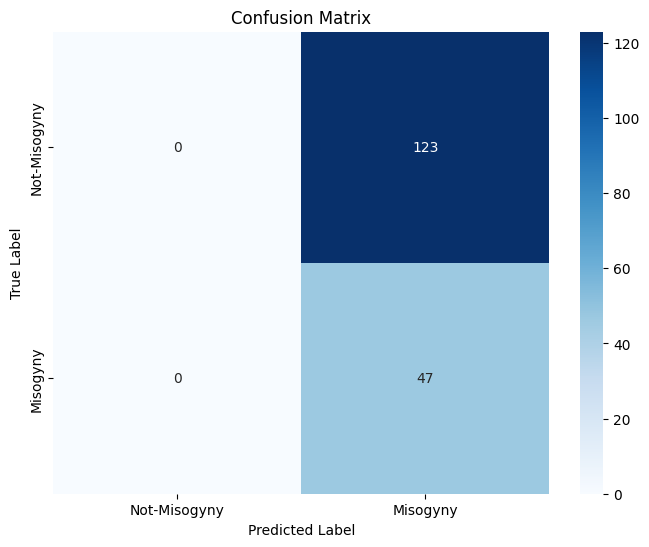

Dev Accuracy: 27.65%
Dev Weighted Accuracy (with penalties): 36.43%
Macro F1: 0.2166
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



Training: 100%|██████████| 50/50 [00:10<00:00,  4.64it/s]


Epoch 2/30 - Train Loss: 0.5943
Current learning rate: 2.00e-05


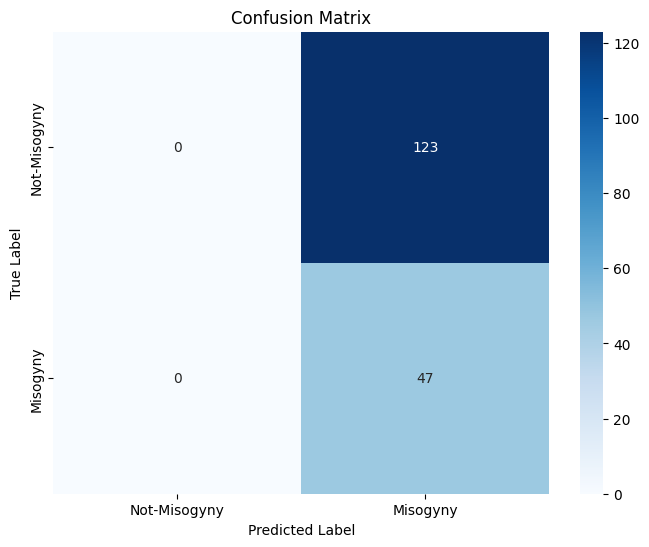

Dev Accuracy: 27.65%
Dev Weighted Accuracy (with penalties): 36.43%
Macro F1: 0.2166
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



Training: 100%|██████████| 50/50 [00:10<00:00,  4.58it/s]


Epoch 3/30 - Train Loss: 0.5660
Current learning rate: 2.00e-05


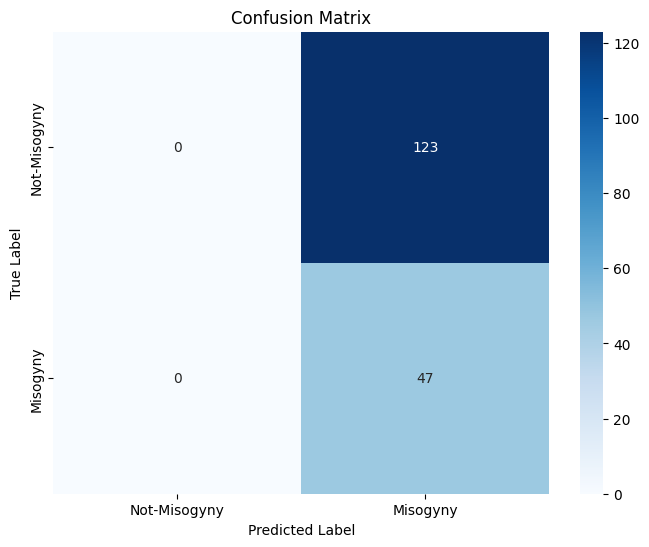

Dev Accuracy: 27.65%
Dev Weighted Accuracy (with penalties): 36.43%
Macro F1: 0.2166
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



Training: 100%|██████████| 50/50 [00:11<00:00,  4.49it/s]


Epoch 4/30 - Train Loss: 0.5407
Current learning rate: 2.00e-05


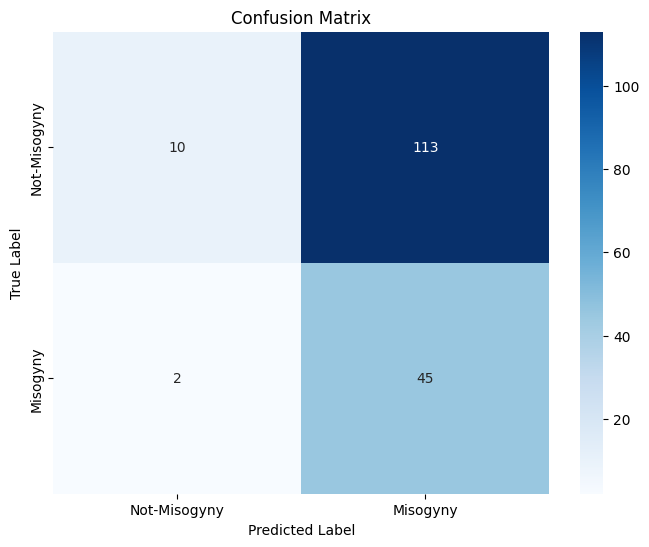

Dev Accuracy: 32.35%
Dev Weighted Accuracy (with penalties): 40.05%
Macro F1: 0.2936
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.08      0.15       123
           1       0.28      0.96      0.44        47

    accuracy                           0.32       170
   macro avg       0.56      0.52      0.29       170
weighted avg       0.68      0.32      0.23       170



Training: 100%|██████████| 50/50 [00:11<00:00,  4.35it/s]


Epoch 5/30 - Train Loss: 0.5110
Current learning rate: 2.00e-05


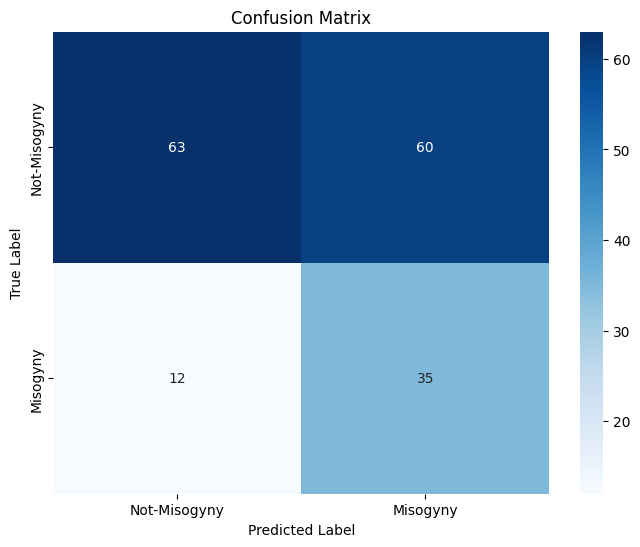

Dev Accuracy: 57.65%
Dev Weighted Accuracy (with penalties): 59.69%
Macro F1: 0.5647
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.51      0.64       123
           1       0.37      0.74      0.49        47

    accuracy                           0.58       170
   macro avg       0.60      0.63      0.56       170
weighted avg       0.71      0.58      0.60       170


Reduced learning rate to 1.60e-05


Training: 100%|██████████| 50/50 [00:11<00:00,  4.21it/s]


Epoch 6/30 - Train Loss: 0.4886
Current learning rate: 1.60e-05


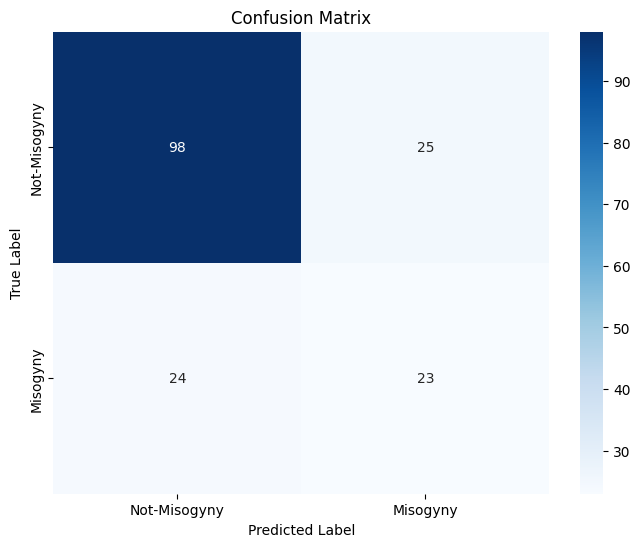

Dev Accuracy: 71.18%
Dev Weighted Accuracy (with penalties): 68.48%
Macro F1: 0.6421
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.48      0.49      0.48        47

    accuracy                           0.71       170
   macro avg       0.64      0.64      0.64       170
weighted avg       0.71      0.71      0.71       170



Training: 100%|██████████| 50/50 [00:12<00:00,  4.09it/s]


Epoch 7/30 - Train Loss: 0.4645
Current learning rate: 1.60e-05


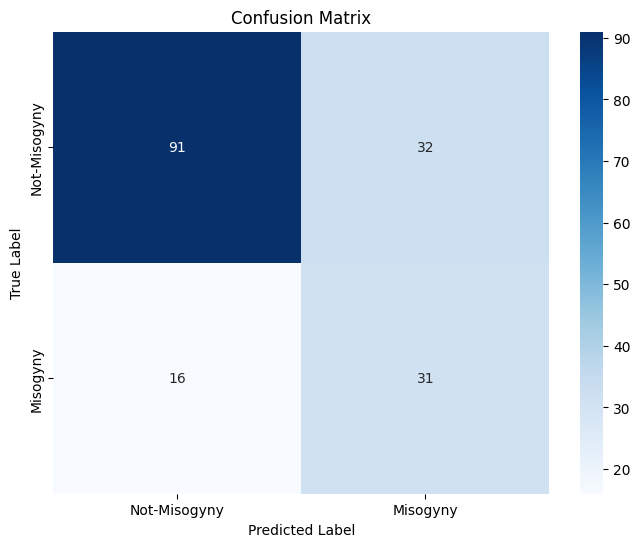

Dev Accuracy: 71.76%
Dev Weighted Accuracy (with penalties): 71.06%
Macro F1: 0.6775
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       123
           1       0.49      0.66      0.56        47

    accuracy                           0.72       170
   macro avg       0.67      0.70      0.68       170
weighted avg       0.75      0.72      0.73       170



Training: 100%|██████████| 50/50 [00:12<00:00,  3.90it/s]


Epoch 8/30 - Train Loss: 0.4492
Current learning rate: 1.60e-05


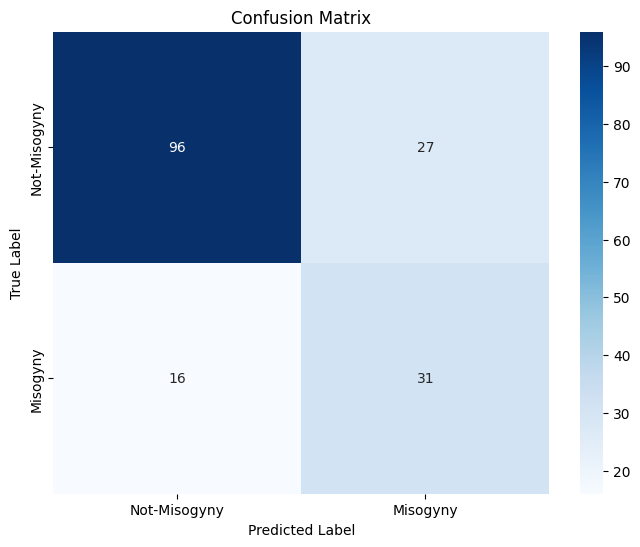

Dev Accuracy: 74.71%
Dev Weighted Accuracy (with penalties): 73.64%
Macro F1: 0.7037
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       123
           1       0.53      0.66      0.59        47

    accuracy                           0.75       170
   macro avg       0.70      0.72      0.70       170
weighted avg       0.77      0.75      0.75       170



Training: 100%|██████████| 50/50 [00:12<00:00,  4.06it/s]


Epoch 9/30 - Train Loss: 0.4292
Current learning rate: 1.60e-05


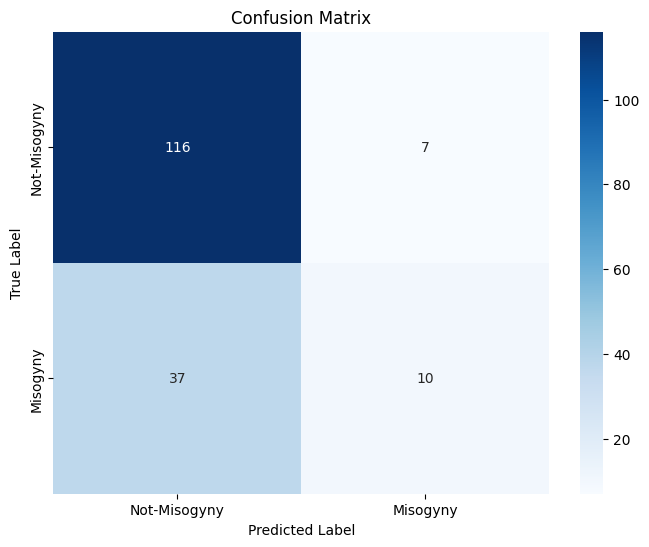

Dev Accuracy: 74.12%
Dev Weighted Accuracy (with penalties): 67.70%
Macro F1: 0.5765
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       123
           1       0.59      0.21      0.31        47

    accuracy                           0.74       170
   macro avg       0.67      0.58      0.58       170
weighted avg       0.71      0.74      0.69       170



Training: 100%|██████████| 50/50 [00:12<00:00,  4.12it/s]


Epoch 10/30 - Train Loss: 0.4141
Current learning rate: 1.60e-05


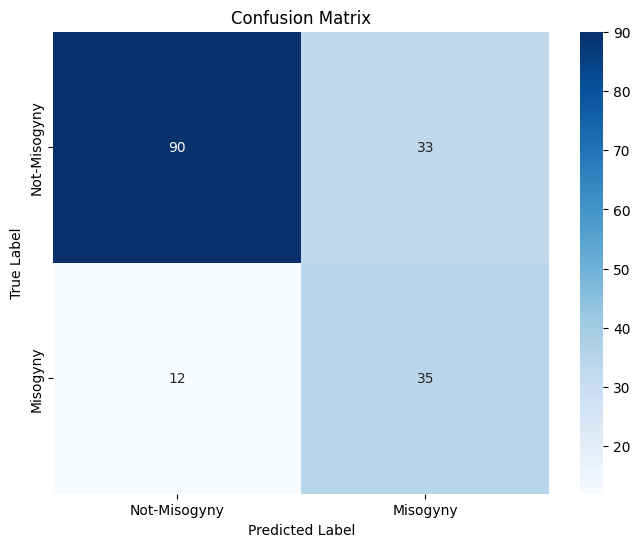

Dev Accuracy: 73.53%
Dev Weighted Accuracy (with penalties): 73.64%
Macro F1: 0.7043
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       123
           1       0.51      0.74      0.61        47

    accuracy                           0.74       170
   macro avg       0.70      0.74      0.70       170
weighted avg       0.78      0.74      0.75       170


Reduced learning rate to 1.28e-05


Training: 100%|██████████| 50/50 [00:12<00:00,  4.14it/s]


Epoch 11/30 - Train Loss: 0.3934
Current learning rate: 1.28e-05


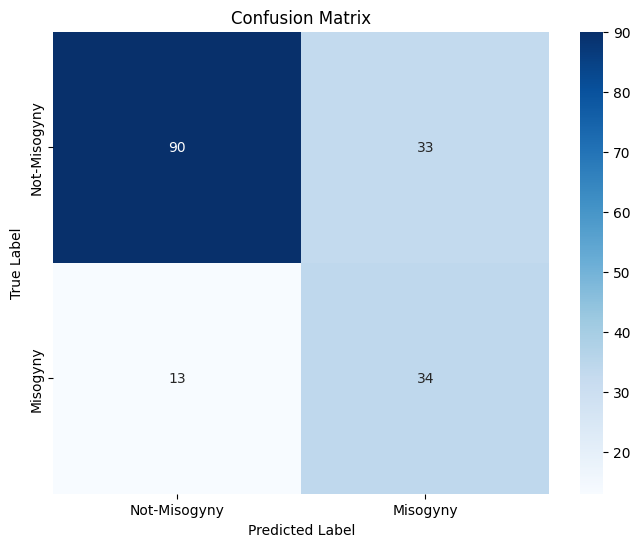

Dev Accuracy: 72.94%
Dev Weighted Accuracy (with penalties): 72.87%
Macro F1: 0.6965
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.80       123
           1       0.51      0.72      0.60        47

    accuracy                           0.73       170
   macro avg       0.69      0.73      0.70       170
weighted avg       0.77      0.73      0.74       170



Training: 100%|██████████| 50/50 [00:12<00:00,  4.11it/s]


Epoch 12/30 - Train Loss: 0.3754
Current learning rate: 1.28e-05


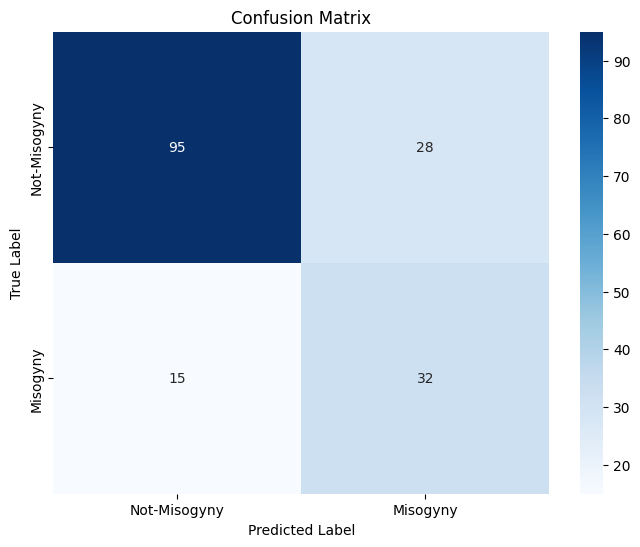

Dev Accuracy: 74.71%
Dev Weighted Accuracy (with penalties): 73.90%
Macro F1: 0.7068
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.82       123
           1       0.53      0.68      0.60        47

    accuracy                           0.75       170
   macro avg       0.70      0.73      0.71       170
weighted avg       0.77      0.75      0.76       170



Training: 100%|██████████| 50/50 [00:12<00:00,  4.09it/s]


Epoch 13/30 - Train Loss: 0.3623
Current learning rate: 1.28e-05


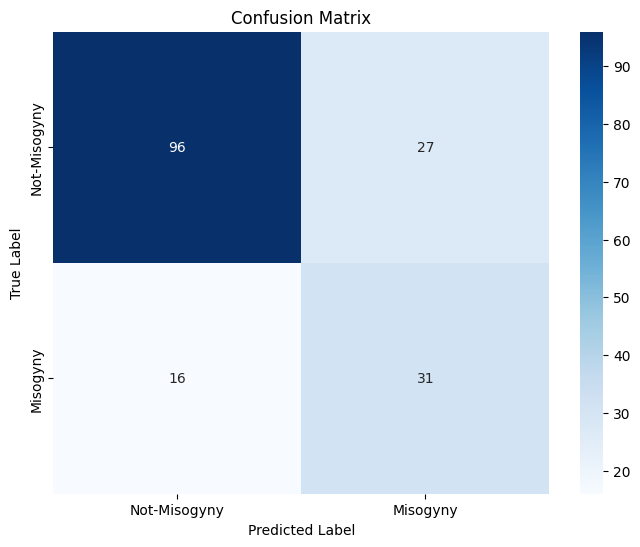

Dev Accuracy: 74.71%
Dev Weighted Accuracy (with penalties): 73.64%
Macro F1: 0.7037
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       123
           1       0.53      0.66      0.59        47

    accuracy                           0.75       170
   macro avg       0.70      0.72      0.70       170
weighted avg       0.77      0.75      0.75       170


Early stopping at epoch 13

Generating Confusion Matrix for Dev Set...


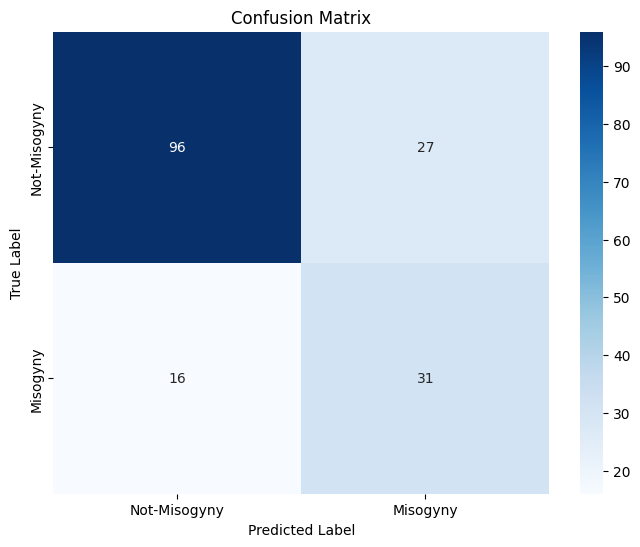


Final Test Evaluation:

Final Test Evaluation:


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from IPython.display import display, Image as IPImage
# Use these specific imports instead
from transformers import BertTokenizer, BertModel
from transformers import CLIPProcessor, CLIPModel

from sklearn.metrics import classification_report, f1_score
import pandas as pd
import numpy as np
from PIL import Image
import os
from torchvision import transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import copy
import gc
from tqdm import tqdm

# ------------------------ CONFIGURATION ------------------------
CONFIG = {
    'batch_size': 32,
    'lr': 2e-5,
    'gradient_accumulation': 4,
    'weight_decay': 1e-5,
    'max_epochs': 30,
    'patience': 5,
    'min_epochs': 8,
    'lr_patience': 2,
    'grad_clip': 1.0,
    'dropout_rate': 0.3,
    'image_size': 224,
    'class_weights': [1.0, 3.0],
    'lstm_hidden_dim': 256,
    'lstm_layers': 2,  # Changed from 1 to 2 to allow dropout
    'early_stop_threshold': 0.005,
    'feature_dim': 512  # Added for consistent feature dimensions
}

# ------------------------ IMPROVED MODEL ARCHITECTURE ------------------------

class ImprovedMultimodalModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_dim = CONFIG['feature_dim']
        
        # Text model
        self.bert = BertModel.from_pretrained('bert-base-chinese')
        for layer in self.bert.encoder.layer[:6]:
            for param in layer.parameters():
                param.requires_grad = False
        
        self.lstm = nn.LSTM(
            input_size=768,
            hidden_size=CONFIG['lstm_hidden_dim'],
            num_layers=CONFIG['lstm_layers'],
            batch_first=True,
            bidirectional=True,
            dropout=CONFIG['dropout_rate'] if CONFIG['lstm_layers'] > 1 else 0
        )
        self.text_proj = nn.Sequential(
            nn.Linear(CONFIG['lstm_hidden_dim'] * 2, CONFIG['feature_dim']),
            nn.LayerNorm(CONFIG['feature_dim']),
            nn.GELU(),
            nn.Dropout(0.3)
        )

        # Image model
        self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
        for param in self.clip.vision_model.parameters():
            param.requires_grad = False
        for param in self.clip.vision_model.encoder.layers[-1].parameters():
            param.requires_grad = True

        self.image_proj = nn.Sequential(
            nn.Linear(768, CONFIG['feature_dim']),
            nn.LayerNorm(CONFIG['feature_dim']),
            nn.GELU(),
            nn.Dropout(0.3)
        )

        # Gated Fusion
        # Change the gate network to output two feature_dim values (one for text, one for image)
        self.gate = nn.Sequential(
            nn.Linear(CONFIG['feature_dim'] * 2, CONFIG['feature_dim'] * 2),  # Output double the feature_dim
            nn.Sigmoid()
        )
        
        # Enhanced fusion layers
        self.fusion = nn.Sequential(
            nn.Linear(CONFIG['feature_dim'] * 2, CONFIG['feature_dim']),
            nn.LayerNorm(CONFIG['feature_dim']),
            nn.GELU(),
            nn.Dropout(0.4),
            nn.Linear(CONFIG['feature_dim'], CONFIG['feature_dim']),
            nn.LayerNorm(CONFIG['feature_dim']),
            nn.GELU(),
            nn.Dropout(0.3)
        )

        # Enhanced classifier
        self.classifier = nn.Sequential(
            nn.Linear(CONFIG['feature_dim'], CONFIG['feature_dim']//2),
            nn.LayerNorm(CONFIG['feature_dim']//2),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(CONFIG['feature_dim']//2, CONFIG['feature_dim']//4),
            nn.LayerNorm(CONFIG['feature_dim']//4),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.Linear(CONFIG['feature_dim']//4, 2)
        )

    def forward(self, input_ids, attention_mask, pixel_values):
        # Text features
        text_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_lstm_out, _ = self.lstm(text_outputs.last_hidden_state)
        text_features = self.text_proj(text_lstm_out[:, -1, :])
    
        # Image features
        with torch.no_grad():
            image_outputs = self.clip.vision_model(pixel_values=pixel_values)
        image_features = self.image_proj(image_outputs.last_hidden_state.mean(dim=1))
    
        # Gated fusion
        combined = torch.cat([text_features, image_features], dim=1)
        gate_values = self.gate(combined)
        
        # Split gate values into text and image gates
        gate_text, gate_image = torch.split(gate_values, self.feature_dim, dim=1)
        
        # Apply gating
        gated_text = text_features * gate_text
        gated_image = image_features * gate_image
        
        # Final fusion
        fused = self.fusion(torch.cat([gated_text, gated_image], dim=1))
        
        return self.classifier(fused)



# ------------------------ IMPROVED DATA LOADING ------------------------

class MultimodalDataset(Dataset):
    def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.image_dir = image_dir
        self.is_test = is_test
        self.transform = transform or transforms.Compose([
            transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                              std=[0.26862954, 0.26130258, 0.27577711])
        ])
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        text = str(row['transcriptions'])
        image_name = str(row['image_name'])
        label = row['labels'] if 'labels' in row else -1
        
        # Handle image paths
        image_path = os.path.join(self.image_dir, image_name)
        if not os.path.exists(image_path) and image_name.startswith('aug_'):
            image_path = os.path.join(self.image_dir.replace('augmented_images', 'preprocessed/images'), image_name[4:])
        
        try:
            image = Image.open(image_path).convert('RGB')
            image = self.transform(image)
        except:
            image = torch.zeros(3, CONFIG['image_size'], CONFIG['image_size'])
        
        encoding = self.tokenizer(
            text, 
            padding='max_length', 
            truncation=True, 
            max_length=128, 
            return_tensors='pt'
        )
        # Remove token_type_ids if not needed
        if 'token_type_ids' in encoding:
            del encoding['token_type_ids']
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': image,
            'labels': label if not self.is_test else -1
        }

def weighted_accuracy(y_true, y_pred, class_weights={0: 1.0, 1: 1.5}):
    """
    Calculate accuracy with different penalties for misclassifications:
    - Misclassifying class 0 (Not-Misogyny) as class 1: penalty = 1.0
    - Misclassifying class 1 (Misogyny) as class 0: penalty = 1.5
    """
    total_penalty = 0
    max_possible_penalty = 0
    
    for true, pred in zip(y_true, y_pred):
        if true != pred:
            penalty = class_weights.get(true, 1.0)  # Default to 1.0 if class not in weights
            total_penalty += penalty
        max_possible_penalty += class_weights.get(true, 1.0)
    
    if max_possible_penalty == 0:
        return 1.0  # Perfect accuracy if no samples
    
    return 1.0 - (total_penalty / max_possible_penalty)

# ------------------------ TRAINING UTILITIES ------------------------

def evaluate_model(model, data_loader, device, is_test=False):
    model.eval()
    y_true, y_pred = [], []
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )
            preds = torch.argmax(outputs, dim=1)
            y_pred.extend(preds.cpu().numpy())
            
            if not is_test and 'labels' in batch:
                labels = batch['labels'].to(device)
                y_true.extend(labels.cpu().numpy())
    
    if not is_test and len(y_true) > 0:
        # Calculate regular metrics
        accuracy = 100 * (np.array(y_true) == np.array(y_pred)).mean()
        macro_f1 = f1_score(y_true, y_pred, average='macro')
        weighted_f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, zero_division=0)
        
        # Calculate weighted accuracy with penalties
        weighted_acc = 100 * weighted_accuracy(y_true, y_pred)
        
        metrics = {
            'accuracy': accuracy,
            'weighted_accuracy': weighted_acc,  # New metric with penalties
            'macro_f1': macro_f1,
            'weighted_f1': weighted_f1,
            'report': report
        }
        return y_pred, metrics
    return y_pred, None

def train_epoch(model, train_loader, optimizer, criterion, device, scaler):
    model.train()
    total_loss = 0
    i = 0
    
    for batch in tqdm(train_loader, desc="Training"):
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)
        
        # Updated autocast call
        with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )
            loss = criterion(outputs, labels) / CONFIG['gradient_accumulation']
        
        scaler.scale(loss).backward()
        
        if (i + 1) % CONFIG['gradient_accumulation'] == 0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), CONFIG['grad_clip'])
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
        
        total_loss += loss.item() * CONFIG['gradient_accumulation']
        i += 1
    
    return total_loss / len(train_loader)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Add this to your evaluate_model function before returning metrics:
def evaluate_model(model, data_loader, device, is_test=False):
    model.eval()
    y_true, y_pred = [], []
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )
            preds = torch.argmax(outputs, dim=1)
            y_pred.extend(preds.cpu().numpy())
            
            if not is_test and 'labels' in batch:
                labels = batch['labels'].to(device)
                y_true.extend(labels.cpu().numpy())
    
    if not is_test and len(y_true) > 0:
        # Calculate metrics
        accuracy = 100 * (np.array(y_true) == np.array(y_pred)).mean()
        macro_f1 = f1_score(y_true, y_pred, average='macro')
        weighted_f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, zero_division=0)
        weighted_acc = 100 * weighted_accuracy(y_true, y_pred)
        
        # Confusion Matrix
        class_names = ['Not-Misogyny', 'Misogyny']
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.savefig('confusion_matrix.png', bbox_inches='tight')
        plt.show()  # Add this line
        plt.close()

        
        
        metrics = {
            'accuracy': accuracy,
            'weighted_accuracy': weighted_acc,
            'macro_f1': macro_f1,
            'weighted_f1': weighted_f1,
            'report': report,
            'confusion_matrix': cm
        }
        return y_pred, metrics
    return y_pred, None

# ------------------------ MAIN TRAINING FUNCTION ------------------------

def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
    torch.cuda.empty_cache()
    gc.collect()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Initialize components
    tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
    # Data transforms
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(0.1, 0.1, 0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                         std=[0.26862954, 0.26130258, 0.27577711])
    ])
    
    val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                         std=[0.26862954, 0.26130258, 0.27577711])
    ])
    
    # Datasets and loaders
    train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
    dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
    test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
    train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4, pin_memory=True)
    dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    
    # Model and training setup
    model = ImprovedMultimodalModel().to(device)
    
    # Loss function with class weighting
    class_weights = torch.tensor(CONFIG['class_weights'], dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    
    optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
    scaler = torch.cuda.amp.GradScaler()
    
    # Training loop with enhanced LR scheduling
    best_f1 = 0
    best_model = None
    epochs_no_improve = 0
    current_lr = CONFIG['lr']
    
    for epoch in range(CONFIG['max_epochs']):
        # Dynamic learning rate adjustment based on epoch
        if epoch > 0:
            if epoch % 5 == 0:  # Adjust LR every 5 epochs
                current_lr *= 0.8  # Reduce LR by 20%
                for param_group in optimizer.param_groups:
                    param_group['lr'] = current_lr
                print(f"\nReduced learning rate to {current_lr:.2e}")
        
        train_loss = train_epoch(model, train_loader, optimizer, criterion, device, scaler)
        
        print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']} - Train Loss: {train_loss:.4f}")
        print(f"Current learning rate: {current_lr:.2e}")
        
        # Evaluation
        _, dev_metrics = evaluate_model(model, dev_loader, device)
        if dev_metrics:
            print(f"Dev Accuracy: {dev_metrics['accuracy']:.2f}%")
            print(f"Dev Weighted Accuracy (with penalties): {dev_metrics['weighted_accuracy']:.2f}%")
            print(f"Macro F1: {dev_metrics['macro_f1']:.4f}")
            print("Classification Report:")
            print(dev_metrics['report'])
            
            # Early stopping based on weighted F1
            if dev_metrics['weighted_f1'] > best_f1 + CONFIG['early_stop_threshold']:
                best_f1 = dev_metrics['weighted_f1']
                best_model = copy.deepcopy(model.state_dict())
                epochs_no_improve = 0
                torch.save(model.state_dict(), 'best_model.pth')
            else:
                epochs_no_improve += 1
                
            scheduler.step(dev_metrics['weighted_f1'])
            
            if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
                print(f"\nEarly stopping at epoch {epoch + 1}")
                break
    
    if best_model:
        model.load_state_dict(best_model)
    
    # Generate confusion matrix for dev set
    print("\nGenerating Confusion Matrix for Dev Set...")
    model.eval()
    _, dev_metrics = evaluate_model(model, dev_loader, device)
    
    print("\nFinal Test Evaluation:")
    test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
    print("\nFinal Test Evaluation:")
    test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
    # Create submission
    submission_df = pd.DataFrame({
        'id': test_df['image_name'].str.extract('(\d+)')[0].astype(int),
        'predictions': test_preds
    })
    submission_df.to_csv('submission11.csv', index=False)
    
    return model

if __name__ == '__main__':
    # Load data
    train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
    dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
    test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
    # Map labels
    label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
    train_df['labels'] = train_df['labels'].map(label_map)
    dev_df['labels'] = dev_df['labels'].map(label_map)
    
    # Verify class distribution
    print("\nClass distribution in training set:")
    print(train_df['labels'].value_counts())
    
    print("\nClass distribution in dev set:")
    print(dev_df['labels'].value_counts())
    
    # Paths
    train_image_dir = '/kaggle/working/augmented_images'
    test_image_dir = '/kaggle/working/preprocessed_test/images'
    
    # Train and evaluate
    model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)

**vit+bert+bilstm(gated)256*256**


Class distribution in training set:
labels
0    841
1    746
Name: count, dtype: int64

Class distribution in dev set:
labels
0    123
1     47
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (in


Epoch 1/30 - Train Loss: 0.7193
Current learning rate: 2.00e-05


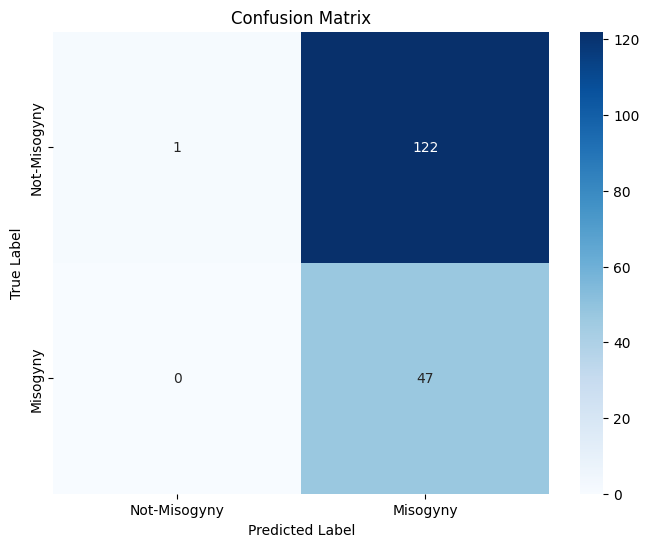

Dev Accuracy: 28.24%
Dev Weighted Accuracy (with penalties): 36.95%
Macro F1: 0.2257
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       123
           1       0.28      1.00      0.44        47

    accuracy                           0.28       170
   macro avg       0.64      0.50      0.23       170
weighted avg       0.80      0.28      0.13       170



Training: 100%|██████████| 50/50 [00:18<00:00,  2.73it/s]


Epoch 2/30 - Train Loss: 0.6296
Current learning rate: 2.00e-05


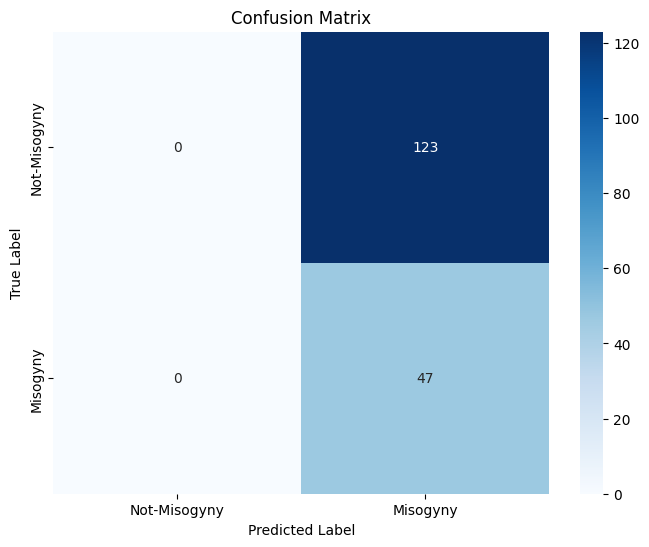

Dev Accuracy: 27.65%
Dev Weighted Accuracy (with penalties): 36.43%
Macro F1: 0.2166
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



Training: 100%|██████████| 50/50 [00:18<00:00,  2.65it/s]


Epoch 3/30 - Train Loss: 0.5826
Current learning rate: 2.00e-05


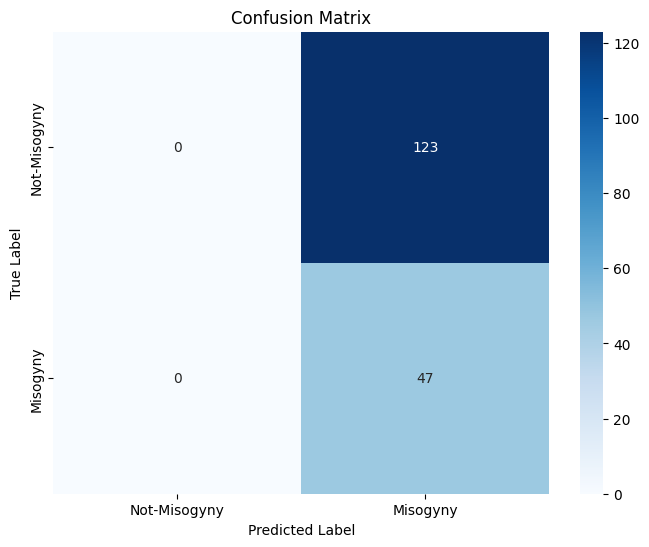

Dev Accuracy: 27.65%
Dev Weighted Accuracy (with penalties): 36.43%
Macro F1: 0.2166
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



Training: 100%|██████████| 50/50 [00:19<00:00,  2.59it/s]


Epoch 4/30 - Train Loss: 0.5473
Current learning rate: 2.00e-05


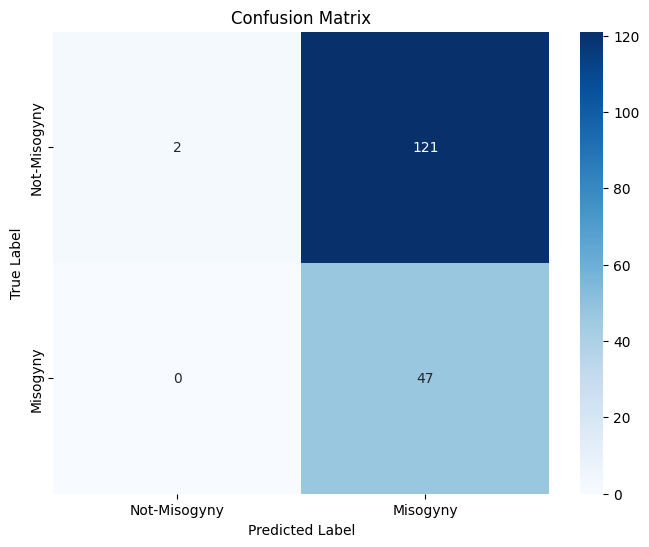

Dev Accuracy: 28.82%
Dev Weighted Accuracy (with penalties): 37.47%
Macro F1: 0.2346
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       123
           1       0.28      1.00      0.44        47

    accuracy                           0.29       170
   macro avg       0.64      0.51      0.23       170
weighted avg       0.80      0.29      0.14       170



Training: 100%|██████████| 50/50 [00:19<00:00,  2.63it/s]


Epoch 5/30 - Train Loss: 0.5290
Current learning rate: 2.00e-05


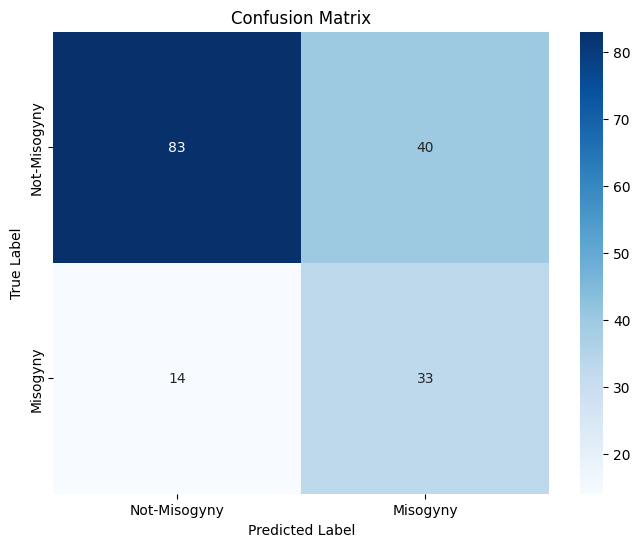

Dev Accuracy: 68.24%
Dev Weighted Accuracy (with penalties): 68.48%
Macro F1: 0.6523
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75       123
           1       0.45      0.70      0.55        47

    accuracy                           0.68       170
   macro avg       0.65      0.69      0.65       170
weighted avg       0.74      0.68      0.70       170


Reduced learning rate to 1.60e-05


Training: 100%|██████████| 50/50 [00:19<00:00,  2.62it/s]


Epoch 6/30 - Train Loss: 0.5106
Current learning rate: 1.60e-05


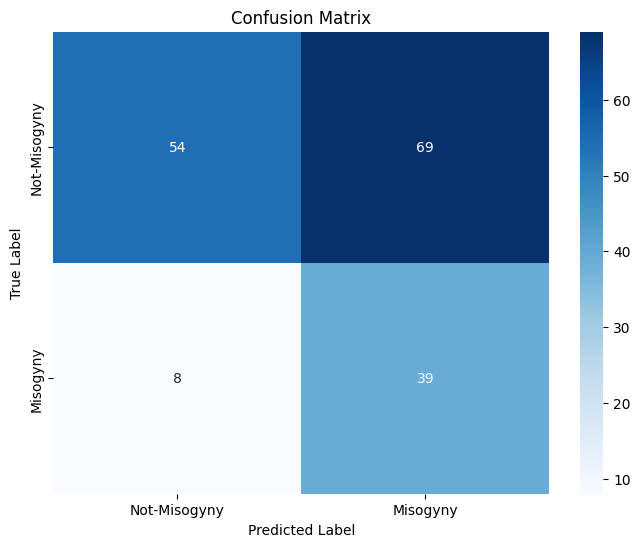

Dev Accuracy: 54.71%
Dev Weighted Accuracy (with penalties): 58.14%
Macro F1: 0.5435
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.44      0.58       123
           1       0.36      0.83      0.50        47

    accuracy                           0.55       170
   macro avg       0.62      0.63      0.54       170
weighted avg       0.73      0.55      0.56       170



Training: 100%|██████████| 50/50 [00:19<00:00,  2.61it/s]


Epoch 7/30 - Train Loss: 0.4904
Current learning rate: 1.60e-05


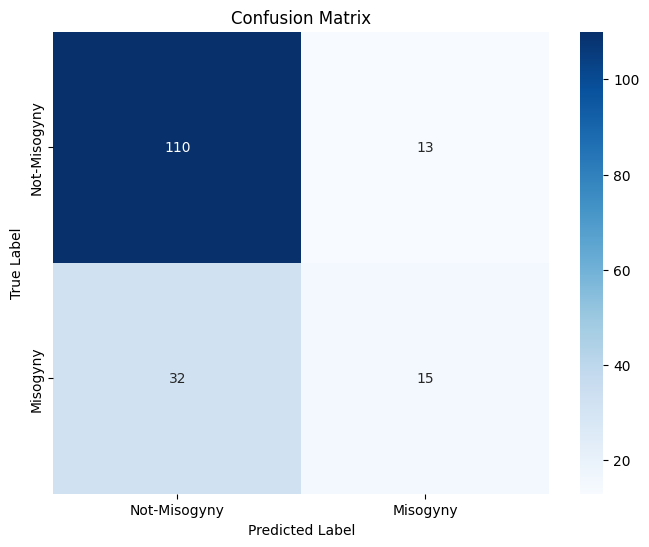

Dev Accuracy: 73.53%
Dev Weighted Accuracy (with penalties): 68.48%
Macro F1: 0.6151
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       123
           1       0.54      0.32      0.40        47

    accuracy                           0.74       170
   macro avg       0.66      0.61      0.62       170
weighted avg       0.71      0.74      0.71       170



Training: 100%|██████████| 50/50 [00:18<00:00,  2.64it/s]


Epoch 8/30 - Train Loss: 0.4624
Current learning rate: 1.60e-05


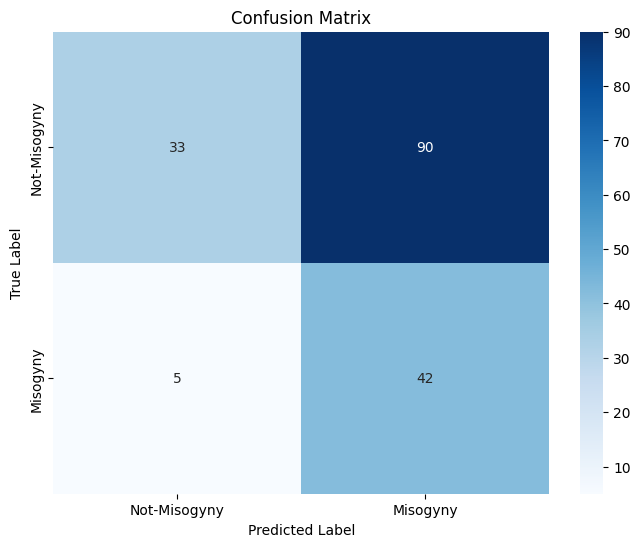

Dev Accuracy: 44.12%
Dev Weighted Accuracy (with penalties): 49.61%
Macro F1: 0.4396
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.27      0.41       123
           1       0.32      0.89      0.47        47

    accuracy                           0.44       170
   macro avg       0.59      0.58      0.44       170
weighted avg       0.72      0.44      0.43       170



Training: 100%|██████████| 50/50 [00:19<00:00,  2.60it/s]


Epoch 9/30 - Train Loss: 0.4528
Current learning rate: 1.60e-05


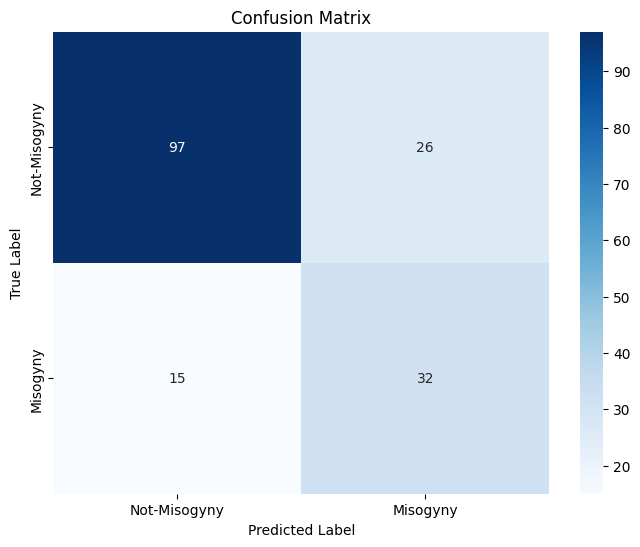

Dev Accuracy: 75.88%
Dev Weighted Accuracy (with penalties): 74.94%
Macro F1: 0.7175
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       123
           1       0.55      0.68      0.61        47

    accuracy                           0.76       170
   macro avg       0.71      0.73      0.72       170
weighted avg       0.78      0.76      0.77       170



Training: 100%|██████████| 50/50 [00:19<00:00,  2.61it/s]


Epoch 10/30 - Train Loss: 0.4238
Current learning rate: 1.60e-05


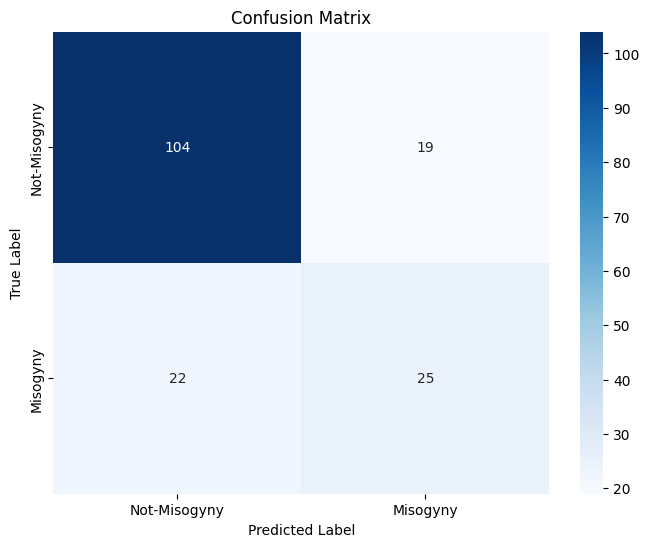

Dev Accuracy: 75.88%
Dev Weighted Accuracy (with penalties): 73.13%
Macro F1: 0.6924
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.57      0.53      0.55        47

    accuracy                           0.76       170
   macro avg       0.70      0.69      0.69       170
weighted avg       0.75      0.76      0.76       170


Reduced learning rate to 1.28e-05


Training: 100%|██████████| 50/50 [00:19<00:00,  2.61it/s]


Epoch 11/30 - Train Loss: 0.4159
Current learning rate: 1.28e-05


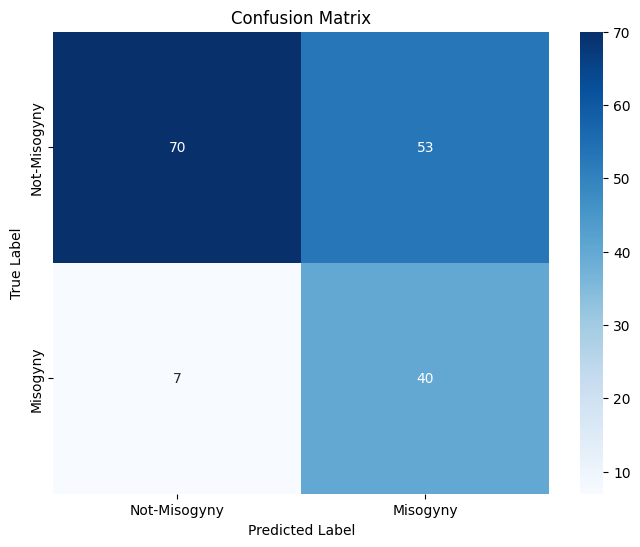

Dev Accuracy: 64.71%
Dev Weighted Accuracy (with penalties): 67.18%
Macro F1: 0.6357
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70       123
           1       0.43      0.85      0.57        47

    accuracy                           0.65       170
   macro avg       0.67      0.71      0.64       170
weighted avg       0.78      0.65      0.66       170



Training: 100%|██████████| 50/50 [00:19<00:00,  2.63it/s]


Epoch 12/30 - Train Loss: 0.4010
Current learning rate: 1.28e-05


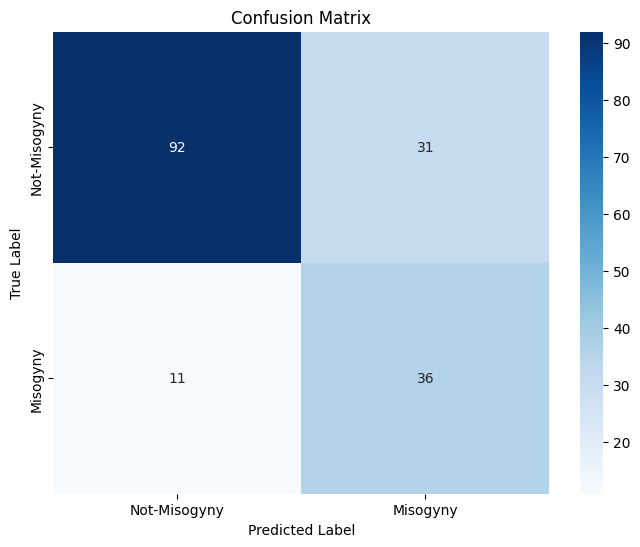

Dev Accuracy: 75.29%
Dev Weighted Accuracy (with penalties): 75.45%
Macro F1: 0.7229
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       123
           1       0.54      0.77      0.63        47

    accuracy                           0.75       170
   macro avg       0.72      0.76      0.72       170
weighted avg       0.79      0.75      0.76       170



Training: 100%|██████████| 50/50 [00:18<00:00,  2.64it/s]


Epoch 13/30 - Train Loss: 0.3658
Current learning rate: 1.28e-05


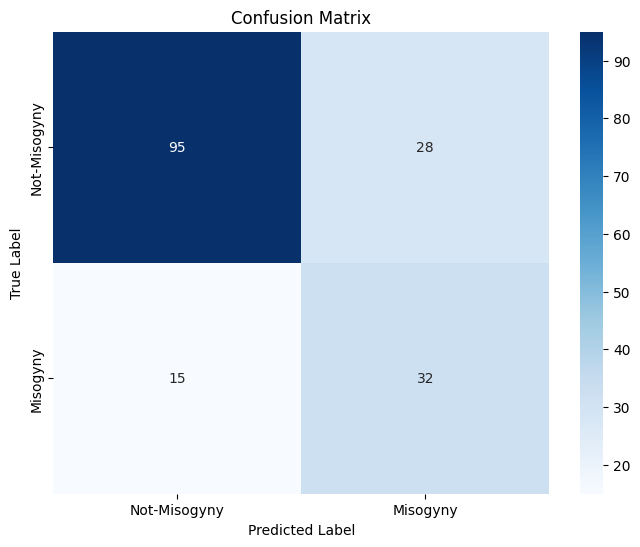

Dev Accuracy: 74.71%
Dev Weighted Accuracy (with penalties): 73.90%
Macro F1: 0.7068
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.82       123
           1       0.53      0.68      0.60        47

    accuracy                           0.75       170
   macro avg       0.70      0.73      0.71       170
weighted avg       0.77      0.75      0.76       170



Training: 100%|██████████| 50/50 [00:18<00:00,  2.63it/s]


Epoch 14/30 - Train Loss: 0.3646
Current learning rate: 1.28e-05


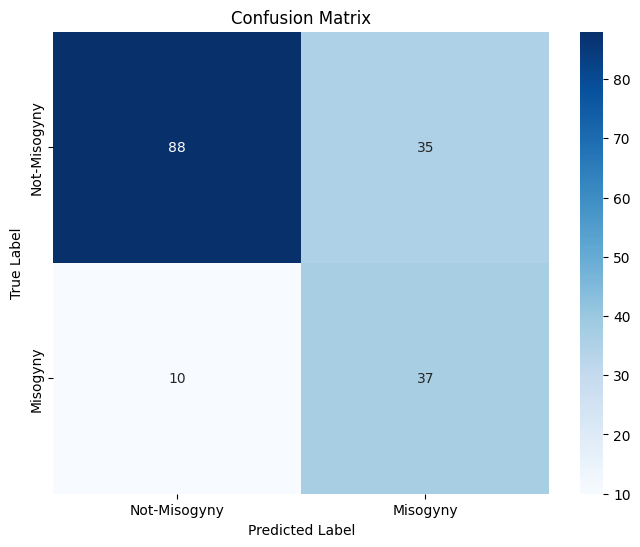

Dev Accuracy: 73.53%
Dev Weighted Accuracy (with penalties): 74.16%
Macro F1: 0.7091
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       123
           1       0.51      0.79      0.62        47

    accuracy                           0.74       170
   macro avg       0.71      0.75      0.71       170
weighted avg       0.79      0.74      0.75       170


Early stopping at epoch 14

Generating Confusion Matrix for Dev Set...


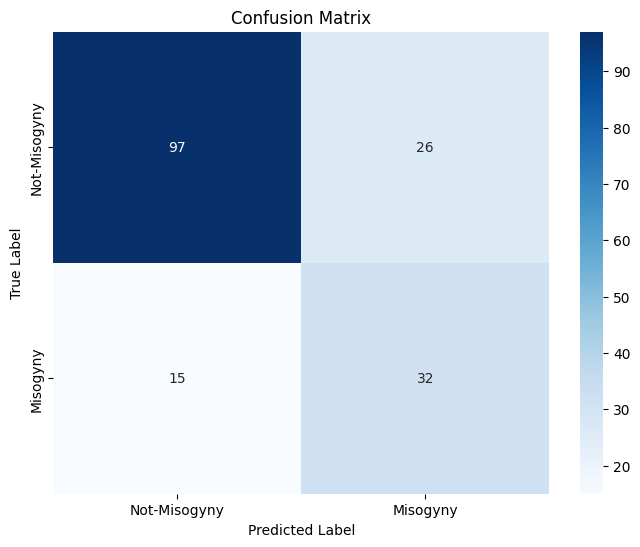


Final Test Evaluation:


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
from sklearn.metrics import classification_report, f1_score
import pandas as pd
import numpy as np
from PIL import Image
import os
from torchvision import transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import copy
import gc
from tqdm import tqdm
import torchvision.models as models
from transformers import BertModel, BertTokenizer

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# ------------------------ CONFIGURATION ------------------------
CONFIG = {
    'batch_size': 32,
    'lr': 2e-5,
    'gradient_accumulation': 4,
    'weight_decay': 1e-5,
    'max_epochs': 30,
    'patience': 5,
    'min_epochs': 8,
    'lr_patience': 2,
    'grad_clip': 1.0,
    'dropout_rate': 0.3,
    'image_size': 256,  # Changed from 224 to 256
    'class_weights': [1.0, 3.0],
    'lstm_hidden_dim': 256,
    'lstm_layers': 2,
    'early_stop_threshold': 0.005,
    'feature_dim': 512
}


# ------------------------ IMPROVED MODEL ARCHITECTURE ------------------------

# In the ImprovedMultimodalModel class, modify the ViT initialization:
class ImprovedMultimodalModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_dim = CONFIG['feature_dim']
        
        # Text model (unchanged)
        self.bert = BertModel.from_pretrained('bert-base-chinese')
        for layer in self.bert.encoder.layer[:6]:
            for param in layer.parameters():
                param.requires_grad = False
        
        self.lstm = nn.LSTM(
            input_size=768,
            hidden_size=CONFIG['lstm_hidden_dim'],
            num_layers=CONFIG['lstm_layers'],
            batch_first=True,
            bidirectional=True,
            dropout=CONFIG['dropout_rate'] if CONFIG['lstm_layers'] > 1 else 0
        )
        self.text_proj = nn.Sequential(
            nn.Linear(CONFIG['lstm_hidden_dim'] * 2, CONFIG['feature_dim']),
            nn.LayerNorm(CONFIG['feature_dim']),
            nn.GELU(),
            nn.Dropout(0.3)
        )
        
        # Image model - Modified ViT for 256x256 input
        self.vit = models.vit_b_16(pretrained=True)
        
        # 1. Modify the image_size expectation
        self.vit.image_size = CONFIG['image_size']  # Update expected image size
        
        # 2. Modify the patch embedding
        original_patch_embed = self.vit.conv_proj
        new_patch_embed = nn.Conv2d(
            in_channels=original_patch_embed.in_channels,
            out_channels=original_patch_embed.out_channels,
            kernel_size=original_patch_embed.kernel_size,
            stride=original_patch_embed.stride,
            padding=original_patch_embed.padding,
            bias=(original_patch_embed.bias is not None))
        
        # Copy weights with interpolation
        with torch.no_grad():
            new_patch_embed.weight.copy_(nn.functional.interpolate(
                original_patch_embed.weight,
                size=new_patch_embed.weight.shape[2:],
                mode='nearest'))
            if original_patch_embed.bias is not None:
                new_patch_embed.bias.copy_(original_patch_embed.bias)
        
        self.vit.conv_proj = new_patch_embed
        
        # 3. Update the positional embeddings
        old_pos_embed = self.vit.encoder.pos_embedding
        grid_size = CONFIG['image_size'] // self.vit.patch_size
        num_patches = grid_size ** 2
        new_pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, old_pos_embed.shape[-1]))
        
        # Copy old positional embeddings with interpolation
        with torch.no_grad():
            # Class token embedding stays the same
            new_pos_embed[:, 0] = old_pos_embed[:, 0]
            # Interpolate patch embeddings
            new_pos_embed[:, 1:] = nn.functional.interpolate(
                old_pos_embed[:, 1:].permute(0, 2, 1).view(1, -1, 14, 14),
                size=(grid_size, grid_size),
                mode='bicubic'
            ).view(1, -1, grid_size * grid_size).permute(0, 2, 1)
        
        self.vit.encoder.pos_embedding = new_pos_embed
        
        # Remove the classification head
        self.vit.heads = nn.Identity()
        
        # Freeze/unfreeze layers
        for param in self.vit.parameters():
            param.requires_grad = False
        for layer in list(self.vit.encoder.layers)[-4:]:
            for param in layer.parameters():
                param.requires_grad = True
        
        self.image_proj = nn.Sequential(
            nn.Linear(768, CONFIG['feature_dim']),
            nn.LayerNorm(CONFIG['feature_dim']),
            nn.GELU(),
            nn.Dropout(0.3)
        )
        
        # Rest of the model remains unchanged
        self.gate = nn.Sequential(
            nn.Linear(CONFIG['feature_dim'] * 2, CONFIG['feature_dim'] * 2),
            nn.Sigmoid()
        )
        
        self.fusion = nn.Sequential(
            nn.Linear(CONFIG['feature_dim'] * 2, CONFIG['feature_dim']),
            nn.LayerNorm(CONFIG['feature_dim']),
            nn.GELU(),
            nn.Dropout(0.4),
            nn.Linear(CONFIG['feature_dim'], CONFIG['feature_dim']),
            nn.LayerNorm(CONFIG['feature_dim']),
            nn.GELU(),
            nn.Dropout(0.3)
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(CONFIG['feature_dim'], CONFIG['feature_dim']//2),
            nn.LayerNorm(CONFIG['feature_dim']//2),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(CONFIG['feature_dim']//2, CONFIG['feature_dim']//4),
            nn.LayerNorm(CONFIG['feature_dim']//4),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.Linear(CONFIG['feature_dim']//4, 2)
        )

    def forward(self, input_ids, attention_mask, pixel_values):
        # Text features (unchanged)
        text_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_lstm_out, _ = self.lstm(text_outputs.last_hidden_state)
        text_features = self.text_proj(text_lstm_out[:, -1, :])
        
        # Image features - now getting 768-dim features from ViT
        with torch.no_grad():
            image_features = self.vit(pixel_values)  # Now outputs [batch_size, 768]
        image_features = self.image_proj(image_features)
        
        # Rest of forward pass remains unchanged
        combined = torch.cat([text_features, image_features], dim=1)
        gate_values = self.gate(combined)
        gate_text, gate_image = torch.split(gate_values, self.feature_dim, dim=1)
        gated_text = text_features * gate_text
        gated_image = image_features * gate_image
        
        fused = self.fusion(torch.cat([gated_text, gated_image], dim=1))
        return self.classifier(fused)



# ------------------------ IMPROVED DATA LOADING ------------------------

class MultimodalDataset(Dataset):
    def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.image_dir = image_dir
        self.is_test = is_test
        self.transform = transform or transforms.Compose([
            transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                              std=[0.26862954, 0.26130258, 0.27577711])
        ])
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        text = str(row['transcriptions'])
        image_name = str(row['image_name'])
        label = row['labels'] if 'labels' in row else -1
        
        # Handle image paths
        image_path = os.path.join(self.image_dir, image_name)
        if not os.path.exists(image_path) and image_name.startswith('aug_'):
            image_path = os.path.join(self.image_dir.replace('augmented_images', 'preprocessed/images'), image_name[4:])
        
        try:
            image = Image.open(image_path).convert('RGB')
            image = self.transform(image)
        except:
            image = torch.zeros(3, CONFIG['image_size'], CONFIG['image_size'])
        
        encoding = self.tokenizer(
            text, 
            padding='max_length', 
            truncation=True, 
            max_length=128, 
            return_tensors='pt'
        )
        # Remove token_type_ids if not needed
        if 'token_type_ids' in encoding:
            del encoding['token_type_ids']
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': image,
            'labels': label if not self.is_test else -1
        }

def weighted_accuracy(y_true, y_pred, class_weights={0: 1.0, 1: 1.5}):
    """
    Calculate accuracy with different penalties for misclassifications:
    - Misclassifying class 0 (Not-Misogyny) as class 1: penalty = 1.0
    - Misclassifying class 1 (Misogyny) as class 0: penalty = 1.5
    """
    total_penalty = 0
    max_possible_penalty = 0
    
    for true, pred in zip(y_true, y_pred):
        if true != pred:
            penalty = class_weights.get(true, 1.0)  # Default to 1.0 if class not in weights
            total_penalty += penalty
        max_possible_penalty += class_weights.get(true, 1.0)
    
    if max_possible_penalty == 0:
        return 1.0  # Perfect accuracy if no samples
    
    return 1.0 - (total_penalty / max_possible_penalty)

# ------------------------ TRAINING UTILITIES ------------------------



def train_epoch(model, train_loader, optimizer, criterion, device, scaler):
    model.train()
    total_loss = 0
    i = 0
    
    for batch in tqdm(train_loader, desc="Training"):
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)
        
        # Updated autocast call
        with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )
            loss = criterion(outputs, labels) / CONFIG['gradient_accumulation']
        
        scaler.scale(loss).backward()
        
        if (i + 1) % CONFIG['gradient_accumulation'] == 0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), CONFIG['grad_clip'])
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
        
        total_loss += loss.item() * CONFIG['gradient_accumulation']
        i += 1
    
    return total_loss / len(train_loader)
def evaluate_model(model, data_loader, device, is_test=False):
    
    model.eval()
    
    y_true, y_pred = [], []
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )
            preds = torch.argmax(outputs, dim=1)
            y_pred.extend(preds.cpu().numpy())
            
            if not is_test and 'labels' in batch:
                labels = batch['labels'].to(device)
                y_true.extend(labels.cpu().numpy())
    
    if not is_test and len(y_true) > 0:
        # Calculate regular metrics
        accuracy = 100 * (np.array(y_true) == np.array(y_pred)).mean()
        macro_f1 = f1_score(y_true, y_pred, average='macro')
        weighted_f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, zero_division=0)
        
        # Calculate weighted accuracy with penalties
        weighted_acc = 100 * weighted_accuracy(y_true, y_pred)
        
        class_names = ['Not-Misogyny', 'Misogyny']
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.savefig('confusion_matrix.png', bbox_inches='tight')
        plt.show()  # Add this line
        plt.close()

        
        
        metrics = {
            'accuracy': accuracy,
            'weighted_accuracy': weighted_acc,
            'macro_f1': macro_f1,
            'weighted_f1': weighted_f1,
            'report': report,
            'confusion_matrix': cm
        }
        return y_pred, metrics
    return y_pred, None
# ------------------------ MAIN TRAINING FUNCTION ------------------------

def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
    torch.cuda.empty_cache()
    gc.collect()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Initialize components
    tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
    # Data transforms
    # Data transforms - updated for 256x256
    train_transform = transforms.Compose([
        transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(0.1, 0.1, 0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                         std=[0.26862954, 0.26130258, 0.27577711])
    ])
    
    val_transform = transforms.Compose([
        transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                         std=[0.26862954, 0.26130258, 0.27577711])
    ])
    
    # Datasets and loaders
    train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
    dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
    test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
    train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4, pin_memory=True)
    dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    
    # Model and training setup
    model = ImprovedMultimodalModel().to(device)
    
    # Loss function with class weighting
    class_weights = torch.tensor(CONFIG['class_weights'], dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    
    optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
    scaler = torch.cuda.amp.GradScaler()
    
    # Training loop with enhanced LR scheduling
    best_f1 = 0
    best_model = None
    epochs_no_improve = 0
    current_lr = CONFIG['lr']
    
    for epoch in range(CONFIG['max_epochs']):
        # Dynamic learning rate adjustment based on epoch
        if epoch > 0:
            if epoch % 5 == 0:  # Adjust LR every 5 epochs
                current_lr *= 0.8  # Reduce LR by 20%
                for param_group in optimizer.param_groups:
                    param_group['lr'] = current_lr
                print(f"\nReduced learning rate to {current_lr:.2e}")
        
        train_loss = train_epoch(model, train_loader, optimizer, criterion, device, scaler)
        
        print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']} - Train Loss: {train_loss:.4f}")
        print(f"Current learning rate: {current_lr:.2e}")
        
        # Evaluation
        _, dev_metrics = evaluate_model(model, dev_loader, device)
        if dev_metrics:
            print(f"Dev Accuracy: {dev_metrics['accuracy']:.2f}%")
            print(f"Dev Weighted Accuracy (with penalties): {dev_metrics['weighted_accuracy']:.2f}%")
            print(f"Macro F1: {dev_metrics['macro_f1']:.4f}")
            print("Classification Report:")
            print(dev_metrics['report'])
            
            # Early stopping based on weighted F1
            if dev_metrics['weighted_f1'] > best_f1 + CONFIG['early_stop_threshold']:
                best_f1 = dev_metrics['weighted_f1']
                best_model = copy.deepcopy(model.state_dict())
                epochs_no_improve = 0
                torch.save(model.state_dict(), 'best_model.pth')
            else:
                epochs_no_improve += 1
                
            scheduler.step(dev_metrics['weighted_f1'])
            
            if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
                print(f"\nEarly stopping at epoch {epoch + 1}")
                break
    
    if best_model:
        model.load_state_dict(best_model)

    # Generate confusion matrix for dev set
    print("\nGenerating Confusion Matrix for Dev Set...")
    model.eval()
    _, dev_metrics = evaluate_model(model, dev_loader, device)
    
    print("\nFinal Test Evaluation:")
    test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
    # Create submission
    submission_df = pd.DataFrame({
        'id': test_df['image_name'].str.extract('(\d+)')[0].astype(int),
        'predictions': test_preds
    })
    submission_df.to_csv('submission6.csv', index=False)
    
    return model

if __name__ == '__main__':
    # Load data
    train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
    dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
    test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
    # Map labels
    label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
    train_df['labels'] = train_df['labels'].map(label_map)
    dev_df['labels'] = dev_df['labels'].map(label_map)
    
    # Verify class distribution
    print("\nClass distribution in training set:")
    print(train_df['labels'].value_counts())
    
    print("\nClass distribution in dev set:")
    print(dev_df['labels'].value_counts())
    
    # Paths
    train_image_dir = '/kaggle/working/augmented_images'
    test_image_dir = '/kaggle/working/preprocessed_test/images'
    
    # Train and evaluate
    # Train and evaluate - using ViT instead of CLIP for image model
    model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)

**vit+bert+bilstm(gated)224*224**

In [25]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
# from sklearn.metrics import classification_report, f1_score
# import pandas as pd
# import numpy as np
# from PIL import Image
# import os
# from torchvision import transforms
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# import copy
# import gc
# from tqdm import tqdm
# import torchvision.models as models
# from transformers import BertModel, BertTokenizer

# # ------------------------ CONFIGURATION ------------------------
# CONFIG = {
#     'batch_size': 32,
#     'lr': 2e-5,
#     'gradient_accumulation': 4,
#     'weight_decay': 1e-5,
#     'max_epochs': 30,
#     'patience': 5,
#     'min_epochs': 8,
#     'lr_patience': 2,
#     'grad_clip': 1.0,
#     'dropout_rate': 0.3,
#     'image_size': 224,
#     'class_weights': [1.0, 3.0],
#     'lstm_hidden_dim': 256,
#     'lstm_layers': 2,  # Changed from 1 to 2 to allow dropout
#     'early_stop_threshold': 0.005,
#     'feature_dim': 512  # Added for consistent feature dimensions
# }

# # ------------------------ IMPROVED MODEL ARCHITECTURE ------------------------

# class ImprovedMultimodalModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.feature_dim = CONFIG['feature_dim']
        
#         # Text model (unchanged)
#         self.bert = BertModel.from_pretrained('bert-base-chinese')
#         for layer in self.bert.encoder.layer[:6]:
#             for param in layer.parameters():
#                 param.requires_grad = False
        
#         self.lstm = nn.LSTM(
#             input_size=768,
#             hidden_size=CONFIG['lstm_hidden_dim'],
#             num_layers=CONFIG['lstm_layers'],
#             batch_first=True,
#             bidirectional=True,
#             dropout=CONFIG['dropout_rate'] if CONFIG['lstm_layers'] > 1 else 0
#         )
#         self.text_proj = nn.Sequential(
#             nn.Linear(CONFIG['lstm_hidden_dim'] * 2, CONFIG['feature_dim']),
#             nn.LayerNorm(CONFIG['feature_dim']),
#             nn.GELU(),
#             nn.Dropout(0.3)
#         )
        
#         # Image model (ViT with proper feature extraction)
#         self.vit = models.vit_b_16(pretrained=True)
#         # Remove the classification head to get the 768-dim features
#         self.vit.heads = nn.Identity()  # This removes the final classification layer
        
#         # Only unfreeze last few layers
#         for param in self.vit.parameters():
#             param.requires_grad = False
            
#         # Corrected: iterate through each layer in the last 4 layers
#         for layer in list(self.vit.encoder.layers)[-4:]:  # Unfreeze last 4 layers
#             for param in layer.parameters():
#                 param.requires_grad = True
        
#         self.image_proj = nn.Sequential(
#             nn.Linear(768, CONFIG['feature_dim']),
#             nn.LayerNorm(CONFIG['feature_dim']),
#             nn.GELU(),
#             nn.Dropout(0.3)
#         )
        
#         # Rest of the model remains unchanged
#         self.gate = nn.Sequential(
#             nn.Linear(CONFIG['feature_dim'] * 2, CONFIG['feature_dim'] * 2),
#             nn.Sigmoid()
#         )
        
#         self.fusion = nn.Sequential(
#             nn.Linear(CONFIG['feature_dim'] * 2, CONFIG['feature_dim']),
#             nn.LayerNorm(CONFIG['feature_dim']),
#             nn.GELU(),
#             nn.Dropout(0.4),
#             nn.Linear(CONFIG['feature_dim'], CONFIG['feature_dim']),
#             nn.LayerNorm(CONFIG['feature_dim']),
#             nn.GELU(),
#             nn.Dropout(0.3)
#         )
        
#         self.classifier = nn.Sequential(
#             nn.Linear(CONFIG['feature_dim'], CONFIG['feature_dim']//2),
#             nn.LayerNorm(CONFIG['feature_dim']//2),
#             nn.GELU(),
#             nn.Dropout(0.3),
#             nn.Linear(CONFIG['feature_dim']//2, CONFIG['feature_dim']//4),
#             nn.LayerNorm(CONFIG['feature_dim']//4),
#             nn.GELU(),
#             nn.Dropout(0.2),
#             nn.Linear(CONFIG['feature_dim']//4, 2)
#         )

#     def forward(self, input_ids, attention_mask, pixel_values):
#         # Text features (unchanged)
#         text_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
#         text_lstm_out, _ = self.lstm(text_outputs.last_hidden_state)
#         text_features = self.text_proj(text_lstm_out[:, -1, :])
        
#         # Image features - now getting 768-dim features from ViT
#         with torch.no_grad():
#             image_features = self.vit(pixel_values)  # Now outputs [batch_size, 768]
#         image_features = self.image_proj(image_features)
        
#         # Rest of forward pass remains unchanged
#         combined = torch.cat([text_features, image_features], dim=1)
#         gate_values = self.gate(combined)
#         gate_text, gate_image = torch.split(gate_values, self.feature_dim, dim=1)
#         gated_text = text_features * gate_text
#         gated_image = image_features * gate_image
        
#         fused = self.fusion(torch.cat([gated_text, gated_image], dim=1))
#         return self.classifier(fused)



# # ------------------------ IMPROVED DATA LOADING ------------------------

# class MultimodalDataset(Dataset):
#     def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
#         self.df = df.reset_index(drop=True)
#         self.tokenizer = tokenizer
#         self.image_dir = image_dir
#         self.is_test = is_test
#         self.transform = transform or transforms.Compose([
#             transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                               std=[0.26862954, 0.26130258, 0.27577711])
#         ])
        
#     def __len__(self):
#         return len(self.df)
    
#     def __getitem__(self, idx):
#         row = self.df.iloc[idx]
#         text = str(row['transcriptions'])
#         image_name = str(row['image_name'])
#         label = row['labels'] if 'labels' in row else -1
        
#         # Handle image paths
#         image_path = os.path.join(self.image_dir, image_name)
#         if not os.path.exists(image_path) and image_name.startswith('aug_'):
#             image_path = os.path.join(self.image_dir.replace('augmented_images', 'preprocessed/images'), image_name[4:])
        
#         try:
#             image = Image.open(image_path).convert('RGB')
#             image = self.transform(image)
#         except:
#             image = torch.zeros(3, CONFIG['image_size'], CONFIG['image_size'])
        
#         encoding = self.tokenizer(
#             text, 
#             padding='max_length', 
#             truncation=True, 
#             max_length=128, 
#             return_tensors='pt'
#         )
#         # Remove token_type_ids if not needed
#         if 'token_type_ids' in encoding:
#             del encoding['token_type_ids']
        
#         return {
#             'input_ids': encoding['input_ids'].squeeze(0),
#             'attention_mask': encoding['attention_mask'].squeeze(0),
#             'pixel_values': image,
#             'labels': label if not self.is_test else -1
#         }

# def weighted_accuracy(y_true, y_pred, class_weights={0: 1.0, 1: 1.5}):
#     """
#     Calculate accuracy with different penalties for misclassifications:
#     - Misclassifying class 0 (Not-Misogyny) as class 1: penalty = 1.0
#     - Misclassifying class 1 (Misogyny) as class 0: penalty = 1.5
#     """
#     total_penalty = 0
#     max_possible_penalty = 0
    
#     for true, pred in zip(y_true, y_pred):
#         if true != pred:
#             penalty = class_weights.get(true, 1.0)  # Default to 1.0 if class not in weights
#             total_penalty += penalty
#         max_possible_penalty += class_weights.get(true, 1.0)
    
#     if max_possible_penalty == 0:
#         return 1.0  # Perfect accuracy if no samples
    
#     return 1.0 - (total_penalty / max_possible_penalty)

# # ------------------------ TRAINING UTILITIES ------------------------

# def evaluate_model(model, data_loader, device, is_test=False):
#     model.eval()
#     y_true, y_pred = [], []
    
#     with torch.no_grad():
#         for batch in data_loader:
#             input_ids = batch['input_ids'].to(device)
#             attention_mask = batch['attention_mask'].to(device)
#             pixel_values = batch['pixel_values'].to(device)
            
#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask,
#                 pixel_values=pixel_values
#             )
#             preds = torch.argmax(outputs, dim=1)
#             y_pred.extend(preds.cpu().numpy())
            
#             if not is_test and 'labels' in batch:
#                 labels = batch['labels'].to(device)
#                 y_true.extend(labels.cpu().numpy())
    
#     if not is_test and len(y_true) > 0:
#         # Calculate regular metrics
#         accuracy = 100 * (np.array(y_true) == np.array(y_pred)).mean()
#         macro_f1 = f1_score(y_true, y_pred, average='macro')
#         weighted_f1 = f1_score(y_true, y_pred, average='weighted')
#         report = classification_report(y_true, y_pred, zero_division=0)
        
#         # Calculate weighted accuracy with penalties
#         weighted_acc = 100 * weighted_accuracy(y_true, y_pred)
        
#         metrics = {
#             'accuracy': accuracy,
#             'weighted_accuracy': weighted_acc,  # New metric with penalties
#             'macro_f1': macro_f1,
#             'weighted_f1': weighted_f1,
#             'report': report
#         }
#         return y_pred, metrics
#     return y_pred, None

# def train_epoch(model, train_loader, optimizer, criterion, device, scaler):
#     model.train()
#     total_loss = 0
#     i = 0
    
#     for batch in tqdm(train_loader, desc="Training"):
#         optimizer.zero_grad()
        
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         pixel_values = batch['pixel_values'].to(device)
#         labels = batch['labels'].to(device)
        
#         # Updated autocast call
#         with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask,
#                 pixel_values=pixel_values
#             )
#             loss = criterion(outputs, labels) / CONFIG['gradient_accumulation']
        
#         scaler.scale(loss).backward()
        
#         if (i + 1) % CONFIG['gradient_accumulation'] == 0:
#             scaler.unscale_(optimizer)
#             torch.nn.utils.clip_grad_norm_(model.parameters(), CONFIG['grad_clip'])
#             scaler.step(optimizer)
#             scaler.update()
#             optimizer.zero_grad()
        
#         total_loss += loss.item() * CONFIG['gradient_accumulation']
#         i += 1
    
#     return total_loss / len(train_loader)

# # ------------------------ MAIN TRAINING FUNCTION ------------------------

# def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
#     torch.cuda.empty_cache()
#     gc.collect()
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
#     # Initialize components
#     tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
#     # Data transforms
#     train_transform = transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.RandomCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ColorJitter(0.1, 0.1, 0.1),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                          std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     val_transform = transforms.Compose([
#         transforms.Resize((224, 224)),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                          std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     # Datasets and loaders
#     train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
#     dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
#     test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
#     train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4, pin_memory=True)
#     dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
#     test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    
#     # Model and training setup
#     model = ImprovedMultimodalModel().to(device)
    
#     # Loss function with class weighting
#     class_weights = torch.tensor(CONFIG['class_weights'], dtype=torch.float32).to(device)
#     criterion = nn.CrossEntropyLoss(weight=class_weights)
    
#     optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
#     scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
#     scaler = torch.cuda.amp.GradScaler()
    
#     # Training loop with enhanced LR scheduling
#     best_f1 = 0
#     best_model = None
#     epochs_no_improve = 0
#     current_lr = CONFIG['lr']
    
#     for epoch in range(CONFIG['max_epochs']):
#         # Dynamic learning rate adjustment based on epoch
#         if epoch > 0:
#             if epoch % 5 == 0:  # Adjust LR every 5 epochs
#                 current_lr *= 0.8  # Reduce LR by 20%
#                 for param_group in optimizer.param_groups:
#                     param_group['lr'] = current_lr
#                 print(f"\nReduced learning rate to {current_lr:.2e}")
        
#         train_loss = train_epoch(model, train_loader, optimizer, criterion, device, scaler)
        
#         print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']} - Train Loss: {train_loss:.4f}")
#         print(f"Current learning rate: {current_lr:.2e}")
        
#         # Evaluation
#         _, dev_metrics = evaluate_model(model, dev_loader, device)
#         if dev_metrics:
#             print(f"Dev Accuracy: {dev_metrics['accuracy']:.2f}%")
#             print(f"Dev Weighted Accuracy (with penalties): {dev_metrics['weighted_accuracy']:.2f}%")
#             print(f"Macro F1: {dev_metrics['macro_f1']:.4f}")
#             print("Classification Report:")
#             print(dev_metrics['report'])
            
#             # Early stopping based on weighted F1
#             if dev_metrics['weighted_f1'] > best_f1 + CONFIG['early_stop_threshold']:
#                 best_f1 = dev_metrics['weighted_f1']
#                 best_model = copy.deepcopy(model.state_dict())
#                 epochs_no_improve = 0
#                 torch.save(model.state_dict(), 'best_model.pth')
#             else:
#                 epochs_no_improve += 1
                
#             scheduler.step(dev_metrics['weighted_f1'])
            
#             if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
#                 print(f"\nEarly stopping at epoch {epoch + 1}")
#                 break
    
#     if best_model:
#         model.load_state_dict(best_model)
    
#     print("\nFinal Test Evaluation:")
#     test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
#     # Create submission
#     submission_df = pd.DataFrame({
#         'id': test_df['image_name'].str.extract('(\d+)')[0].astype(int),
#         'predictions': test_preds
#     })
#     submission_df.to_csv('submission5.csv', index=False)
    
#     return model

# if __name__ == '__main__':
#     # Load data
#     train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
#     dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
#     test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
#     # Map labels
#     label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
#     train_df['labels'] = train_df['labels'].map(label_map)
#     dev_df['labels'] = dev_df['labels'].map(label_map)
    
#     # Verify class distribution
#     print("\nClass distribution in training set:")
#     print(train_df['labels'].value_counts())
    
#     print("\nClass distribution in dev set:")
#     print(dev_df['labels'].value_counts())
    
#     # Paths
#     train_image_dir = '/kaggle/working/augmented_images'
#     test_image_dir = '/kaggle/working/preprocessed_test/images'
    
#     # Train and evaluate
#     # Train and evaluate - using ViT instead of CLIP for image model
#     model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)


Class distribution in training set:
labels
0    841
1    746
Name: count, dtype: int64

Class distribution in dev set:
labels
0    123
1     47
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (in


Epoch 1/30 - Train Loss: 0.7327
Current learning rate: 2.00e-05


Dev Accuracy: 27.65%
Dev Weighted Accuracy (with penalties): 36.43%
Macro F1: 0.2166
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



Training: 100%|██████████| 50/50 [00:17<00:00,  2.90it/s]


Epoch 2/30 - Train Loss: 0.6243
Current learning rate: 2.00e-05


Dev Accuracy: 27.65%
Dev Weighted Accuracy (with penalties): 36.43%
Macro F1: 0.2166
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



Training: 100%|██████████| 50/50 [00:16<00:00,  3.07it/s]


Epoch 3/30 - Train Loss: 0.5848
Current learning rate: 2.00e-05


Dev Accuracy: 27.65%
Dev Weighted Accuracy (with penalties): 36.43%
Macro F1: 0.2166
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



Training: 100%|██████████| 50/50 [00:16<00:00,  3.05it/s]


Epoch 4/30 - Train Loss: 0.5477
Current learning rate: 2.00e-05


Dev Accuracy: 27.65%
Dev Weighted Accuracy (with penalties): 36.43%
Macro F1: 0.2166
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.28      1.00      0.43        47

    accuracy                           0.28       170
   macro avg       0.14      0.50      0.22       170
weighted avg       0.08      0.28      0.12       170



Training: 100%|██████████| 50/50 [00:16<00:00,  2.96it/s]


Epoch 5/30 - Train Loss: 0.5348
Current learning rate: 2.00e-05


Dev Accuracy: 57.65%
Dev Weighted Accuracy (with penalties): 60.72%
Macro F1: 0.5705
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.48      0.62       123
           1       0.38      0.83      0.52        47

    accuracy                           0.58       170
   macro avg       0.63      0.65      0.57       170
weighted avg       0.74      0.58      0.59       170


Reduced learning rate to 1.60e-05


Training: 100%|██████████| 50/50 [00:16<00:00,  2.96it/s]


Epoch 6/30 - Train Loss: 0.5080
Current learning rate: 1.60e-05


Dev Accuracy: 63.53%
Dev Weighted Accuracy (with penalties): 65.89%
Macro F1: 0.6236
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.56      0.69       123
           1       0.42      0.83      0.56        47

    accuracy                           0.64       170
   macro avg       0.66      0.70      0.62       170
weighted avg       0.76      0.64      0.65       170



Training: 100%|██████████| 50/50 [00:16<00:00,  2.96it/s]


Epoch 7/30 - Train Loss: 0.4902
Current learning rate: 1.60e-05


Dev Accuracy: 69.41%
Dev Weighted Accuracy (with penalties): 67.18%
Macro F1: 0.6317
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       123
           1       0.45      0.51      0.48        47

    accuracy                           0.69       170
   macro avg       0.63      0.64      0.63       170
weighted avg       0.71      0.69      0.70       170



Training: 100%|██████████| 50/50 [00:16<00:00,  2.99it/s]


Epoch 8/30 - Train Loss: 0.4661
Current learning rate: 1.60e-05


Dev Accuracy: 72.94%
Dev Weighted Accuracy (with penalties): 72.35%
Macro F1: 0.6909
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       123
           1       0.51      0.68      0.58        47

    accuracy                           0.73       170
   macro avg       0.68      0.71      0.69       170
weighted avg       0.76      0.73      0.74       170



Training: 100%|██████████| 50/50 [00:16<00:00,  2.99it/s]


Epoch 9/30 - Train Loss: 0.4277
Current learning rate: 1.60e-05


Dev Accuracy: 68.82%
Dev Weighted Accuracy (with penalties): 69.77%
Macro F1: 0.6647
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.66      0.75       123
           1       0.46      0.77      0.58        47

    accuracy                           0.69       170
   macro avg       0.67      0.71      0.66       170
weighted avg       0.76      0.69      0.70       170



Training: 100%|██████████| 50/50 [00:16<00:00,  2.96it/s]


Epoch 10/30 - Train Loss: 0.4320
Current learning rate: 1.60e-05


Dev Accuracy: 74.71%
Dev Weighted Accuracy (with penalties): 70.28%
Macro F1: 0.6455
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.56      0.38      0.46        47

    accuracy                           0.75       170
   macro avg       0.68      0.63      0.65       170
weighted avg       0.73      0.75      0.73       170


Reduced learning rate to 1.28e-05


Training: 100%|██████████| 50/50 [00:16<00:00,  2.97it/s]


Epoch 11/30 - Train Loss: 0.4101
Current learning rate: 1.28e-05


Dev Accuracy: 77.65%
Dev Weighted Accuracy (with penalties): 75.19%
Macro F1: 0.7169
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       123
           1       0.60      0.57      0.59        47

    accuracy                           0.78       170
   macro avg       0.72      0.71      0.72       170
weighted avg       0.77      0.78      0.77       170



Training: 100%|██████████| 50/50 [00:16<00:00,  3.01it/s]


Epoch 12/30 - Train Loss: 0.4020
Current learning rate: 1.28e-05


Dev Accuracy: 61.76%
Dev Weighted Accuracy (with penalties): 64.60%
Macro F1: 0.6092
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.53      0.67       123
           1       0.41      0.85      0.55        47

    accuracy                           0.62       170
   macro avg       0.66      0.69      0.61       170
weighted avg       0.77      0.62      0.63       170



Training: 100%|██████████| 50/50 [00:16<00:00,  2.97it/s]


Epoch 13/30 - Train Loss: 0.3845
Current learning rate: 1.28e-05


Dev Accuracy: 77.06%
Dev Weighted Accuracy (with penalties): 76.49%
Macro F1: 0.7341
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       123
           1       0.57      0.72      0.64        47

    accuracy                           0.77       170
   macro avg       0.72      0.76      0.73       170
weighted avg       0.79      0.77      0.78       170



Training: 100%|██████████| 50/50 [00:16<00:00,  2.96it/s]


Epoch 14/30 - Train Loss: 0.3413
Current learning rate: 1.28e-05


Dev Accuracy: 81.18%
Dev Weighted Accuracy (with penalties): 78.81%
Macro F1: 0.7582
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       123
           1       0.67      0.62      0.64        47

    accuracy                           0.81       170
   macro avg       0.77      0.75      0.76       170
weighted avg       0.81      0.81      0.81       170



Training: 100%|██████████| 50/50 [00:16<00:00,  3.01it/s]


Epoch 15/30 - Train Loss: 0.3348
Current learning rate: 1.28e-05


Dev Accuracy: 84.12%
Dev Weighted Accuracy (with penalties): 83.72%
Macro F1: 0.8120
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       123
           1       0.68      0.81      0.74        47

    accuracy                           0.84       170
   macro avg       0.80      0.83      0.81       170
weighted avg       0.85      0.84      0.85       170


Reduced learning rate to 1.02e-05


Training: 100%|██████████| 50/50 [00:16<00:00,  3.00it/s]


Epoch 16/30 - Train Loss: 0.3267
Current learning rate: 1.02e-05


Dev Accuracy: 78.82%
Dev Weighted Accuracy (with penalties): 79.84%
Macro F1: 0.7664
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       123
           1       0.58      0.87      0.69        47

    accuracy                           0.79       170
   macro avg       0.76      0.81      0.77       170
weighted avg       0.84      0.79      0.80       170



Training: 100%|██████████| 50/50 [00:17<00:00,  2.94it/s]


Epoch 17/30 - Train Loss: 0.3168
Current learning rate: 1.02e-05


Dev Accuracy: 79.41%
Dev Weighted Accuracy (with penalties): 79.84%
Macro F1: 0.7680
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       123
           1       0.59      0.83      0.69        47

    accuracy                           0.79       170
   macro avg       0.76      0.81      0.77       170
weighted avg       0.83      0.79      0.80       170



Training: 100%|██████████| 50/50 [00:16<00:00,  2.96it/s]


Epoch 18/30 - Train Loss: 0.3088
Current learning rate: 1.02e-05


Dev Accuracy: 84.71%
Dev Weighted Accuracy (with penalties): 82.69%
Macro F1: 0.8036
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       123
           1       0.74      0.68      0.71        47

    accuracy                           0.85       170
   macro avg       0.81      0.80      0.80       170
weighted avg       0.84      0.85      0.84       170



Training: 100%|██████████| 50/50 [00:16<00:00,  3.01it/s]


Epoch 19/30 - Train Loss: 0.3013
Current learning rate: 1.02e-05


Dev Accuracy: 77.65%
Dev Weighted Accuracy (with penalties): 78.81%
Macro F1: 0.7553
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       123
           1       0.56      0.87      0.68        47

    accuracy                           0.78       170
   macro avg       0.75      0.81      0.76       170
weighted avg       0.83      0.78      0.79       170



Training: 100%|██████████| 50/50 [00:16<00:00,  3.00it/s]


Epoch 20/30 - Train Loss: 0.2959
Current learning rate: 1.02e-05


Dev Accuracy: 82.35%
Dev Weighted Accuracy (with penalties): 81.40%
Macro F1: 0.7875
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       123
           1       0.66      0.74      0.70        47

    accuracy                           0.82       170
   macro avg       0.78      0.80      0.79       170
weighted avg       0.83      0.82      0.83       170


Early stopping at epoch 20

Final Test Evaluation:


**bert+bilstm+swim(cross-attention)**

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from sklearn.metrics import classification_report, f1_score
import pandas as pd
import numpy as np
from PIL import Image
import os
from torchvision import transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import copy
import gc
from tqdm import tqdm
import torchvision.models as models
from transformers import BertModel, BertTokenizer

# ------------------------ CONFIGURATION ------------------------
CONFIG = {
    'batch_size': 32,
    'lr': 2e-5,
    'gradient_accumulation': 4,
    'weight_decay': 1e-5,
    'max_epochs': 30,
    'patience': 5,
    'min_epochs': 8,
    'lr_patience': 2,
    'grad_clip': 1.0,
    'dropout_rate': 0.3,
    'image_size': 256,
    'class_weights': [1.0, 3.0],
    'lstm_hidden_dim': 256,
    'lstm_layers': 2,
    'early_stop_threshold': 0.005,
    'feature_dim': 512,
    'num_heads': 8,  # For cross attention
    'cross_attn_layers': 2  # Number of cross attention layers
}

# ------------------------ SWIN TRANSFORMER WITH CROSS ATTENTION ------------------------

class CrossAttentionLayer(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim, num_heads)
        self.norm = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, query, key, value, key_padding_mask=None):
        attn_output, _ = self.multihead_attn(
            query, key, value, 
            key_padding_mask=key_padding_mask
        )
        return self.norm(query + self.dropout(attn_output))

class SwinCrossAttentionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_dim = CONFIG['feature_dim']
        
        # Text model
        self.bert = BertModel.from_pretrained('bert-base-chinese')
        for layer in self.bert.encoder.layer[:6]:
            for param in layer.parameters():
                param.requires_grad = False
        
        self.text_proj = nn.Sequential(
            nn.Linear(768, CONFIG['feature_dim']),
            nn.LayerNorm(CONFIG['feature_dim']),
            nn.GELU(),
            nn.Dropout(0.3)
        )
        
        # Image model (Swin Transformer)
        self.swin = models.swin_b(weights=models.Swin_B_Weights.IMAGENET1K_V1)
        self.swin.head = nn.Identity()  # Remove classification head
        
        # Freeze all but last few layers
        for param in self.swin.parameters():
            param.requires_grad = False
        for block in self.swin.layers[-2:]:  # Unfreeze last 2 stages
            for param in block.parameters():
                param.requires_grad = True
                
        self.image_proj = nn.Sequential(
            nn.Linear(1024, CONFIG['feature_dim']),  # Swin-B output is 1024-dim
            nn.LayerNorm(CONFIG['feature_dim']),
            nn.GELU(),
            nn.Dropout(0.3)
        )
        
        # Cross attention layers
        self.cross_attn_layers = nn.ModuleList([
            CrossAttentionLayer(CONFIG['feature_dim'], CONFIG['num_heads'])
            for _ in range(CONFIG['cross_attn_layers'])
        ])
        
        # Classification head
        self.classifier = nn.Sequential(
            nn.Linear(CONFIG['feature_dim'], CONFIG['feature_dim']//2),
            nn.LayerNorm(CONFIG['feature_dim']//2),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(CONFIG['feature_dim']//2, CONFIG['feature_dim']//4),
            nn.LayerNorm(CONFIG['feature_dim']//4),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.Linear(CONFIG['feature_dim']//4, 2)
        )

    def forward(self, input_ids, attention_mask, pixel_values):
        # Text features
        text_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_features = self.text_proj(text_outputs.last_hidden_state)  # [batch, seq_len, dim]
        
        # Image features
        image_features = self.swin(pixel_values)  # [batch, 1024]
        image_features = self.image_proj(image_features).unsqueeze(1)  # [batch, 1, dim]
        
        # Cross attention (image queries text)
        for layer in self.cross_attn_layers:
            image_features = layer(
                query=image_features,
                key=text_features,
                value=text_features,
                key_padding_mask=(attention_mask == 0)
            )
        
        # Final prediction
        return self.classifier(image_features.squeeze(1))

# ------------------------ DATA LOADING (UNCHANGED) ------------------------

class MultimodalDataset(Dataset):
    def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.image_dir = image_dir
        self.is_test = is_test
        self.transform = transform or transforms.Compose([
            transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Swin uses these norms
                             std=[0.229, 0.224, 0.225])
        ])
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        text = str(row['transcriptions'])
        image_name = str(row['image_name'])
        label = row['labels'] if 'labels' in row else -1
        
        # Handle image paths
        image_path = os.path.join(self.image_dir, image_name)
        if not os.path.exists(image_path) and image_name.startswith('aug_'):
            image_path = os.path.join(self.image_dir.replace('augmented_images', 'preprocessed/images'), image_name[4:])
        
        try:
            image = Image.open(image_path).convert('RGB')
            image = self.transform(image)
        except:
            image = torch.zeros(3, CONFIG['image_size'], CONFIG['image_size'])
        
        encoding = self.tokenizer(
            text, 
            padding='max_length', 
            truncation=True, 
            max_length=128, 
            return_tensors='pt'
        )
        if 'token_type_ids' in encoding:
            del encoding['token_type_ids']
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': image,
            'labels': label if not self.is_test else -1
        }

# ------------------------ TRAINING UTILITIES (UNCHANGED) ------------------------

def weighted_accuracy(y_true, y_pred, class_weights={0: 1.0, 1: 1.5}):
    total_penalty = 0
    max_possible_penalty = 0
    
    for true, pred in zip(y_true, y_pred):
        if true != pred:
            penalty = class_weights.get(true, 1.0)
            total_penalty += penalty
        max_possible_penalty += class_weights.get(true, 1.0)
    
    if max_possible_penalty == 0:
        return 1.0
    return 1.0 - (total_penalty / max_possible_penalty)

def evaluate_model(model, data_loader, device, is_test=False):
    model.eval()
    y_true, y_pred = [], []
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            
            outputs = model(input_ids, attention_mask, pixel_values)
            preds = torch.argmax(outputs, dim=1)
            y_pred.extend(preds.cpu().numpy())
            
            if not is_test and 'labels' in batch:
                y_true.extend(batch['labels'].cpu().numpy())
    
    if not is_test and len(y_true) > 0:
        accuracy = 100 * (np.array(y_true) == np.array(y_pred)).mean()
        macro_f1 = f1_score(y_true, y_pred, average='macro')
        weighted_f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, zero_division=0)
        weighted_acc = 100 * weighted_accuracy(y_true, y_pred)
        
        metrics = {
            'accuracy': accuracy,
            'weighted_accuracy': weighted_acc,
            'macro_f1': macro_f1,
            'weighted_f1': weighted_f1,
            'report': report
        }
        return y_pred, metrics
    return y_pred, None

def train_epoch(model, train_loader, optimizer, criterion, device, scaler):
    model.train()
    total_loss = 0
    i = 0
    
    for batch in tqdm(train_loader, desc="Training"):
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)
        
        with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
            outputs = model(input_ids, attention_mask, pixel_values)
            loss = criterion(outputs, labels) / CONFIG['gradient_accumulation']
        
        scaler.scale(loss).backward()
        
        if (i + 1) % CONFIG['gradient_accumulation'] == 0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), CONFIG['grad_clip'])
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
        
        total_loss += loss.item() * CONFIG['gradient_accumulation']
        i += 1
    
    return total_loss / len(train_loader)

# ------------------------ MAIN TRAINING FUNCTION ------------------------

def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
    torch.cuda.empty_cache()
    gc.collect()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
    # Data transforms for Swin
    train_transform = transforms.Compose([
        transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(0.1, 0.1, 0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    ])
    
    val_transform = transforms.Compose([
        transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    ])
    
    # Datasets and loaders
    train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
    dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
    test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
    train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4, pin_memory=True)
    dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    
    # Model and training setup
    model = SwinCrossAttentionModel().to(device)
    class_weights = torch.tensor(CONFIG['class_weights'], dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    
    optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
    scaler = torch.cuda.amp.GradScaler()
    
    # Training loop
    best_f1 = 0
    best_model = None
    epochs_no_improve = 0
    current_lr = CONFIG['lr']
    
    for epoch in range(CONFIG['max_epochs']):
        if epoch > 0 and epoch % 5 == 0:
            current_lr *= 0.8
            for param_group in optimizer.param_groups:
                param_group['lr'] = current_lr
            print(f"\nReduced learning rate to {current_lr:.2e}")
        
        train_loss = train_epoch(model, train_loader, optimizer, criterion, device, scaler)
        print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']} - Train Loss: {train_loss:.4f}")
        print(f"Current learning rate: {current_lr:.2e}")
        
        _, dev_metrics = evaluate_model(model, dev_loader, device)
        if dev_metrics:
            print(f"Dev Accuracy: {dev_metrics['accuracy']:.2f}%")
            print(f"Dev Weighted Accuracy: {dev_metrics['weighted_accuracy']:.2f}%")
            print(f"Macro F1: {dev_metrics['macro_f1']:.4f}")
            print("Classification Report:")
            print(dev_metrics['report'])
            
            if dev_metrics['weighted_f1'] > best_f1 + CONFIG['early_stop_threshold']:
                best_f1 = dev_metrics['weighted_f1']
                best_model = copy.deepcopy(model.state_dict())
                epochs_no_improve = 0
                torch.save(model.state_dict(), 'best_swin_model.pth')
            else:
                epochs_no_improve += 1
                
            scheduler.step(dev_metrics['weighted_f1'])
            
            if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
                print(f"\nEarly stopping at epoch {epoch + 1}")
                break
    
    if best_model:
        model.load_state_dict(best_model)
    
    print("\nFinal Test Evaluation:")
    test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
    submission_df = pd.DataFrame({
        'id': test_df['image_name'].str.extract('(\d+)')[0].astype(int),
        'predictions': test_preds
    })
    submission_df.to_csv('swin_submission.csv', index=False)
    
    return model

if __name__ == '__main__':
    # Load data
    train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
    dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
    test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
    # Map labels
    label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
    train_df['labels'] = train_df['labels'].map(label_map)
    dev_df['labels'] = dev_df['labels'].map(label_map)
    
    # Verify class distribution
    print("\nClass distribution in training set:")
    print(train_df['labels'].value_counts())
    
    print("\nClass distribution in dev set:")
    print(dev_df['labels'].value_counts())
    
    # Paths
    train_image_dir = '/kaggle/working/augmented_images'
    test_image_dir = '/kaggle/working/preprocessed_test/images'
    
    # Train and evaluate
    model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)


Class distribution in training set:
labels
0    841
1    746
Name: count, dtype: int64

Class distribution in dev set:
labels
0    123
1     47
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (in

AttributeError: 'SwinTransformer' object has no attribute 'layers'

In [26]:
# Now proceed with other imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Import transformers after ensuring dependencies are correct
try:
    from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
except ImportError as e:
    print(f"Transformers import failed: {e}")
    !pip install --upgrade transformers
    from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel

In [19]:


# from sklearn.metrics import classification_report, f1_score
# import pandas as pd
# import numpy as np
# from PIL import Image
# from torchvision import transforms
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# import copy
# import gc
# from tqdm import tqdm

# from torch.utils.data import Dataset, DataLoader

# import os


# from tqdm import tqdm

# # ------------------------ CONFIGURATION ------------------------
# CONFIG = {
#     'batch_size': 64,  # Increased batch size
#     'lr': 3e-5,  # Slightly higher learning rate
#     'gradient_accumulation': 2,  # Reduced accumulation steps
#     'weight_decay': 1e-4,  # Stronger regularization
#     'max_epochs': 40,  # More epochs
#     'patience': 7,  # More patience
#     'min_epochs': 10,
#     'lr_patience': 3,
#     'grad_clip': 0.5,  # Tighter gradient clipping
#     'dropout_rate': 0.4,  # More dropout
#     'image_size': 256,  # Larger images
#     'class_weights': [1.0, 4.0],  # Stronger class weighting
#     'lstm_hidden_dim': 384,  # Larger LSTM
#     'lstm_layers': 3,
#     'early_stop_threshold': 0.001,  # More sensitive early stopping
#     'feature_dim': 768  # Larger feature dimension
# }

# # ------------------------ IMPROVED MODEL ARCHITECTURE ------------------------
# class ResidualConnection(nn.Module):
#     def __init__(self, features):
#         super().__init__()
#         self.norm = nn.LayerNorm(features)
#         # Internal sublayer definition
#         self.sublayer = nn.Sequential(
#             nn.Linear(features, features),
#             nn.GELU(),
#             nn.Dropout(0.3)
#         )
        
#     def forward(self, x):
#         return x + self.sublayer(self.norm(x))


# class ResidualBlock(nn.Module):
#     def __init__(self, features):
#         super().__init__()
#         self.block = nn.Sequential(
#             nn.Linear(features, features),
#             nn.GELU(),
#             nn.Dropout(0.3),
#             nn.Linear(features, features)
#         )
        
#     def forward(self, x):
#         return x + self.block(x)

# class TransformerLayer(nn.Module):
#     def __init__(self, features, heads=4):
#         super().__init__()
#         self.attention = nn.MultiheadAttention(features, heads)
#         self.ffn = nn.Sequential(
#             nn.Linear(features, features * 4),
#             nn.GELU(),
#             nn.Linear(features * 4, features)
#         )
#         self.norm1 = nn.LayerNorm(features)
#         self.norm2 = nn.LayerNorm(features)
#         self.dropout = nn.Dropout(0.3)
        
#     def forward(self, x):
#         attn_output, _ = self.attention(x, x, x)
#         x = x + self.dropout(attn_output)
#         x = self.norm1(x)
#         ffn_output = self.ffn(x)
#         x = x + self.dropout(ffn_output)
#         return self.norm2(x)
# class ImprovedMultimodalModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.feature_dim = CONFIG['feature_dim']
        
#         # Text model (unchanged)
#         self.bert = BertModel.from_pretrained('bert-base-chinese')
#         for layer in self.bert.encoder.layer[:4]:
#             for param in layer.parameters():
#                 param.requires_grad = False
                
#         self.lstm = nn.LSTM(
#             input_size=768,
#             hidden_size=CONFIG['lstm_hidden_dim'],
#             num_layers=3,
#             batch_first=True,
#             bidirectional=True,
#             dropout=0.4
#         )
        
#         self.text_proj = nn.Sequential(
#             nn.Linear(CONFIG['lstm_hidden_dim'] * 2, CONFIG['feature_dim']),
#             nn.LayerNorm(CONFIG['feature_dim']),
#             nn.GELU(),
#             nn.Dropout(0.4),
#             ResidualConnection(CONFIG['feature_dim']),  # Fixed residual connection
#             nn.Linear(CONFIG['feature_dim'], CONFIG['feature_dim'])
#         )

#         # Image model - Modified CLIP initialization
#         # Image model - Modified CLIP initialization
#         self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
        
#         # Modify CLIP for 256x256 input
#         new_patch_size = 16  # Changed from original 32 to get 256/16=16 patches
#         new_image_size = 256
#         num_patches = (new_image_size // new_patch_size) ** 2
        
#         # Store original embedding for weight copying
#         original_embedding = self.clip.vision_model.embeddings
        
#         # Modify CLIP configuration
#         self.clip.vision_model.embeddings.image_size = new_image_size
#         self.clip.vision_model.embeddings.patch_size = new_patch_size
#         self.clip.vision_model.embeddings.patch_embedding = nn.Conv2d(
#             in_channels=3,
#             out_channels=768,
#             kernel_size=new_patch_size,
#             stride=new_patch_size,
#             bias=False
#         )
        
#         # Initialize new embedding layer weights
#         with torch.no_grad():
#             old_weight = original_embedding.patch_embedding.weight
#             new_weight = self.clip.vision_model.embeddings.patch_embedding.weight
#             min_size = min(old_weight.shape[2], new_weight.shape[2])
#             new_weight[:, :, :min_size, :min_size] = old_weight[:, :, :min_size, :min_size]
        
#         # Create new position embeddings without in-place modification
#         orig_pos_embed = original_embedding.position_embedding.weight.data.clone()
#         new_pos_embed = torch.zeros(num_patches + 1, orig_pos_embed.shape[1], device=orig_pos_embed.device)
        
#         # Copy CLS token embedding
#         new_pos_embed[0] = orig_pos_embed[0]
        
#         # Interpolate position embeddings
#         orig_grid_size = int((orig_pos_embed.shape[0] - 1) ** 0.5)
#         new_grid_size = new_image_size // new_patch_size
        
#         # Reshape and interpolate
#         pos_tokens = orig_pos_embed[1:]
#         pos_tokens = pos_tokens.reshape(-1, orig_grid_size, orig_grid_size, orig_pos_embed.shape[1])
#         pos_tokens = pos_tokens.permute(0, 3, 1, 2)
#         pos_tokens = torch.nn.functional.interpolate(
#             pos_tokens,
#             size=(new_grid_size, new_grid_size),
#             mode='bicubic',
#             align_corners=False
#         )
#         pos_tokens = pos_tokens.permute(0, 2, 3, 1).reshape(-1, orig_pos_embed.shape[1])
        
#         # Assign interpolated embeddings
#         new_pos_embed[1:] = pos_tokens
#         self.clip.vision_model.embeddings.position_embedding = nn.Parameter(new_pos_embed)
#         self.clip.vision_model.embeddings.num_positions = num_patches + 1
        
#         # Freeze/unfreeze layers
#         for param in self.clip.vision_model.parameters():
#             param.requires_grad = False
#         for layer in self.clip.vision_model.encoder.layers[-2:]:
#             for param in layer.parameters():
#                 param.requires_grad = True

#         # Enhanced image projection
#         self.image_proj = nn.Sequential(
#             nn.Linear(768, CONFIG['feature_dim'] * 2),
#             nn.GELU(),
#             nn.Linear(CONFIG['feature_dim'] * 2, CONFIG['feature_dim']),
#             nn.LayerNorm(CONFIG['feature_dim']),
#             nn.Dropout(0.4)
#         )

#         # Multi-Head Gated Fusion
#         self.gate_heads = 4  # Number of attention heads
#         self.gate = nn.MultiheadAttention(
#             embed_dim=CONFIG['feature_dim'] * 2,
#             num_heads=self.gate_heads,
#             dropout=0.3
#         )
        
#         # Enhanced fusion with self-attention
#         self.fusion = nn.Sequential(
#             TransformerLayer(CONFIG['feature_dim'] * 2),  # New transformer layer
#             nn.Linear(CONFIG['feature_dim'] * 2, CONFIG['feature_dim'] * 4),
#             nn.GELU(),
#             nn.LayerNorm(CONFIG['feature_dim'] * 4),
#             nn.Dropout(0.5),
#             nn.Linear(CONFIG['feature_dim'] * 4, CONFIG['feature_dim']),
#             nn.LayerNorm(CONFIG['feature_dim'])
#         )

#         # Deeper classifier with skip connections
#         self.classifier = nn.Sequential(
#             nn.Linear(CONFIG['feature_dim'], CONFIG['feature_dim']),
#             nn.LayerNorm(CONFIG['feature_dim']),
#             nn.GELU(),
#             nn.Dropout(0.4),
#             ResidualBlock(CONFIG['feature_dim']),  # New residual block
#             nn.Linear(CONFIG['feature_dim'], 2)
#         )

#     def forward(self, input_ids, attention_mask, pixel_values):
#     # Text features
#         text_outputs = self.bert(input_ids=input_ids, 
#                                attention_mask=attention_mask)
#         text_lstm_out, _ = self.lstm(text_outputs.last_hidden_state)
#         text_features = self.text_proj(text_lstm_out[:, -1, :])  # [batch, feature_dim]
        
#         # Image features
#         with torch.no_grad():
#             image_outputs = self.clip.vision_model(pixel_values=pixel_values)
#         image_features = self.image_proj(image_outputs.last_hidden_state.mean(dim=1))
        
#         # Multi-head gated fusion
#         combined = torch.stack([text_features, image_features], dim=1)  # [batch, 2, feature_dim]
#         attn_output, _ = self.gate(combined, combined, combined)
#         gated_text, gated_image = attn_output[:, 0], attn_output[:, 1]
        
#         # Final fusion
#         fused = self.fusion(torch.cat([gated_text, gated_image], dim=1))
#         return self.classifier(fused)



# # ------------------------ IMPROVED DATA LOADING ------------------------

# class MultimodalDataset(Dataset):
#     def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
#         self.df = df.reset_index(drop=True)
#         self.tokenizer = tokenizer
#         self.image_dir = image_dir
#         self.is_test = is_test
#         self.transform = transform or transforms.Compose([
#             transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                               std=[0.26862954, 0.26130258, 0.27577711])
#         ])
        
#     def __len__(self):
#         return len(self.df)
    
#     def __getitem__(self, idx):
#         row = self.df.iloc[idx]
#         text = str(row['transcriptions'])
#         image_name = str(row['image_name'])
#         label = row['labels'] if 'labels' in row else -1
        
#         # Handle image paths
#         image_path = os.path.join(self.image_dir, image_name)
#         if not os.path.exists(image_path) and image_name.startswith('aug_'):
#             image_path = os.path.join(self.image_dir.replace('augmented_images', 'preprocessed/images'), image_name[4:])
        
#         try:
#             image = Image.open(image_path).convert('RGB')
#             image = self.transform(image)
#         except:
#             image = torch.zeros(3, CONFIG['image_size'], CONFIG['image_size'])
        
#         encoding = self.tokenizer(
#             text, 
#             padding='max_length', 
#             truncation=True, 
#             max_length=128, 
#             return_tensors='pt'
#         )
#         # Remove token_type_ids if not needed
#         if 'token_type_ids' in encoding:
#             del encoding['token_type_ids']
        
#         return {
#             'input_ids': encoding['input_ids'].squeeze(0),
#             'attention_mask': encoding['attention_mask'].squeeze(0),
#             'pixel_values': image,
#             'labels': label if not self.is_test else -1
#         }

# def weighted_accuracy(y_true, y_pred, class_weights={0: 1.0, 1: 1.5}):
#     """
#     Calculate accuracy with different penalties for misclassifications:
#     - Misclassifying class 0 (Not-Misogyny) as class 1: penalty = 1.0
#     - Misclassifying class 1 (Misogyny) as class 0: penalty = 1.5
#     """
#     total_penalty = 0
#     max_possible_penalty = 0
    
#     for true, pred in zip(y_true, y_pred):
#         if true != pred:
#             penalty = class_weights.get(true, 1.0)  # Default to 1.0 if class not in weights
#             total_penalty += penalty
#         max_possible_penalty += class_weights.get(true, 1.0)
    
#     if max_possible_penalty == 0:
#         return 1.0  # Perfect accuracy if no samples
    
#     return 1.0 - (total_penalty / max_possible_penalty)

# # ------------------------ TRAINING UTILITIES ------------------------

# def evaluate_model(model, data_loader, device, is_test=False):
#     model.eval()
#     y_true, y_pred = [], []
    
#     with torch.no_grad():
#         for batch in data_loader:
#             input_ids = batch['input_ids'].to(device)
#             attention_mask = batch['attention_mask'].to(device)
#             pixel_values = batch['pixel_values'].to(device)
            
#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask,
#                 pixel_values=pixel_values
#             )
#             preds = torch.argmax(outputs, dim=1)
#             y_pred.extend(preds.cpu().numpy())
            
#             if not is_test and 'labels' in batch:
#                 labels = batch['labels'].to(device)
#                 y_true.extend(labels.cpu().numpy())
    
#     if not is_test and len(y_true) > 0:
#         # Calculate regular metrics
#         accuracy = 100 * (np.array(y_true) == np.array(y_pred)).mean()
#         macro_f1 = f1_score(y_true, y_pred, average='macro')
#         weighted_f1 = f1_score(y_true, y_pred, average='weighted')
#         report = classification_report(y_true, y_pred, zero_division=0)
        
#         # Calculate weighted accuracy with penalties
#         weighted_acc = 100 * weighted_accuracy(y_true, y_pred)
        
#         metrics = {
#             'accuracy': accuracy,
#             'weighted_accuracy': weighted_acc,  # New metric with penalties
#             'macro_f1': macro_f1,
#             'weighted_f1': weighted_f1,
#             'report': report
#         }
#         return y_pred, metrics
#     return y_pred, None

# def train_epoch(model, train_loader, optimizer, criterion, device, scaler):
#     model.train()
#     total_loss = 0
#     i = 0
    
#     # Mixed precision autocast context
#     autocast = torch.amp.autocast(device_type='cuda', dtype=torch.float16)
    
#     for batch in tqdm(train_loader, desc="Training"):
#         optimizer.zero_grad(set_to_none=True)  # More efficient
        
#         with autocast:
#             outputs = model(
#                 input_ids=batch['input_ids'].to(device),
#                 attention_mask=batch['attention_mask'].to(device),
#                 pixel_values=batch['pixel_values'].to(device)
#             )
#             loss = criterion(outputs, batch['labels'].to(device))
#             loss = loss / CONFIG['gradient_accumulation']
        
#         # Gradient accumulation with clipping
#         scaler.scale(loss).backward()
        
#         if (i + 1) % CONFIG['gradient_accumulation'] == 0:
#             scaler.unscale_(optimizer)
#             torch.nn.utils.clip_grad_norm_(
#                 model.parameters(), 
#                 max_norm=CONFIG['grad_clip'],
#                 norm_type=2.0  # L2 norm
#             )
#             scaler.step(optimizer)
#             scaler.update()
#             optimizer.zero_grad(set_to_none=True)
        
#         total_loss += loss.item() * CONFIG['gradient_accumulation']
#         i += 1
        
#         # Optional: Add gradient logging here
        
#     return total_loss / len(train_loader)

# # ------------------------ MAIN TRAINING FUNCTION ------------------------

# def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
#     torch.cuda.empty_cache()
#     gc.collect()
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
#     # Initialize components
#     tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
#     # Data transforms
#     # Update in your train_and_evaluate function
#     train_transform = transforms.Compose([
#         transforms.Resize((256, 256)),  # Match your model's expected input size
#         transforms.RandomHorizontalFlip(),
#         transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711]),
#         transforms.RandomErasing(p=0.2)
#     ])
    
#     val_transform = transforms.Compose([
#         transforms.Resize((256, 256)),  # Same as training size
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     # Datasets and loaders
#     train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
#     dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
#     test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
#     train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4, pin_memory=True)
#     dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
#     test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    
#     # Model and training setup
#     model = ImprovedMultimodalModel().to(device)
    
#     # Loss function with class weighting
#     class_weights = torch.tensor(CONFIG['class_weights'], dtype=torch.float32).to(device)
#     criterion = nn.CrossEntropyLoss(
#         weight=class_weights,
#         label_smoothing=0.1  # New parameter
#     )
    
#     optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
#     scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
#     scaler = torch.cuda.amp.GradScaler()
    
#     # Training loop with enhanced LR scheduling
#     best_f1 = 0
#     best_model = None
#     epochs_no_improve = 0
#     current_lr = CONFIG['lr']
    
#     for epoch in range(CONFIG['max_epochs']):
#         # Dynamic learning rate adjustment based on epoch
#         if epoch > 0:
#             if epoch % 5 == 0:  # Adjust LR every 5 epochs
#                 current_lr *= 0.8  # Reduce LR by 20%
#                 for param_group in optimizer.param_groups:
#                     param_group['lr'] = current_lr
#                 print(f"\nReduced learning rate to {current_lr:.2e}")
        
#         train_loss = train_epoch(model, train_loader, optimizer, criterion, device, scaler)
        
#         print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']} - Train Loss: {train_loss:.4f}")
#         print(f"Current learning rate: {current_lr:.2e}")
        
#         # Evaluation
#         _, dev_metrics = evaluate_model(model, dev_loader, device)
#         if dev_metrics:
#             print(f"Dev Accuracy: {dev_metrics['accuracy']:.2f}%")
#             print(f"Dev Weighted Accuracy (with penalties): {dev_metrics['weighted_accuracy']:.2f}%")
#             print(f"Macro F1: {dev_metrics['macro_f1']:.4f}")
#             print("Classification Report:")
#             print(dev_metrics['report'])
            
#             # Early stopping based on weighted F1
#             if dev_metrics['weighted_f1'] > best_f1 + CONFIG['early_stop_threshold']:
#                 best_f1 = dev_metrics['weighted_f1']
#                 best_model = copy.deepcopy(model.state_dict())
#                 epochs_no_improve = 0
#                 torch.save(model.state_dict(), 'best_model.pth')
#             else:
#                 epochs_no_improve += 1
                
#             scheduler.step(dev_metrics['weighted_f1'])
            
#             if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
#                 print(f"\nEarly stopping at epoch {epoch + 1}")
#                 break
    
#     if best_model:
#         model.load_state_dict(best_model)
    
#     print("\nFinal Test Evaluation:")
#     test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
#     # Create submission
#     submission_df = pd.DataFrame({
#         'id': test_df['image_name'].str.extract('(\d+)')[0].astype(int),
#         'predictions': test_preds
#     })
#     submission_df.to_csv('submission.csv', index=False)
    
#     return model

# if __name__ == '__main__':
#     # Load data
#     train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
#     dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
#     test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
#     # Map labels
#     label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
#     train_df['labels'] = train_df['labels'].map(label_map)
#     dev_df['labels'] = dev_df['labels'].map(label_map)
    
#     # Verify class distribution
#     print("\nClass distribution in training set:")
#     print(train_df['labels'].value_counts())
    
#     print("\nClass distribution in dev set:")
#     print(dev_df['labels'].value_counts())
    
#     # Paths
#     train_image_dir = '/kaggle/working/augmented_images'
#     test_image_dir = '/kaggle/working/preprocessed_test/images'
    
#     # Train and evaluate
#     model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)


Class distribution in training set:
labels
0    841
1    746
Name: count, dtype: int64

Class distribution in dev set:
labels
0    123
1     47
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (in

TypeError: 'Parameter' object is not callable

**bert+bilstm+clip(early fusion)**


Class distribution in training set:
labels
0    841
1    746
Name: count, dtype: int64

Class distribution in dev set:
labels
0    123
1     47
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (in


Epoch 1/30 - Train Loss: 0.5365


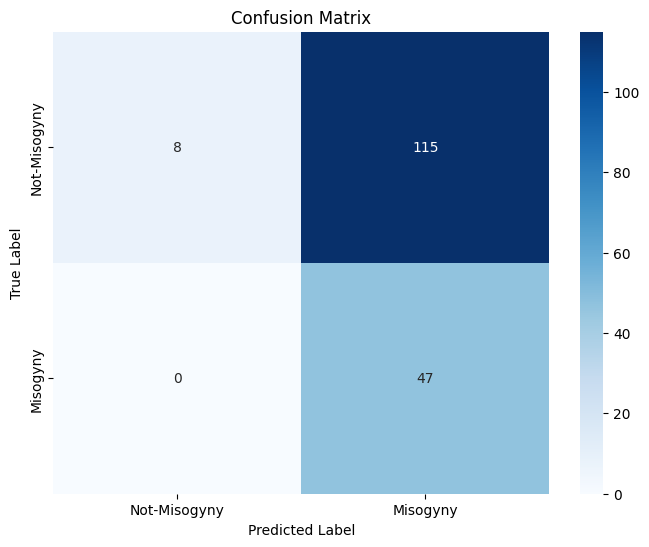

Dev Accuracy: 32.35%
Dev Weighted Accuracy (with penalties): 40.57%
Macro F1: 0.2859
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.12       123
           1       0.29      1.00      0.45        47

    accuracy                           0.32       170
   macro avg       0.65      0.53      0.29       170
weighted avg       0.80      0.32      0.21       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:12<00:00,  7.86it/s]


Epoch 2/30 - Train Loss: 0.4434


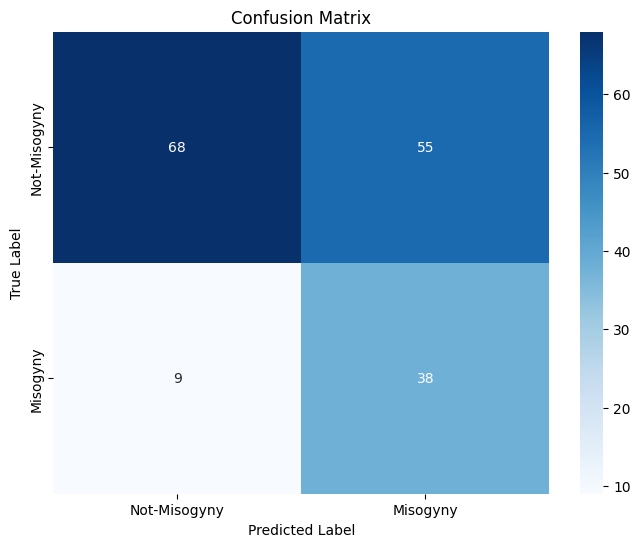

Dev Accuracy: 62.35%
Dev Weighted Accuracy (with penalties): 64.60%
Macro F1: 0.6114
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.55      0.68       123
           1       0.41      0.81      0.54        47

    accuracy                           0.62       170
   macro avg       0.65      0.68      0.61       170
weighted avg       0.75      0.62      0.64       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:12<00:00,  7.77it/s]


Epoch 3/30 - Train Loss: 0.3739


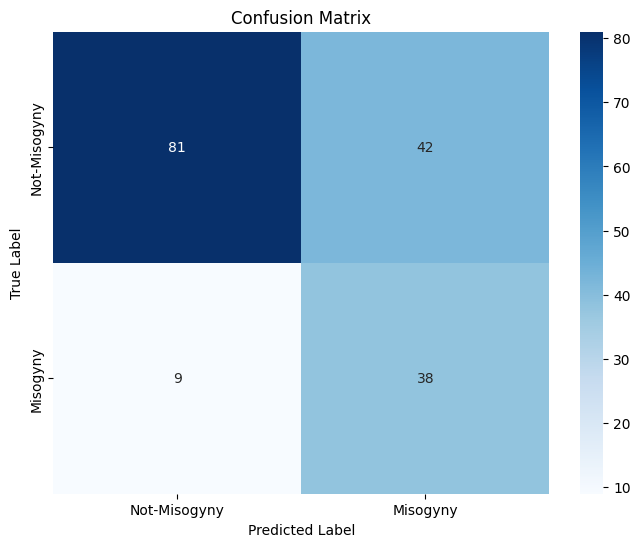

Dev Accuracy: 70.00%
Dev Weighted Accuracy (with penalties): 71.32%
Macro F1: 0.6795
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       123
           1       0.47      0.81      0.60        47

    accuracy                           0.70       170
   macro avg       0.69      0.73      0.68       170
weighted avg       0.78      0.70      0.72       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.65it/s]


Epoch 4/30 - Train Loss: 0.3461


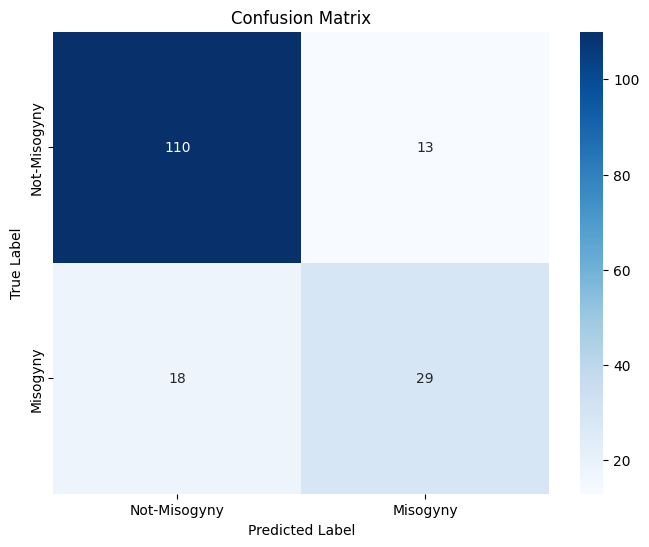

Dev Accuracy: 81.76%
Dev Weighted Accuracy (with penalties): 79.33%
Macro F1: 0.7641
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       123
           1       0.69      0.62      0.65        47

    accuracy                           0.82       170
   macro avg       0.77      0.76      0.76       170
weighted avg       0.81      0.82      0.81       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.63it/s]


Epoch 5/30 - Train Loss: 0.3191


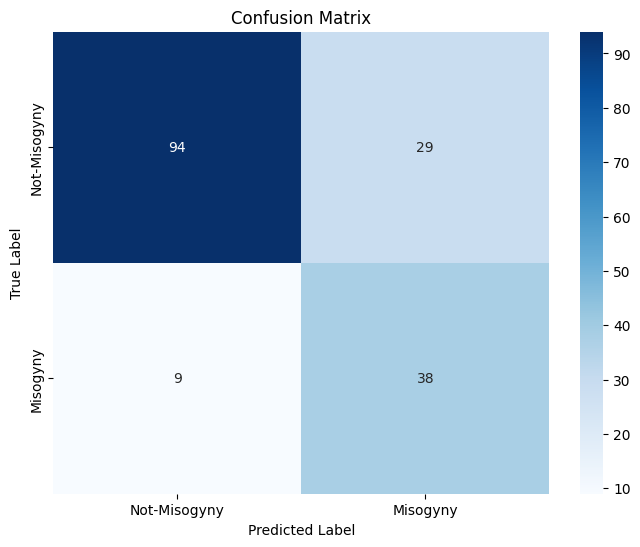

Dev Accuracy: 77.65%
Dev Weighted Accuracy (with penalties): 78.04%
Macro F1: 0.7493
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       123
           1       0.57      0.81      0.67        47

    accuracy                           0.78       170
   macro avg       0.74      0.79      0.75       170
weighted avg       0.82      0.78      0.79       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.64it/s]


Epoch 6/30 - Train Loss: 0.2833


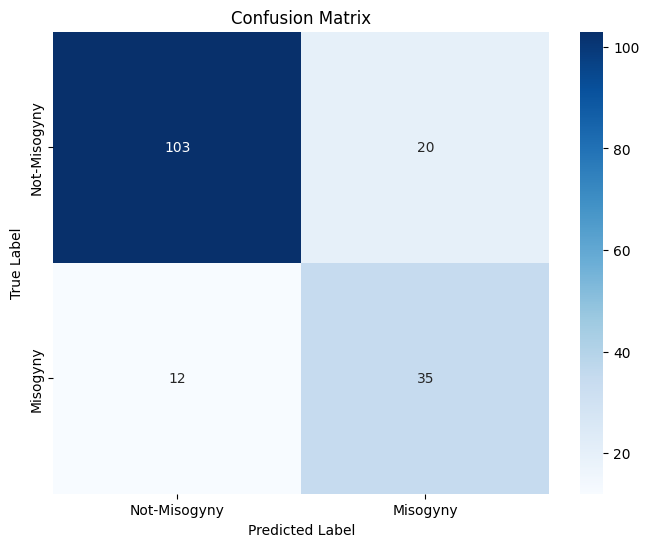

Dev Accuracy: 81.18%
Dev Weighted Accuracy (with penalties): 80.36%
Macro F1: 0.7759
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       123
           1       0.64      0.74      0.69        47

    accuracy                           0.81       170
   macro avg       0.77      0.79      0.78       170
weighted avg       0.82      0.81      0.82       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.65it/s]


Epoch 7/30 - Train Loss: 0.2592


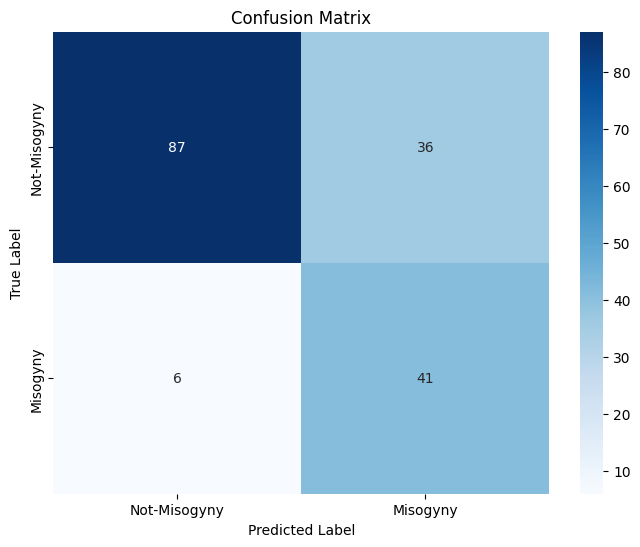

Dev Accuracy: 75.29%
Dev Weighted Accuracy (with penalties): 76.74%
Macro F1: 0.7334
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       123
           1       0.53      0.87      0.66        47

    accuracy                           0.75       170
   macro avg       0.73      0.79      0.73       170
weighted avg       0.82      0.75      0.77       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.58it/s]


Epoch 8/30 - Train Loss: 0.2804


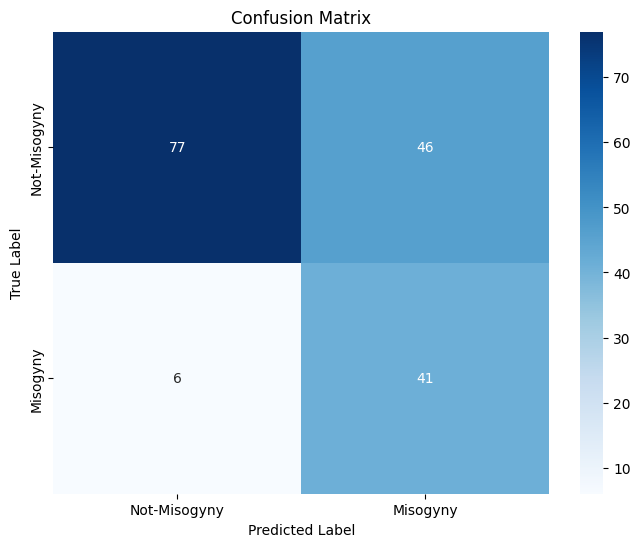

Dev Accuracy: 69.41%
Dev Weighted Accuracy (with penalties): 71.58%
Macro F1: 0.6798
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       123
           1       0.47      0.87      0.61        47

    accuracy                           0.69       170
   macro avg       0.70      0.75      0.68       170
weighted avg       0.80      0.69      0.71       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.67it/s]


Epoch 9/30 - Train Loss: 0.2707


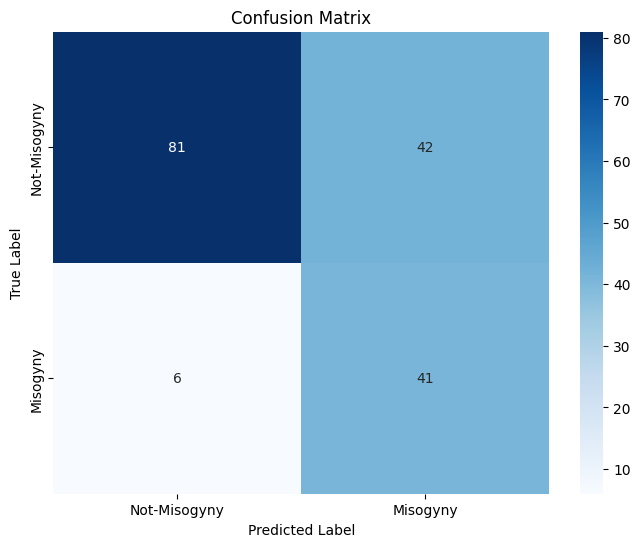

Dev Accuracy: 71.76%
Dev Weighted Accuracy (with penalties): 73.64%
Macro F1: 0.7011
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.66      0.77       123
           1       0.49      0.87      0.63        47

    accuracy                           0.72       170
   macro avg       0.71      0.77      0.70       170
weighted avg       0.81      0.72      0.73       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.60it/s]


Epoch 10/30 - Train Loss: 0.2193


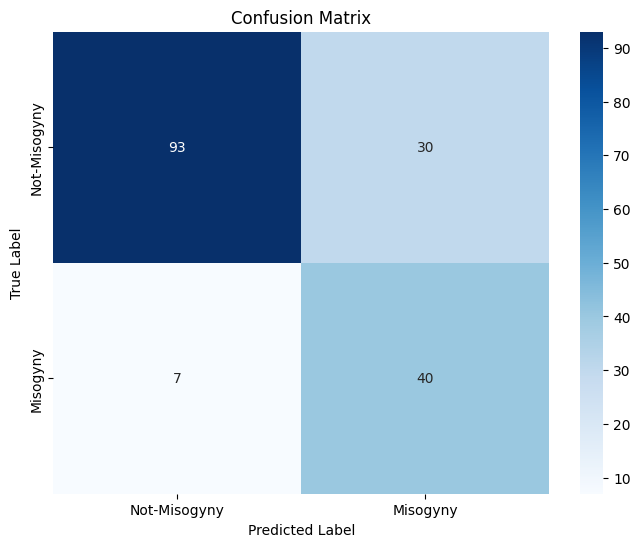

Dev Accuracy: 78.24%
Dev Weighted Accuracy (with penalties): 79.07%
Macro F1: 0.7589
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.83       123
           1       0.57      0.85      0.68        47

    accuracy                           0.78       170
   macro avg       0.75      0.80      0.76       170
weighted avg       0.83      0.78      0.79       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.65it/s]



Epoch 11/30 - Train Loss: 0.2190


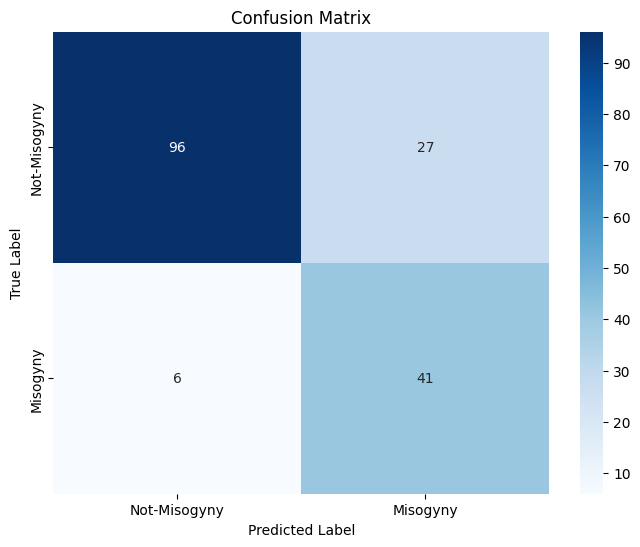

Dev Accuracy: 80.59%
Dev Weighted Accuracy (with penalties): 81.40%
Macro F1: 0.7832
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       123
           1       0.60      0.87      0.71        47

    accuracy                           0.81       170
   macro avg       0.77      0.83      0.78       170
weighted avg       0.85      0.81      0.81       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.63it/s]


Epoch 12/30 - Train Loss: 0.1870


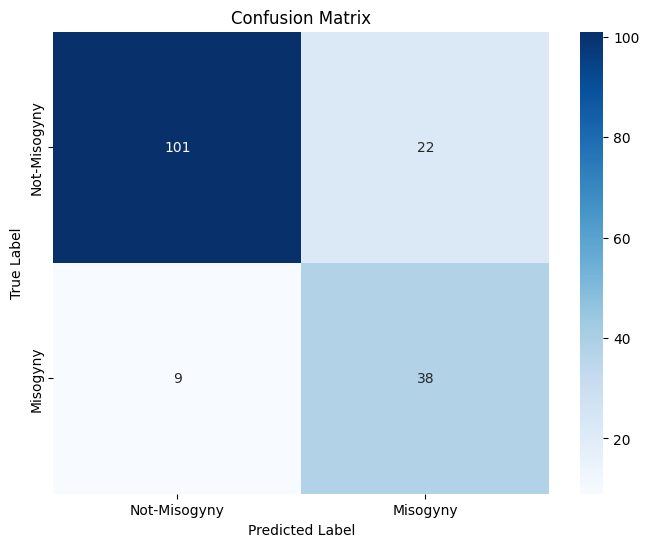

Dev Accuracy: 81.76%
Dev Weighted Accuracy (with penalties): 81.65%
Macro F1: 0.7886
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       123
           1       0.63      0.81      0.71        47

    accuracy                           0.82       170
   macro avg       0.78      0.81      0.79       170
weighted avg       0.84      0.82      0.82       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.64it/s]


Epoch 13/30 - Train Loss: 0.1894


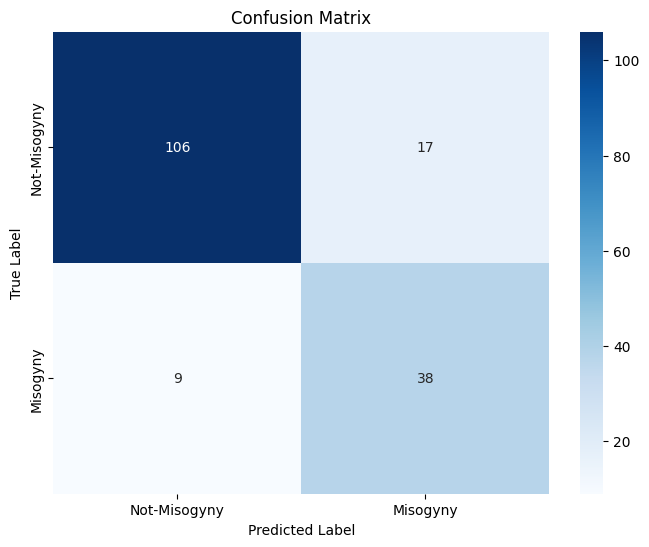

Dev Accuracy: 84.71%
Dev Weighted Accuracy (with penalties): 84.24%
Macro F1: 0.8179
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       123
           1       0.69      0.81      0.75        47

    accuracy                           0.85       170
   macro avg       0.81      0.84      0.82       170
weighted avg       0.86      0.85      0.85       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.61it/s]


Epoch 14/30 - Train Loss: 0.1822


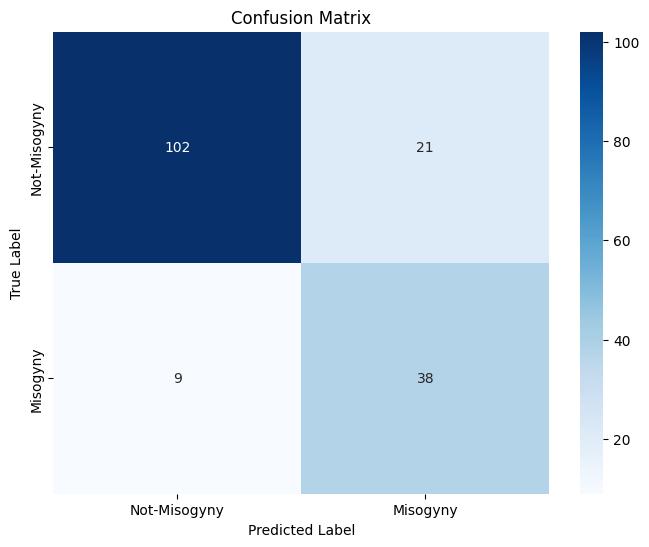

Dev Accuracy: 82.35%
Dev Weighted Accuracy (with penalties): 82.17%
Macro F1: 0.7944
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       123
           1       0.64      0.81      0.72        47

    accuracy                           0.82       170
   macro avg       0.78      0.82      0.79       170
weighted avg       0.84      0.82      0.83       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.64it/s]


Epoch 15/30 - Train Loss: 0.1590


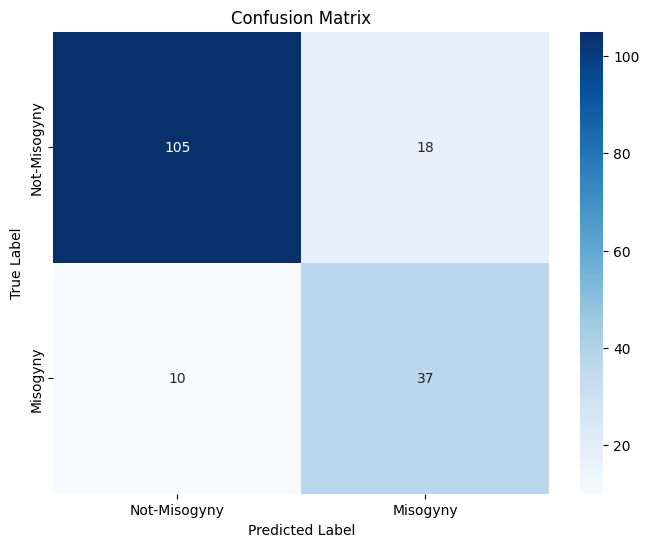

Dev Accuracy: 83.53%
Dev Weighted Accuracy (with penalties): 82.95%
Macro F1: 0.8039
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       123
           1       0.67      0.79      0.73        47

    accuracy                           0.84       170
   macro avg       0.79      0.82      0.80       170
weighted avg       0.85      0.84      0.84       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.65it/s]


Epoch 16/30 - Train Loss: 0.1851


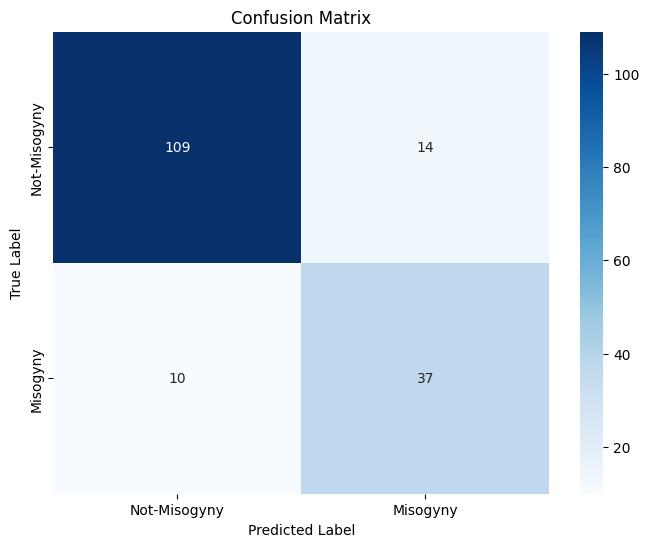

Dev Accuracy: 85.88%
Dev Weighted Accuracy (with penalties): 85.01%
Macro F1: 0.8280
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       123
           1       0.73      0.79      0.76        47

    accuracy                           0.86       170
   macro avg       0.82      0.84      0.83       170
weighted avg       0.86      0.86      0.86       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.65it/s]


Epoch 17/30 - Train Loss: 0.1660


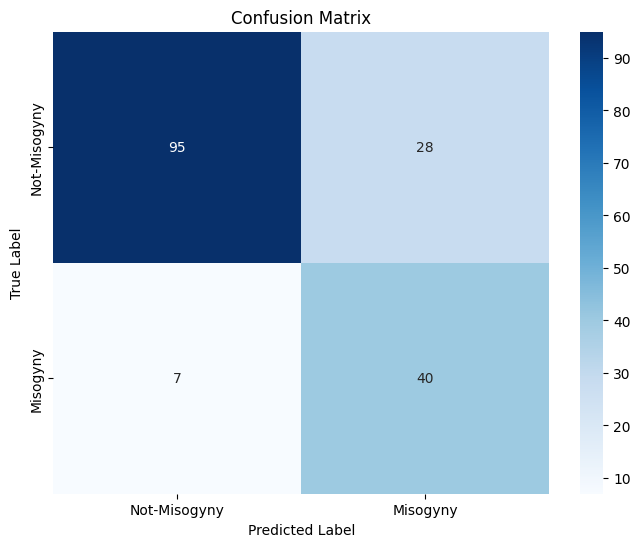

Dev Accuracy: 79.41%
Dev Weighted Accuracy (with penalties): 80.10%
Macro F1: 0.7700
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       123
           1       0.59      0.85      0.70        47

    accuracy                           0.79       170
   macro avg       0.76      0.81      0.77       170
weighted avg       0.84      0.79      0.80       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.65it/s]


Epoch 18/30 - Train Loss: 0.1805


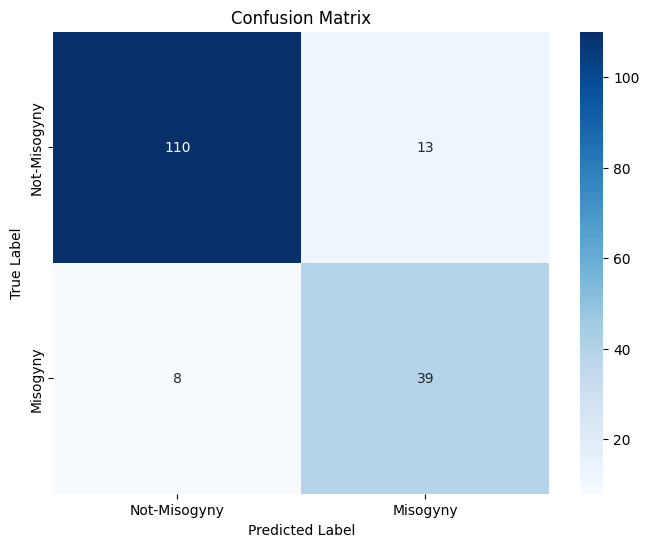

Dev Accuracy: 87.65%
Dev Weighted Accuracy (with penalties): 87.08%
Macro F1: 0.8504
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       123
           1       0.75      0.83      0.79        47

    accuracy                           0.88       170
   macro avg       0.84      0.86      0.85       170
weighted avg       0.88      0.88      0.88       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.62it/s]


Epoch 19/30 - Train Loss: 0.1355


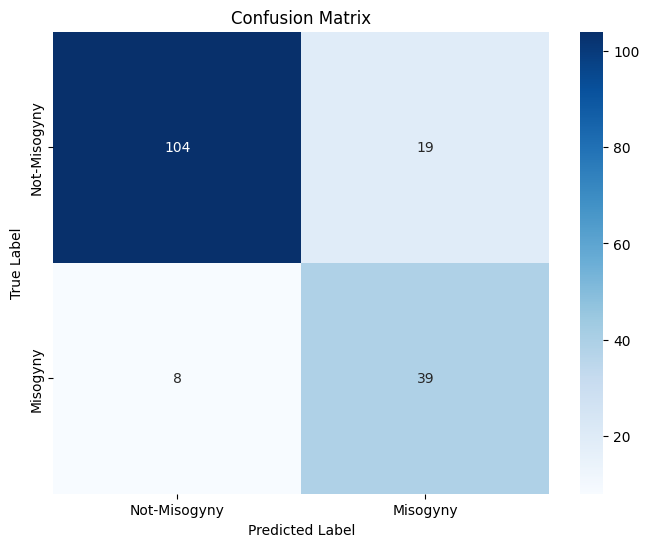

Dev Accuracy: 84.12%
Dev Weighted Accuracy (with penalties): 83.98%
Macro F1: 0.8140
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       123
           1       0.67      0.83      0.74        47

    accuracy                           0.84       170
   macro avg       0.80      0.84      0.81       170
weighted avg       0.86      0.84      0.85       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.65it/s]


Epoch 20/30 - Train Loss: 0.1401


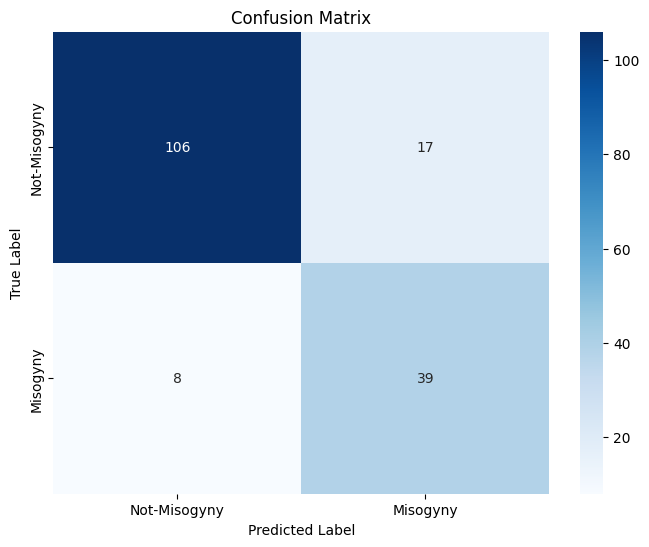

Dev Accuracy: 85.29%
Dev Weighted Accuracy (with penalties): 85.01%
Macro F1: 0.8259
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       123
           1       0.70      0.83      0.76        47

    accuracy                           0.85       170
   macro avg       0.81      0.85      0.83       170
weighted avg       0.87      0.85      0.86       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.66it/s]


Epoch 21/30 - Train Loss: 0.1360


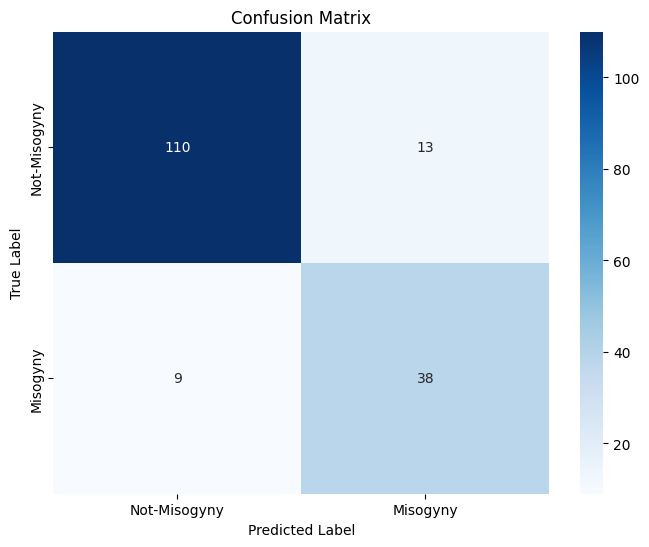

Dev Accuracy: 87.06%
Dev Weighted Accuracy (with penalties): 86.30%
Macro F1: 0.8423
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       123
           1       0.75      0.81      0.78        47

    accuracy                           0.87       170
   macro avg       0.83      0.85      0.84       170
weighted avg       0.87      0.87      0.87       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.65it/s]


Epoch 22/30 - Train Loss: 0.1329


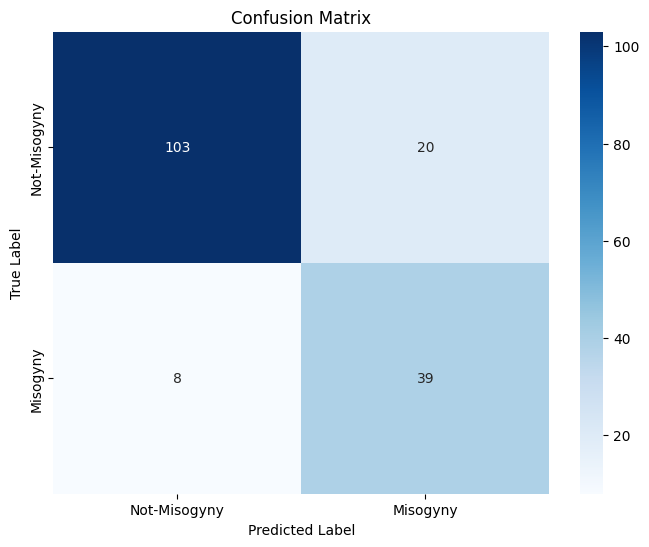

Dev Accuracy: 83.53%
Dev Weighted Accuracy (with penalties): 83.46%
Macro F1: 0.8081
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       123
           1       0.66      0.83      0.74        47

    accuracy                           0.84       170
   macro avg       0.79      0.83      0.81       170
weighted avg       0.85      0.84      0.84       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-27-80daa26a9ea1>:246: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:13<00:00,  7.66it/s]


Epoch 23/30 - Train Loss: 0.1262


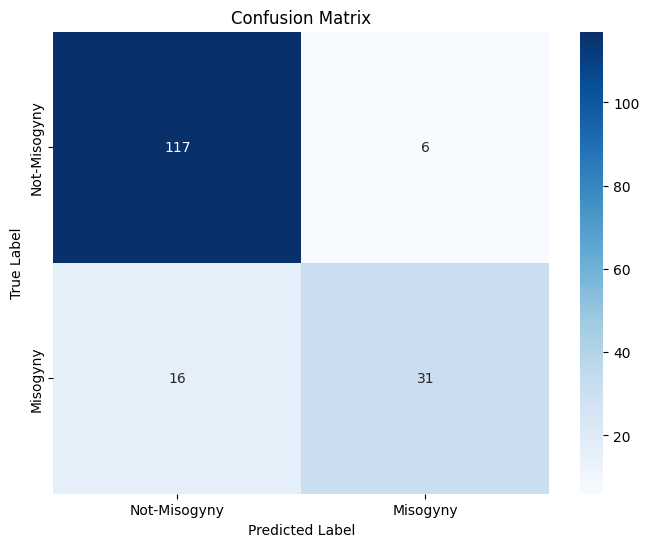

Dev Accuracy: 87.06%
Dev Weighted Accuracy (with penalties): 84.50%
Macro F1: 0.8261
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       123
           1       0.84      0.66      0.74        47

    accuracy                           0.87       170
   macro avg       0.86      0.81      0.83       170
weighted avg       0.87      0.87      0.87       170


Early stopping at epoch 23

Generating Confusion Matrix for Dev Set...


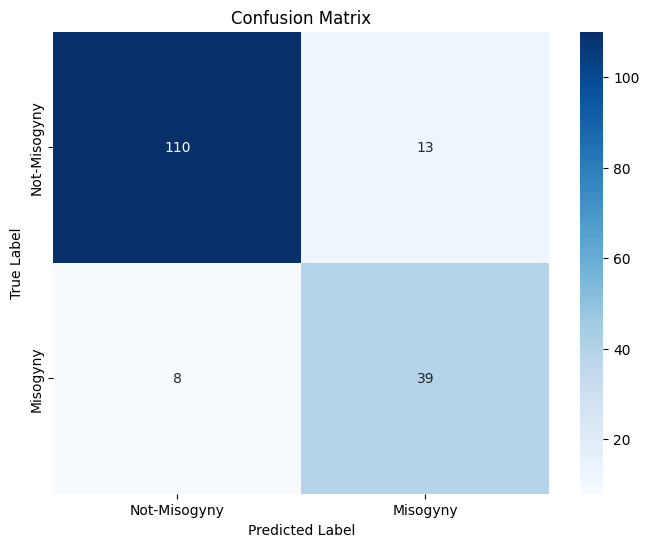


Final Test Evaluation:


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
from sklearn.metrics import classification_report, f1_score
import pandas as pd
import numpy as np
from PIL import Image
import os
from torchvision import transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import copy
import gc
from tqdm import tqdm

# ------------------------ CONFIGURATION ------------------------
CONFIG = {
    'batch_size': 16,
    'lr': 2e-5,
    'gradient_accumulation': 4,
    'weight_decay': 1e-5,
    'max_epochs': 30,
    'patience': 5,
    'min_epochs': 8,
    'lr_patience': 2,
    'grad_clip': 1.0,
    'dropout_rate': 0.3,
    'image_size': 224,
    'class_weights': [1.0, 3.0],
    'lstm_hidden_dim': 256,
    'lstm_layers': 1,
    'early_stop_threshold': 0.005
}

# ------------------------ IMPROVED MODEL ARCHITECTURE ------------------------

class ImprovedMultimodalModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Text model
        self.bert = BertModel.from_pretrained('bert-base-chinese')
        for layer in self.bert.encoder.layer[:6]:  # Freeze first 6 layers
            for param in layer.parameters():
                param.requires_grad = False
        
        # Add BiLSTM after BERT
        self.lstm = nn.LSTM(
            input_size=768,
            hidden_size=CONFIG['lstm_hidden_dim'],
            num_layers=CONFIG['lstm_layers'],
            batch_first=True,
            bidirectional=True,
            dropout=CONFIG['dropout_rate']
        )
        self.text_proj = nn.Linear(CONFIG['lstm_hidden_dim'] * 2, 512)  # BiLSTM is bidirectional

        # Image model (CLIP)
        self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
        for param in self.clip.vision_model.parameters():
            param.requires_grad = False
        for param in self.clip.vision_model.encoder.layers[-1].parameters():
            param.requires_grad = True

        self.image_proj = nn.Linear(768, 512)

        # Fusion and classification layers
        self.fusion = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.LayerNorm(512)
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 2)
        )
    
    def forward(self, input_ids, attention_mask, pixel_values):
        # Text Features (BERT + BiLSTM)
        text_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_lstm_out, _ = self.lstm(text_outputs.last_hidden_state)
        text_features = text_lstm_out[:, -1, :]  # Take last hidden state
        text_features = self.text_proj(text_features)

        # Image Features (CLIP)
        with torch.no_grad():
            image_outputs = self.clip.vision_model(pixel_values=pixel_values)
        image_features = image_outputs.last_hidden_state.mean(dim=1)
        image_features = self.image_proj(image_features)

        # Fusion
        fused = torch.cat([text_features, image_features], dim=1)
        fused = self.fusion(fused)

        return self.classifier(fused)


# ------------------------ IMPROVED DATA LOADING ------------------------

class MultimodalDataset(Dataset):
    def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.image_dir = image_dir
        self.is_test = is_test
        self.transform = transform or transforms.Compose([
            transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                              std=[0.26862954, 0.26130258, 0.27577711])
        ])
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        text = str(row['transcriptions'])
        image_name = str(row['image_name'])
        label = row['labels'] if 'labels' in row else -1
        
        # Handle image paths
        image_path = os.path.join(self.image_dir, image_name)
        if not os.path.exists(image_path) and image_name.startswith('aug_'):
            image_path = os.path.join(self.image_dir.replace('augmented_images', 'preprocessed/images'), image_name[4:])
        
        try:
            image = Image.open(image_path).convert('RGB')
            image = self.transform(image)
        except:
            image = torch.zeros(3, CONFIG['image_size'], CONFIG['image_size'])
        
        encoding = self.tokenizer(
            text, 
            padding='max_length', 
            truncation=True, 
            max_length=128, 
            return_tensors='pt'
        )
        # Remove token_type_ids if not needed
        if 'token_type_ids' in encoding:
            del encoding['token_type_ids']
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': image,
            'labels': label if not self.is_test else -1
        }

def weighted_accuracy(y_true, y_pred, class_weights={0: 1.0, 1: 1.5}):
    """
    Calculate accuracy with different penalties for misclassifications:
    - Misclassifying class 0 (Not-Misogyny) as class 1: penalty = 1.0
    - Misclassifying class 1 (Misogyny) as class 0: penalty = 1.5
    """
    total_penalty = 0
    max_possible_penalty = 0
    
    for true, pred in zip(y_true, y_pred):
        if true != pred:
            penalty = class_weights.get(true, 1.0)  # Default to 1.0 if class not in weights
            total_penalty += penalty
        max_possible_penalty += class_weights.get(true, 1.0)
    
    if max_possible_penalty == 0:
        return 1.0  # Perfect accuracy if no samples
    
    return 1.0 - (total_penalty / max_possible_penalty)

# ------------------------ TRAINING UTILITIES ------------------------

def evaluate_model(model, data_loader, device, is_test=False):
    model.eval()
    y_true, y_pred = [], []
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )
            preds = torch.argmax(outputs, dim=1)
            y_pred.extend(preds.cpu().numpy())
            
            if not is_test and 'labels' in batch:
                labels = batch['labels'].to(device)
                y_true.extend(labels.cpu().numpy())
    
    if not is_test and len(y_true) > 0:
        # Calculate regular metrics
        accuracy = 100 * (np.array(y_true) == np.array(y_pred)).mean()
        macro_f1 = f1_score(y_true, y_pred, average='macro')
        weighted_f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, zero_division=0)
        
        # Calculate weighted accuracy with penalties
        weighted_acc = 100 * weighted_accuracy(y_true, y_pred)
        
        class_names = ['Not-Misogyny', 'Misogyny']
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.savefig('confusion_matrix.png', bbox_inches='tight')
        plt.show()  # Add this line
        plt.close()

        
        
        metrics = {
            'accuracy': accuracy,
            'weighted_accuracy': weighted_acc,
            'macro_f1': macro_f1,
            'weighted_f1': weighted_f1,
            'report': report,
            'confusion_matrix': cm
        }
        return y_pred, metrics
    return y_pred, None

def train_epoch(model, train_loader, optimizer, criterion, device, scaler):
    model.train()
    total_loss = 0
    i = 0  # Initialize counter
    
    for batch in tqdm(train_loader, desc="Training"):
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)
        
        with torch.cuda.amp.autocast():
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )
            loss = criterion(outputs, labels) / CONFIG['gradient_accumulation']
        
        scaler.scale(loss).backward()
        
        if (i + 1) % CONFIG['gradient_accumulation'] == 0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), CONFIG['grad_clip'])
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
        
        total_loss += loss.item() * CONFIG['gradient_accumulation']
        i += 1
    
    return total_loss / len(train_loader)

# ------------------------ MAIN TRAINING FUNCTION ------------------------

def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
    torch.cuda.empty_cache()
    gc.collect()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Initialize components
    tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
    # Data transforms
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(0.1, 0.1, 0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                         std=[0.26862954, 0.26130258, 0.27577711])
    ])
    
    val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                         std=[0.26862954, 0.26130258, 0.27577711])
    ])
    
    # Datasets and loaders
    train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
    dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
    test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
    train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4, pin_memory=True)
    dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    
    # Model and training setup
    model = ImprovedMultimodalModel().to(device)
    
    # Loss function with class weighting
    class_weights = torch.tensor(CONFIG['class_weights'], dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    
    optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
    scaler = torch.cuda.amp.GradScaler()
    
    # Training loop
    best_f1 = 0
    best_model = None
    epochs_no_improve = 0
    
    for epoch in range(CONFIG['max_epochs']):
        train_loss = train_epoch(model, train_loader, optimizer, criterion, device, scaler)
        
        print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']} - Train Loss: {train_loss:.4f}")
        
        # Evaluation
        _, dev_metrics = evaluate_model(model, dev_loader, device)
        # Inside the training loop where metrics are printed:
        if dev_metrics:
            print(f"Dev Accuracy: {dev_metrics['accuracy']:.2f}%")
            print(f"Dev Weighted Accuracy (with penalties): {dev_metrics['weighted_accuracy']:.2f}%")
            print(f"Macro F1: {dev_metrics['macro_f1']:.4f}")
            print("Classification Report:")
            print(dev_metrics['report'])
                    
            # Use weighted accuracy for early stopping if desired
            if dev_metrics['weighted_accuracy'] > best_f1 + CONFIG['early_stop_threshold']:
                best_f1 = dev_metrics['weighted_accuracy']
                best_model = copy.deepcopy(model.state_dict())
                epochs_no_improve = 0
                torch.save(model.state_dict(), 'best_model.pth')
            else:
                epochs_no_improve += 1
                
            scheduler.step(dev_metrics['weighted_f1'])
            
            if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
                print(f"\nEarly stopping at epoch {epoch + 1}")
                break
    
    if best_model:
        model.load_state_dict(best_model)
        
    # Generate confusion matrix for dev set
    print("\nGenerating Confusion Matrix for Dev Set...")
    model.eval()
    _, dev_metrics = evaluate_model(model, dev_loader, device)
    print("\nFinal Test Evaluation:")
    test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
    # Create submission
    submission_df = pd.DataFrame({
        'id': test_df['image_name'].str.extract('(\d+)')[0].astype(int),
        'predictions': test_preds
    })
    submission_df.to_csv('submission10.csv', index=False)
    
    return model

if __name__ == '__main__':
    # Load data
    train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
    dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
    test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
    # Map labels
    label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
    train_df['labels'] = train_df['labels'].map(label_map)
    dev_df['labels'] = dev_df['labels'].map(label_map)
    
    # Verify class distribution
    print("\nClass distribution in training set:")
    print(train_df['labels'].value_counts())
    
    print("\nClass distribution in dev set:")
    print(dev_df['labels'].value_counts())
    
    # Paths
    train_image_dir = '/kaggle/working/augmented_images'
    test_image_dir = '/kaggle/working/preprocessed_test/images'
    
    # Train and evaluate
    model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)

**CharBert+CLIP(gated)**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
from sklearn.metrics import classification_report, f1_score, recall_score  # Added recall_score import
import pandas as pd
import numpy as np
from PIL import Image
import os
from torchvision import transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import copy
import gc

# ------------------------ MEMORY OPTIMIZATION ------------------------
def clear_memory():
    torch.cuda.empty_cache()
    gc.collect()

# Set device and print info
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if device.type == 'cuda':
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory/1024**3:.2f}GB")
    print(f"Free Memory: {torch.cuda.memory_reserved(0)/1024**3:.2f}GB")

# ------------------------ IMPROVED CONFIGURATION ------------------------
CONFIG = {
    'batch_size': 16,
    'lr': 2e-5,  # Reduced learning rate for better stability
    'gradient_accumulation': 4,
    'weight_decay': 1e-5,
    'max_epochs': 30,
    'patience': 8,
    'min_epochs': 12,
    'lr_patience': 3,
    'grad_clip': 1.0,
    'dropout_rate': 0.3,  # Slightly higher dropout
    'hidden_dim': 512,
    'image_size': 224,
    'class_weights': [1.0, 4.0]  # Increased weight for minority class
}

# ------------------------ IMPROVED MODEL ARCHITECTURES ------------------------

class ImprovedTextModel(nn.Module):
    def __init__(self, bert_path='bert-base-chinese'):
        super().__init__()
        self.bert = BertModel.from_pretrained(bert_path)
        
        # Freeze first 6 layers, unfreeze last 6
        for i, param in enumerate(self.bert.parameters()):
            if i < 6*12:  # First 6 layers
                param.requires_grad = False
                
        # Improved attention layer
        self.attention = nn.Sequential(
            nn.Linear(768, 384),
            nn.GELU(),
            nn.Linear(384, 1),
            nn.Softmax(dim=1))
        self.dropout = nn.Dropout(CONFIG['dropout_rate'])
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state
        
        attention_weights = self.attention(sequence_output)
        pooled = (attention_weights * sequence_output).sum(dim=1)
        return self.dropout(pooled)

class ImageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
        
        # Partial unfreezing of vision model
        for name, param in self.clip.vision_model.named_parameters():
            if 'encoder.layers.11' in name:  # Unfreeze last layer
                param.requires_grad = True
            else:
                param.requires_grad = False
                
        self.dropout = nn.Dropout(CONFIG['dropout_rate'])
        self.processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
        
    def forward(self, images):
        batch_size = 4  # Increased sub-batch size
        features = []
        
        for i in range(0, len(images), batch_size):
            batch = images[i:i+batch_size]
            pil_images = [transforms.ToPILImage()(img) for img in batch]
            inputs = self.processor(images=pil_images, return_tensors="pt", padding=True)
            inputs = {k: v.to(device) for k, v in inputs.items()}
            
            with torch.set_grad_enabled(True):  # Enable gradients for unfrozen layers
                vision_outputs = self.clip.vision_model(**inputs)
                features.append(vision_outputs[1])
                
        return self.dropout(torch.cat(features))
class MultimodalDataset(Dataset):
    def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
        self.df = df
        self.tokenizer = tokenizer
        self.image_dir = image_dir
        self.is_test = is_test
        self.transform = transform or transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                              std=[0.26862954, 0.26130258, 0.27577711])
        ])
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text = str(self.df.iloc[idx]['transcriptions'])
        image_name = str(self.df.iloc[idx]['image_name'])
        
        # Handle both original and augmented image paths
        if image_name.startswith('aug_'):
            base_name = image_name[4:]
            image_path = os.path.join(self.image_dir, base_name)
        else:
            image_path = os.path.join(self.image_dir, image_name)
            
        # Handle missing images by returning a blank image
        try:
            image = Image.open(image_path).convert('RGB')
            if self.transform:
                image = self.transform(image)
        except FileNotFoundError:
            # print(f"Warning: Image {image_path} not found, using blank image")
            image = torch.zeros(3, 224, 224)  # Blank black image
            
        encoding = self.tokenizer(
            text, 
            padding='max_length', 
            truncation=True, 
            max_length=128, 
            return_tensors='pt'
        )
        
        if self.is_test:
            return encoding, image
        else:
            label = int(self.df.iloc[idx]['labels'])
            return encoding, image, label

class GatedFusion(nn.Module):
    def __init__(self, input_dim=768):
        super().__init__()
        self.text_gate = nn.Linear(input_dim, input_dim)
        self.image_gate = nn.Linear(input_dim, input_dim)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, text_features, image_features):
        text_weight = self.sigmoid(self.text_gate(text_features))
        image_weight = self.sigmoid(self.image_gate(image_features))
        
        fused_features = text_weight * text_features + image_weight * image_features
        return fused_features

class ImprovedMultimodalModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.text_model = ImprovedTextModel()
        self.image_model = ImageModel()
        self.gated_fusion = GatedFusion(input_dim=768)  # Using Gated Fusion
        
        self.classifier = nn.Sequential(
            nn.Linear(768, 384),
            nn.GELU(),
            nn.BatchNorm1d(384),
            nn.Dropout(0.3),
            nn.Linear(384, 192),
            nn.GELU(),
            nn.LayerNorm(192),
            nn.Dropout(0.2),
            nn.Linear(192, 2)
        )
    
    def forward(self, input_ids, attention_mask, images):
        text_features = self.text_model(input_ids, attention_mask)
        image_features = self.image_model(images)
        
        fused = self.gated_fusion(text_features, image_features)
        return self.classifier(fused)


# ------------------------ TRAINING & EVALUATION ------------------------

def evaluate_model(model, data_loader, device, is_test=False):
    model.eval()
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch[0]['input_ids'].squeeze(1).to(device)
            attention_mask = batch[0]['attention_mask'].squeeze(1).to(device)
            images = batch[1].to(device)
            
            outputs = model(input_ids, attention_mask, images)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())
            
            if not is_test and len(batch) > 2:
                labels = batch[2].to(device)
                y_true.extend(labels.cpu().numpy())
    
    if not is_test and y_true:
        accuracy = 100 * sum(np.array(y_true) == np.array(y_pred)) / len(y_true)
        f1 = f1_score(y_true, y_pred, average='macro')
        weighted_f1 = f1_score(y_true, y_pred, average='weighted')
        class_report = classification_report(y_true, y_pred)
        
        print(f"Accuracy: {accuracy:.2f}%")
        print(f"Macro F1-score: {f1:.4f}")
        print(f"Weighted F1: {weighted_f1:.4f}")
        print("Classification Report:")
        print(class_report)
    
    class1_recall = recall_score(y_true, y_pred, pos_label=1) if len(y_true) > 0 else 0
    return y_pred, class1_recall

def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
    clear_memory()
    
    tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                           std=[0.26862954, 0.26130258, 0.27577711])
    ])
    
    val_transform = transforms.Compose([
        transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                           std=[0.26862954, 0.26130258, 0.27577711])
    ])
    
    train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
    dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
    test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
    train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4)
    dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4)
    test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4)
    
    model = ImprovedMultimodalModel().to(device)
    
    # Focal Loss for class imbalance
    class FocalLoss(nn.Module):
        def __init__(self, alpha=0.25, gamma=2.0):
            super().__init__()
            self.alpha = alpha
            self.gamma = gamma
            
        def forward(self, inputs, targets):
            ce_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
            pt = torch.exp(-ce_loss)
            focal_loss = (self.alpha * (1-pt)**self.gamma * ce_loss).mean()
            return focal_loss
    
    criterion = FocalLoss(alpha=0.25, gamma=2.0)
    optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
    scaler = torch.cuda.amp.GradScaler(enabled=(device.type == 'cuda'))  # Fixed initialization
    
    best_f1 = 0
    best_model = None
    epochs_no_improve = 0
    
    for epoch in range(CONFIG['max_epochs']):
        model.train()
        total_loss = 0
        
        for i, batch in enumerate(train_loader):
            input_ids = batch[0]['input_ids'].squeeze(1).to(device)
            attention_mask = batch[0]['attention_mask'].squeeze(1).to(device)
            images = batch[1].to(device)
            labels = batch[2].to(device)
            
            with torch.amp.autocast(device_type='cuda' if device.type == 'cuda' else 'cpu', 
                                  enabled=device.type == 'cuda'):
                outputs = model(input_ids, attention_mask, images)
                loss = criterion(outputs, labels) / CONFIG['gradient_accumulation']
            
            scaler.scale(loss).backward()
            
            if (i + 1) % CONFIG['gradient_accumulation'] == 0:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), CONFIG['grad_clip'])
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            total_loss += loss.item()
        
        avg_train_loss = total_loss / len(train_loader)
        
        # Evaluation
        model.eval()
        print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']} - Train Loss: {avg_train_loss:.4f}")
        print("Dev Set Evaluation:")
        
        dev_preds, class1_recall = evaluate_model(model, dev_loader, device)
        
        y_true = []
        for batch in dev_loader:
            if len(batch) > 2:
                y_true.extend(batch[2].cpu().numpy())
        y_true = np.array(y_true)
        
        if len(y_true) > 0:
            current_f1 = f1_score(y_true, dev_preds, average='weighted')
            current_macro_f1 = f1_score(y_true, dev_preds, average='macro')
            
            if current_f1 > best_f1 * 1.005:  # Small improvement threshold
                best_f1 = current_f1
                best_model = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(), 'best_model.pth')
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                
            scheduler.step(current_f1)
            
            if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
                print(f"\nEarly stopping triggered at epoch {epoch + 1}")
                break
    
    if best_model is not None:
        model.load_state_dict(best_model)
    
    print("\nFinal Test Set Evaluation:")
    test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
    # Handle potential length mismatch
    if len(test_preds) != len(test_df):
        print(f"Adjusting predictions length from {len(test_preds)} to match test_df length {len(test_df)}")
        test_preds = test_preds[:len(test_df)]  # Simple solution - truncate extra predictions
    
    predictions_df = pd.DataFrame({
        'image_name': test_df['image_name'].values[:len(test_preds)],
        'predictions': test_preds
    })
    
    predictions_df.to_csv('predictions(CharBert+CLIP_gate).csv', index=False)
    print("Predictions saved to predictions(CharBert+CLIP_gate).csv")
    print(f"Final predictions count: {len(predictions_df)}")
    
    return model

if __name__ == '__main__':
    train_df = pd.read_csv('/kaggle/working/train_augmented_balanced.csv')
    dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
    test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
    label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
    train_df['labels'] = train_df['labels'].map(label_map)
    dev_df['labels'] = dev_df['labels'].map(label_map)
    
    train_image_dir = '/kaggle/working/preprocessed/images'
    test_image_dir = '/kaggle/working/preprocessed_test/images'
    
    model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)

**CharBert+ clip(cross)**

In [ ]:
mkdir -p /kaggle/working/chinese-charbert
git clone https://huggingface.co/hfl/chinese-charbert-base /kaggle/working/chinese-charbert


**(CharBert+CLIP)cross-attention-imp**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
from sklearn.metrics import classification_report, f1_score
import pandas as pd
import numpy as np
from PIL import Image
import os
from torchvision import transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import copy
import gc
from tqdm import tqdm

# ------------------------ CONFIGURATION ------------------------
CONFIG = {
    'batch_size': 16,
    'lr': 2e-5,
    'gradient_accumulation': 4,
    'weight_decay': 1e-5,
    'max_epochs': 30,
    'patience': 5,
    'min_epochs': 8,
    'lr_patience': 2,
    'grad_clip': 1.0,
    'dropout_rate': 0.3,
    'image_size': 224,
    'class_weights': [1.0, 3.0],
    'lstm_hidden_dim': 256,
    'lstm_layers': 1,
    'early_stop_threshold': 0.005,
    'num_attention_heads': 4
}

# ------------------------ CROSS ATTENTION MODEL ARCHITECTURE ------------------------

class CrossAttention(nn.Module):
    def __init__(self, query_dim, key_dim, value_dim, num_heads=4):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = value_dim // num_heads
        
        self.query = nn.Linear(query_dim, value_dim)
        self.key = nn.Linear(key_dim, value_dim)
        self.value = nn.Linear(key_dim, value_dim)
        self.out = nn.Linear(value_dim, value_dim)
        
    def forward(self, query, key_value):
        batch_size = query.size(0)
        
        # Project inputs
        Q = self.query(query).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        K = self.key(key_value).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        V = self.value(key_value).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        
        # Scaled dot-product attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32))
        attn_weights = torch.softmax(scores, dim=-1)
        output = torch.matmul(attn_weights, V)
        
        # Concatenate heads and apply final linear
        output = output.transpose(1, 2).contiguous().view(batch_size, -1, self.num_heads * self.head_dim)
        return self.out(output.squeeze(1))

class ImprovedTextModel(nn.Module):
    def __init__(self, bert_path='bert-base-chinese'):
        super().__init__()
        self.bert = BertModel.from_pretrained(bert_path)
        for layer in self.bert.encoder.layer[:6]:  # Freeze first 6 layers
            for param in layer.parameters():
                param.requires_grad = False
                
        self.lstm = nn.LSTM(
            input_size=768,
            hidden_size=CONFIG['lstm_hidden_dim'],
            num_layers=CONFIG['lstm_layers'],
            batch_first=True,
            bidirectional=True,
            dropout=CONFIG['dropout_rate']
        )
        self.text_proj = nn.Linear(CONFIG['lstm_hidden_dim'] * 2, 512)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        lstm_out, _ = self.lstm(outputs.last_hidden_state)
        text_features = lstm_out[:, -1, :]  # Take last hidden state
        return self.text_proj(text_features)

class ImageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
        for param in self.clip.vision_model.parameters():
            param.requires_grad = False
        for param in self.clip.vision_model.encoder.layers[-1].parameters():
            param.requires_grad = True
        self.image_proj = nn.Linear(768, 512)

    def forward(self, pixel_values):
        with torch.no_grad():
            image_outputs = self.clip.vision_model(pixel_values=pixel_values)
        image_features = image_outputs.last_hidden_state.mean(dim=1)
        return self.image_proj(image_features)

class CrossAttentionMultimodalModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.text_model = ImprovedTextModel()
        self.image_model = ImageModel()
        
        # Cross-attention layers
        self.text_to_image_attn = CrossAttention(
            query_dim=512, 
            key_dim=512, 
            value_dim=512,
            num_heads=CONFIG['num_attention_heads']
        )
        self.image_to_text_attn = CrossAttention(
            query_dim=512,
            key_dim=512,
            value_dim=512,
            num_heads=CONFIG['num_attention_heads']
        )
        
        # Fusion and classification
        self.fusion = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.LayerNorm(512)
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 2)
        )
    
    def forward(self, input_ids, attention_mask, pixel_values):
        # Get base features
        text_features = self.text_model(input_ids, attention_mask)
        image_features = self.image_model(pixel_values)
        
        # Cross-modal attention
        text_attended = self.text_to_image_attn(text_features, image_features)
        image_attended = self.image_to_text_attn(image_features, text_features)
        
        # Combine features
        text_combined = text_features + text_attended
        image_combined = image_features + image_attended
        
        # Final fusion
        fused = torch.cat([text_combined, image_combined], dim=1)
        fused = self.fusion(fused)
        
        return self.classifier(fused)

# ------------------------ DATA LOADING ------------------------

class MultimodalDataset(Dataset):
    def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.image_dir = image_dir
        self.is_test = is_test
        self.transform = transform or transforms.Compose([
            transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                              std=[0.26862954, 0.26130258, 0.27577711])
        ])
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        text = str(row['transcriptions'])
        image_name = str(row['image_name'])
        label = row['labels'] if 'labels' in row else -1
        
        # Handle image paths
        image_path = os.path.join(self.image_dir, image_name)
        if not os.path.exists(image_path) and image_name.startswith('aug_'):
            image_path = os.path.join(self.image_dir.replace('augmented_images', 'preprocessed/images'), image_name[4:])
        
        try:
            image = Image.open(image_path).convert('RGB')
            image = self.transform(image)
        except:
            image = torch.zeros(3, CONFIG['image_size'], CONFIG['image_size'])
        
        encoding = self.tokenizer(
            text, 
            padding='max_length', 
            truncation=True, 
            max_length=128, 
            return_tensors='pt'
        )
        if 'token_type_ids' in encoding:
            del encoding['token_type_ids']
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': image,
            'labels': label if not self.is_test else -1
        }

def weighted_accuracy(y_true, y_pred, class_weights={0: 1.0, 1: 1.5}):
    """
    Calculate accuracy with different penalties for misclassifications:
    - Misclassifying class 0 (Not-Misogyny) as class 1: penalty = 1.0
    - Misclassifying class 1 (Misogyny) as class 0: penalty = 1.5
    """
    total_penalty = 0
    max_possible_penalty = 0
    
    for true, pred in zip(y_true, y_pred):
        if true != pred:
            penalty = class_weights.get(true, 1.0)  # Default to 1.0 if class not in weights
            total_penalty += penalty
        max_possible_penalty += class_weights.get(true, 1.0)
    
    if max_possible_penalty == 0:
        return 1.0  # Perfect accuracy if no samples
    
    return 1.0 - (total_penalty / max_possible_penalty)
    
# ------------------------ TRAINING UTILITIES ------------------------

def evaluate_model(model, data_loader, device, is_test=False):
    model.eval()
    y_true, y_pred = [], []
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )
            preds = torch.argmax(outputs, dim=1)
            y_pred.extend(preds.cpu().numpy())
            
            if not is_test and 'labels' in batch:
                labels = batch['labels'].to(device)
                y_true.extend(labels.cpu().numpy())
    
    if not is_test and len(y_true) > 0:
        # Calculate regular metrics
        accuracy = 100 * (np.array(y_true) == np.array(y_pred)).mean()
        macro_f1 = f1_score(y_true, y_pred, average='macro')
        weighted_f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, zero_division=0)
        
        # Calculate weighted accuracy with penalties
        weighted_acc = 100 * weighted_accuracy(y_true, y_pred)
        
        metrics = {
            'accuracy': accuracy,
            'weighted_accuracy': weighted_acc,  # New metric with penalties
            'macro_f1': macro_f1,
            'weighted_f1': weighted_f1,
            'report': report
        }
        return y_pred, metrics
    return y_pred, None

def train_epoch(model, train_loader, optimizer, criterion, device, scaler):
    model.train()
    total_loss = 0
    i = 0
    
    for batch in tqdm(train_loader, desc="Training"):
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)
        
        with torch.cuda.amp.autocast():
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )
            loss = criterion(outputs, labels) / CONFIG['gradient_accumulation']
        
        scaler.scale(loss).backward()
        
        if (i + 1) % CONFIG['gradient_accumulation'] == 0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), CONFIG['grad_clip'])
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
        
        total_loss += loss.item() * CONFIG['gradient_accumulation']
        i += 1
    
    return total_loss / len(train_loader)

# ------------------------ MAIN TRAINING FUNCTION ------------------------

def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
    torch.cuda.empty_cache()
    gc.collect()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Initialize components
    tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
    # Data transforms
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(0.1, 0.1, 0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                         std=[0.26862954, 0.26130258, 0.27577711])
    ])
    
    val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                         std=[0.26862954, 0.26130258, 0.27577711])
    ])
    
    # Datasets and loaders
    train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
    dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
    test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
    train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4, pin_memory=True)
    dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    
    # Model and training setup
    model = CrossAttentionMultimodalModel().to(device)
    
    # Loss function with class weighting
    class_weights = torch.tensor(CONFIG['class_weights'], dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    
    optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
    scaler = torch.cuda.amp.GradScaler()
    
    # Training loop
    best_f1 = 0
    best_model = None
    epochs_no_improve = 0
    
    for epoch in range(CONFIG['max_epochs']):
        train_loss = train_epoch(model, train_loader, optimizer, criterion, device, scaler)
        
        print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']} - Train Loss: {train_loss:.4f}")
        
        # Evaluation
        _, dev_metrics = evaluate_model(model, dev_loader, device)
        # Inside the training loop where metrics are printed:
        if dev_metrics:
            print(f"Dev Accuracy: {dev_metrics['accuracy']:.2f}%")
            print(f"Dev Weighted Accuracy (with penalties): {dev_metrics['weighted_accuracy']:.2f}%")
            print(f"Macro F1: {dev_metrics['macro_f1']:.4f}")
            print("Classification Report:")
            print(dev_metrics['report'])
                    
            # Use weighted accuracy for early stopping if desired
            if dev_metrics['weighted_accuracy'] > best_f1 + CONFIG['early_stop_threshold']:
                best_f1 = dev_metrics['weighted_accuracy']
                best_model = copy.deepcopy(model.state_dict())
                epochs_no_improve = 0
                torch.save(model.state_dict(), 'best_model.pth')
            else:
                epochs_no_improve += 1
                
            scheduler.step(dev_metrics['weighted_f1'])
            
            if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
                print(f"\nEarly stopping at epoch {epoch + 1}")
                break
    
    if best_model:
        model.load_state_dict(best_model)
    
    print("\nFinal Test Evaluation:")
    test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
    # Create submission
    submission_df = pd.DataFrame({
        'id': test_df['image_name'].str.extract('(\d+)')[0].astype(int),
        'predictions': test_preds[:len(test_df)]  # Ensure length matches
    })
    submission_df.to_csv('submission1.csv', index=False)
    
    return model

if __name__ == '__main__':
    # Load data
    train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
    dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
    test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
    # Map labels
    label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
    train_df['labels'] = train_df['labels'].map(label_map)
    dev_df['labels'] = dev_df['labels'].map(label_map)
    
    # Verify class distribution
    print("\nClass distribution in training set:")
    print(train_df['labels'].value_counts())
    
    print("\nClass distribution in dev set:")
    print(dev_df['labels'].value_counts())
    
    # Paths
    train_image_dir = '/kaggle/working/augmented_images'
    test_image_dir = '/kaggle/working/preprocessed_test/images'
    
    # Train and evaluate
    model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)

**Chartbert+Bilstm+swim transformer(co-attention transformer)-imp**

In [20]:
!pip uninstall transformers -y
!pip install transformers==4.25.1

Found existing installation: transformers 4.47.0
Uninstalling transformers-4.47.0:
  Successfully uninstalled transformers-4.47.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 54.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kaggle-environments 1.16.11 requires transformers>=4.33.1, but you have transformers 4.25.1 which is incompatible.
sentence-transformers 3.3.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.25.1 which is incompatible.


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, SwinModel
from sklearn.metrics import classification_report, f1_score, recall_score
import pandas as pd
import numpy as np
from PIL import Image
import os
from torchvision import transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import copy
import gc
from tqdm import tqdm

# ------------------------ CONFIGURATION ------------------------
CONFIG = {
    'batch_size': 16,
    'lr': 2e-5,
    'gradient_accumulation': 4,
    'weight_decay': 1e-5,
    'max_epochs': 30,
    'patience': 5,
    'min_epochs': 8,
    'lr_patience': 2,
    'grad_clip': 1.0,
    'dropout_rate': 0.3,
    'hidden_dim': 512,
    'image_size': 224,
    'class_weights': [1.0, 4.0],
    'lstm_hidden_dim': 256,
    'lstm_layers': 2,
    'num_attention_heads': 8,
    'co_attention_depth': 2,
    'early_stop_threshold': 0.005  # Add this line
}

# ------------------------ MODEL ARCHITECTURES ------------------------

class ChartBertWithBiLSTM(nn.Module):
    def __init__(self, bert_path='bert-base-chinese'):
        super().__init__()
        self.bert = BertModel.from_pretrained(bert_path)
        
        # Freeze first 6 layers
        for layer in self.bert.encoder.layer[:6]:
            for param in layer.parameters():
                param.requires_grad = False
                
        self.bilstm = nn.LSTM(
            input_size=768,
            hidden_size=CONFIG['lstm_hidden_dim'],
            num_layers=CONFIG['lstm_layers'],
            bidirectional=True,
            batch_first=True,
            dropout=CONFIG['dropout_rate'] if CONFIG['lstm_layers'] > 1 else 0
        )
        
        self.text_proj = nn.Linear(768, CONFIG['hidden_dim'])
        self.lstm_proj = nn.Linear(CONFIG['lstm_hidden_dim']*2, CONFIG['hidden_dim'])
        self.dropout = nn.Dropout(CONFIG['dropout_rate'])
        
    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = bert_output.last_hidden_state
        
        # Get BERT pooled output
        bert_pooled = sequence_output[:, 0, :]
        bert_proj = self.text_proj(bert_pooled)
        
        # Process with BiLSTM
        lstm_out, _ = self.bilstm(sequence_output)
        lstm_pooled = lstm_out[:, -1, :]  # Take last hidden state
        lstm_proj = self.lstm_proj(lstm_pooled)
        
        return self.dropout(bert_proj), self.dropout(lstm_proj)

class SwinTransformerModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.swin = SwinModel.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
        
        # Freeze early layers, unfreeze last 2
        for name, param in self.swin.named_parameters():
            if 'encoder.layers.3' in name or 'encoder.layers.2' in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
                
        self.image_proj = nn.Linear(768, CONFIG['hidden_dim'])
        self.dropout = nn.Dropout(CONFIG['dropout_rate'])
        
    def forward(self, pixel_values):
        outputs = self.swin(pixel_values=pixel_values)
        image_features = outputs.last_hidden_state.mean(dim=1)
        return self.dropout(self.image_proj(image_features))

class CoAttentionTransformer(nn.Module):
    def __init__(self):
        super().__init__()
        self.dim = CONFIG['hidden_dim']
        self.num_heads = CONFIG['num_attention_heads']
        
        # Transformer layers for co-attention
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=self.dim,
            nhead=self.num_heads,
            dim_feedforward=self.dim*4,
            dropout=0.1,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=CONFIG['co_attention_depth'])
        
    def forward(self, bert_features, lstm_features, image_features):
        # Stack all features
        combined = torch.stack([bert_features, lstm_features, image_features], dim=1)
        
        # Add learnable positional embeddings
        pos_emb = nn.Parameter(torch.randn(1, 3, self.dim)).to(combined.device)
        combined = combined + pos_emb
        
        # Apply transformer
        attended = self.transformer(combined)
        
        # Sum across modalities
        fused = attended.sum(dim=1)
        return fused

class MultimodalCoAttentionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.text_model = ChartBertWithBiLSTM()
        self.image_model = SwinTransformerModel()
        self.co_attention = CoAttentionTransformer()
        
        self.classifier = nn.Sequential(
            nn.Linear(CONFIG['hidden_dim'], 384),
            nn.GELU(),
            nn.BatchNorm1d(384),
            nn.Dropout(0.3),
            nn.Linear(384, 192),
            nn.GELU(),
            nn.LayerNorm(192),
            nn.Dropout(0.2),
            nn.Linear(192, 2)
        )
    
    def forward(self, input_ids, attention_mask, pixel_values):
        # Get features from each modality
        bert_features, lstm_features = self.text_model(input_ids, attention_mask)
        image_features = self.image_model(pixel_values)
        
        # Co-attention fusion
        fused = self.co_attention(bert_features, lstm_features, image_features)
        
        return self.classifier(fused)

# ------------------------ DATA LOADING ------------------------

class MultimodalDataset(Dataset):
    def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.image_dir = image_dir
        self.is_test = is_test
        self.transform = transform or transforms.Compose([
            transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                               std=[0.229, 0.224, 0.225])
        ])
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        text = str(row['transcriptions'])
        image_name = str(row['image_name'])
        label = row['labels'] if 'labels' in row else -1
        
        # Handle image paths
        image_path = os.path.join(self.image_dir, image_name)
        if not os.path.exists(image_path) and image_name.startswith('aug_'):
            image_path = os.path.join(self.image_dir.replace('augmented_images', 'preprocessed/images'), image_name[4:])
        
        try:
            image = Image.open(image_path).convert('RGB')
            image = self.transform(image)
        except:
            image = torch.zeros(3, CONFIG['image_size'], CONFIG['image_size'])
        
        encoding = self.tokenizer(
            text, 
            padding='max_length', 
            truncation=True, 
            max_length=128, 
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': image,
            'labels': label if not self.is_test else -1
        }
def weighted_accuracy(y_true, y_pred, class_weights={0: 1.0, 1: 1.5}):
    """
    Calculate accuracy with different penalties for misclassifications:
    - Misclassifying class 0 (Not-Misogyny) as class 1: penalty = 1.0
    - Misclassifying class 1 (Misogyny) as class 0: penalty = 1.5
    """
    total_penalty = 0
    max_possible_penalty = 0
    
    for true, pred in zip(y_true, y_pred):
        if true != pred:
            penalty = class_weights.get(true, 1.0)  # Default to 1.0 if class not in weights
            total_penalty += penalty
        max_possible_penalty += class_weights.get(true, 1.0)
    
    if max_possible_penalty == 0:
        return 1.0  # Perfect accuracy if no samples
    
    return 1.0 - (total_penalty / max_possible_penalty)
# ------------------------ TRAINING UTILITIES ------------------------

def evaluate_model(model, data_loader, device, is_test=False):
    model.eval()
    y_true, y_pred = [], []
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )
            preds = torch.argmax(outputs, dim=1)
            y_pred.extend(preds.cpu().numpy())
            
            if not is_test and 'labels' in batch:
                labels = batch['labels'].to(device)
                y_true.extend(labels.cpu().numpy())
    
    if not is_test and len(y_true) > 0:
        # Calculate regular metrics
        accuracy = 100 * (np.array(y_true) == np.array(y_pred)).mean()
        macro_f1 = f1_score(y_true, y_pred, average='macro')
        weighted_f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, zero_division=0)
        
        # Calculate weighted accuracy with penalties
        weighted_acc = 100 * weighted_accuracy(y_true, y_pred)
        
        metrics = {
            'accuracy': accuracy,
            'weighted_accuracy': weighted_acc,  # New metric with penalties
            'macro_f1': macro_f1,
            'weighted_f1': weighted_f1,
            'report': report
        }
        return y_pred, metrics
    return y_pred, None

def train_epoch(model, train_loader, optimizer, criterion, device, scaler):
    model.train()
    total_loss = 0
    i = 0  # Initialize counter
    
    for batch in tqdm(train_loader, desc="Training"):
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)
        
        with torch.cuda.amp.autocast():
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )
            loss = criterion(outputs, labels) / CONFIG['gradient_accumulation']
        
        scaler.scale(loss).backward()
        
        if (i + 1) % CONFIG['gradient_accumulation'] == 0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), CONFIG['grad_clip'])
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
        
        total_loss += loss.item() * CONFIG['gradient_accumulation']
    
    return total_loss / len(train_loader)

# ------------------------ MAIN TRAINING FUNCTION ------------------------

def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
    # Clear memory and set device
    torch.cuda.empty_cache()
    gc.collect()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Initialize components
    tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
    # Data transforms
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(0.1, 0.1, 0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
    ])
    
    val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
    ])
    
    # Datasets and loaders
    train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
    dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
    test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
    train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4, pin_memory=True)
    dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4, pin_memory=True)
    
    # Model and training setup
    model = MultimodalCoAttentionModel().to(device)
    
    # Focal Loss for class imbalance
    class FocalLoss(nn.Module):
        def __init__(self, alpha=0.25, gamma=2.0):
            super().__init__()
            self.alpha = alpha
            self.gamma = gamma
            
        def forward(self, inputs, targets):
            ce_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
            pt = torch.exp(-ce_loss)
            focal_loss = (self.alpha * (1-pt)**self.gamma * ce_loss).mean()
            return focal_loss
    
    criterion = FocalLoss(alpha=0.25, gamma=2.0)
    optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
    scaler = torch.cuda.amp.GradScaler()
    
    # Training loop
    best_f1 = 0
    best_model = None
    epochs_no_improve = 0
    
    for epoch in range(CONFIG['max_epochs']):
        train_loss = train_epoch(model, train_loader, optimizer, criterion, device, scaler)
        
        print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']} - Train Loss: {train_loss:.4f}")
        
        # Evaluation
        _, dev_metrics = evaluate_model(model, dev_loader, device)
        # Inside the training loop where metrics are printed:
        if dev_metrics:
            print(f"Dev Accuracy: {dev_metrics['accuracy']:.2f}%")
            print(f"Dev Weighted Accuracy (with penalties): {dev_metrics['weighted_accuracy']:.2f}%")
            print(f"Macro F1: {dev_metrics['macro_f1']:.4f}")
            print("Classification Report:")
            print(dev_metrics['report'])
                    
            # Use weighted accuracy for early stopping if desired
            if dev_metrics['weighted_accuracy'] > best_f1 + CONFIG['early_stop_threshold']:
                best_f1 = dev_metrics['weighted_accuracy']
                best_model = copy.deepcopy(model.state_dict())
                epochs_no_improve = 0
                torch.save(model.state_dict(), 'best_model.pth')
            else:
                epochs_no_improve += 1
                
            scheduler.step(dev_metrics['weighted_f1'])
            
            if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
                print(f"\nEarly stopping at epoch {epoch + 1}")
                break
    
    if best_model:
        model.load_state_dict(best_model)
    
    print("\nFinal Test Evaluation:")
    test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
    # Create submission
    predictions_df = pd.DataFrame({
        'image_name': test_df['image_name'].values[:len(test_preds)],
        'predictions': test_preds
    })
    predictions_df.to_csv('submission3.csv', index=False)
    print("Predictions saved to predictions_chartbert_bilstm_swin_coattention.csv")
    
    return model

if __name__ == '__main__':
    # Load data
    train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
    dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
    test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
    # Map labels
    label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
    train_df['labels'] = train_df['labels'].map(label_map)
    dev_df['labels'] = dev_df['labels'].map(label_map)
    
    # Verify class distribution
    print("\nClass distribution in training set:")
    print(train_df['labels'].value_counts())
    
    print("\nClass distribution in dev set:")
    print(dev_df['labels'].value_counts())
    
    # Paths
    train_image_dir = '/kaggle/working/preprocessed/images'
    test_image_dir = '/kaggle/working/preprocessed_test/images'
    
    # Train and evaluate
    model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)


Class distribution in training set:
labels
0    841
1    746
Name: count, dtype: int64

Class distribution in dev set:
labels
0    123
1     47
Name: count, dtype: int64
Using device: cuda


<ipython-input-24-5ae5e7ef6327>:364: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-5ae5e7ef6327>:285: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:16<00:00,  6.15it/s]


Epoch 1/30 - Train Loss: 0.0828


Dev Accuracy: 47.06%
Dev Weighted Accuracy (with penalties): 49.10%
Macro F1: 0.4632
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.41      0.53       123
           1       0.29      0.64      0.40        47

    accuracy                           0.47       170
   macro avg       0.52      0.52      0.46       170
weighted avg       0.62      0.47      0.49       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-5ae5e7ef6327>:285: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:16<00:00,  6.07it/s]


Epoch 2/30 - Train Loss: 0.0818


Dev Accuracy: 60.00%
Dev Weighted Accuracy (with penalties): 57.88%
Macro F1: 0.5386
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       123
           1       0.33      0.43      0.37        47

    accuracy                           0.60       170
   macro avg       0.54      0.55      0.54       170
weighted avg       0.63      0.60      0.61       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-5ae5e7ef6327>:285: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:16<00:00,  6.09it/s]


Epoch 3/30 - Train Loss: 0.0833


Dev Accuracy: 51.18%
Dev Weighted Accuracy (with penalties): 50.13%
Macro F1: 0.4714
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.54      0.62       123
           1       0.26      0.43      0.33        47

    accuracy                           0.51       170
   macro avg       0.49      0.49      0.47       170
weighted avg       0.59      0.51      0.54       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-5ae5e7ef6327>:285: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:16<00:00,  6.20it/s]


Epoch 4/30 - Train Loss: 0.0828


Dev Accuracy: 46.47%
Dev Weighted Accuracy (with penalties): 49.10%
Macro F1: 0.4605
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.38      0.51       123
           1       0.30      0.68      0.41        47

    accuracy                           0.46       170
   macro avg       0.53      0.53      0.46       170
weighted avg       0.63      0.46      0.48       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-5ae5e7ef6327>:285: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:16<00:00,  6.18it/s]


Epoch 5/30 - Train Loss: 0.0851


Dev Accuracy: 51.76%
Dev Weighted Accuracy (with penalties): 51.16%
Macro F1: 0.4830
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.54      0.62       123
           1       0.28      0.47      0.35        47

    accuracy                           0.52       170
   macro avg       0.50      0.50      0.48       170
weighted avg       0.60      0.52      0.54       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-5ae5e7ef6327>:285: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:16<00:00,  6.16it/s]


Epoch 6/30 - Train Loss: 0.0863


Dev Accuracy: 45.88%
Dev Weighted Accuracy (with penalties): 45.48%
Macro F1: 0.4304
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.47      0.56       123
           1       0.24      0.43      0.30        47

    accuracy                           0.46       170
   macro avg       0.46      0.45      0.43       170
weighted avg       0.56      0.46      0.49       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-5ae5e7ef6327>:285: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:16<00:00,  6.14it/s]


Epoch 7/30 - Train Loss: 0.0785


Dev Accuracy: 54.12%
Dev Weighted Accuracy (with penalties): 52.45%
Macro F1: 0.4897
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       123
           1       0.28      0.40      0.33        47

    accuracy                           0.54       170
   macro avg       0.50      0.50      0.49       170
weighted avg       0.60      0.54      0.56       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-5ae5e7ef6327>:285: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:16<00:00,  6.15it/s]


Epoch 8/30 - Train Loss: 0.0883


Dev Accuracy: 54.71%
Dev Weighted Accuracy (with penalties): 52.45%
Macro F1: 0.4850
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.62      0.66       123
           1       0.27      0.36      0.31        47

    accuracy                           0.55       170
   macro avg       0.49      0.49      0.49       170
weighted avg       0.59      0.55      0.56       170



Training:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-5ae5e7ef6327>:285: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training: 100%|██████████| 100/100 [00:16<00:00,  6.19it/s]


Epoch 9/30 - Train Loss: 0.0826


Dev Accuracy: 47.06%
Dev Weighted Accuracy (with penalties): 48.06%
Macro F1: 0.4558
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.44      0.55       123
           1       0.27      0.55      0.37        47

    accuracy                           0.47       170
   macro avg       0.50      0.50      0.46       170
weighted avg       0.60      0.47      0.50       170


Early stopping at epoch 9

Final Test Evaluation:
Predictions saved to predictions_chartbert_bilstm_swin_coattention.csv


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
# from sklearn.metrics import classification_report, f1_score, recall_score  # Added recall_score import
# import pandas as pd
# import numpy as np
# from PIL import Image
# import os
# from torchvision import transforms
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# import copy
# import gc

# # ------------------------ MEMORY OPTIMIZATION ------------------------
# def clear_memory():
#     torch.cuda.empty_cache()
#     gc.collect()

# # Set device and print info
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Using device: {device}")
# if device.type == 'cuda':
#     print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory/1024**3:.2f}GB")
#     print(f"Free Memory: {torch.cuda.memory_reserved(0)/1024**3:.2f}GB")

# # ------------------------ IMPROVED CONFIGURATION ------------------------
# # Updated CONFIG with better parameters
# CONFIG = {
#     'batch_size': 32,  # Increased batch size
#     'lr': 5e-6,  # Lower learning rate
#     'gradient_accumulation': 2,
#     'weight_decay': 1e-5,
#     'max_epochs': 30,
#     'patience': 5,
#     'min_epochs': 10,
#     'lr_patience': 2,
#     'grad_clip': 1.0,
#     'dropout_rate': 0.2,
#     'hidden_dim': 512,
#     'image_size': 224,
#     'class_weights': [1.0, 3.0]  # More balanced weights
# }

# # ------------------------ IMPROVED MODEL ARCHITECTURES ------------------------

# class ImprovedTextModel(nn.Module):
#     def __init__(self, bert_path='bert-base-chinese'):
#         super().__init__()
#         self.bert = BertModel.from_pretrained(bert_path)
        
#         # Freeze first 6 layers, unfreeze last 6
#         for i, param in enumerate(self.bert.parameters()):
#             if i < 6*12:  # First 6 layers
#                 param.requires_grad = False
                
#         # Improved attention layer
#         self.attention = nn.Sequential(
#             nn.Linear(768, 384),
#             nn.GELU(),
#             nn.Linear(384, 1),
#             nn.Softmax(dim=1))
#         self.dropout = nn.Dropout(CONFIG['dropout_rate'])
        
#     def forward(self, input_ids, attention_mask):
#         outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
#         sequence_output = outputs.last_hidden_state
        
#         attention_weights = self.attention(sequence_output)
#         pooled = (attention_weights * sequence_output).sum(dim=1)
#         return self.dropout(pooled)

# class ImageModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
        
#         # Partial unfreezing of vision model
#         for name, param in self.clip.vision_model.named_parameters():
#             if 'encoder.layers.11' in name:  # Unfreeze last layer
#                 param.requires_grad = True
#             else:
#                 param.requires_grad = False
                
#         self.dropout = nn.Dropout(CONFIG['dropout_rate'])
#         self.processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
        
#     def forward(self, images):
#         batch_size = 4  # Increased sub-batch size
#         features = []
        
#         for i in range(0, len(images), batch_size):
#             batch = images[i:i+batch_size]
#             pil_images = [transforms.ToPILImage()(img) for img in batch]
#             inputs = self.processor(images=pil_images, return_tensors="pt", padding=True)
#             inputs = {k: v.to(device) for k, v in inputs.items()}
            
#             with torch.set_grad_enabled(True):  # Enable gradients for unfrozen layers
#                 vision_outputs = self.clip.vision_model(**inputs)
#                 features.append(vision_outputs[1])
                
#         return self.dropout(torch.cat(features))
# class MultimodalDataset(Dataset):
#     def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
#         self.df = df
#         self.tokenizer = tokenizer
#         self.image_dir = image_dir
#         self.is_test = is_test
#         self.transform = transform or transforms.Compose([
#             transforms.Resize((224, 224)),
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                               std=[0.26862954, 0.26130258, 0.27577711])
#         ])
        
#     def __len__(self):
#         return len(self.df)
    
#     def __getitem__(self, idx):
#         text = str(self.df.iloc[idx]['transcriptions'])
#         image_name = str(self.df.iloc[idx]['image_name'])
        
#         # Handle both original and augmented image paths
#         if image_name.startswith('aug_'):
#             base_name = image_name[4:]
#             image_path = os.path.join(self.image_dir, base_name)
#         else:
#             image_path = os.path.join(self.image_dir, image_name)
            
#         # Handle missing images by returning a blank image
#         try:
#             image = Image.open(image_path).convert('RGB')
#             if self.transform:
#                 image = self.transform(image)
#         except FileNotFoundError:
#             # print(f"Warning: Image {image_path} not found, using blank image")
#             image = torch.zeros(3, 224, 224)  # Blank black image
            
#         encoding = self.tokenizer(
#             text, 
#             padding='max_length', 
#             truncation=True, 
#             max_length=128, 
#             return_tensors='pt'
#         )
        
#         if self.is_test:
#             return encoding, image
#         else:
#             label = int(self.df.iloc[idx]['labels'])
#             return encoding, image, label

# class CrossAttentionFusion(nn.Module):
#     def __init__(self, embed_dim=768, num_heads=8):
#         super().__init__()
#         self.cross_attention = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
#         self.norm = nn.LayerNorm(embed_dim)
#         self.dropout = nn.Dropout(0.3)
        
#     def forward(self, text_features, image_features):
#         # Reshape features to (batch_size, seq_len=1, embed_dim)
#         text_features = text_features.unsqueeze(1)
#         image_features = image_features.unsqueeze(1)
        
#         # Cross-attention (text queries, image keys & values)
#         attn_output, _ = self.cross_attention(
#             text_features,  # Query
#             image_features,  # Key
#             image_features  # Value
#         )
        
#         fused_features = self.norm(self.dropout(attn_output.squeeze(1)))
#         return fused_features

# class ImprovedMultimodalModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.text_model = ImprovedTextModel()
#         self.image_model = ImageModel()
#         self.fusion = CrossAttentionFusion(embed_dim=768)  # Using Cross Attention

#         self.classifier = nn.Sequential(
#             nn.Linear(768, 384),
#             nn.GELU(),
#             nn.BatchNorm1d(384),
#             nn.Dropout(0.3),
#             nn.Linear(384, 192),
#             nn.GELU(),
#             nn.LayerNorm(192),
#             nn.Dropout(0.2),
#             nn.Linear(192, 2)
#         )

#     def forward(self, input_ids, attention_mask, images):
#         text_features = self.text_model(input_ids, attention_mask)
#         image_features = self.image_model(images)
        
#         fused = self.fusion(text_features, image_features)
#         return self.classifier(fused)


# # ------------------------ TRAINING & EVALUATION ------------------------

# def evaluate_model(model, data_loader, device, is_test=False):
#     model.eval()
#     y_true = []
#     y_pred = []
    
#     with torch.no_grad():
#         for batch in data_loader:
#             input_ids = batch[0]['input_ids'].squeeze(1).to(device)
#             attention_mask = batch[0]['attention_mask'].squeeze(1).to(device)
#             images = batch[1].to(device)
            
#             outputs = model(input_ids, attention_mask, images)
#             _, predicted = torch.max(outputs, 1)
#             y_pred.extend(predicted.cpu().numpy())
            
#             if not is_test and len(batch) > 2:
#                 labels = batch[2].to(device)
#                 y_true.extend(labels.cpu().numpy())
    
#     if not is_test and y_true:
#         accuracy = 100 * sum(np.array(y_true) == np.array(y_pred)) / len(y_true)
#         f1 = f1_score(y_true, y_pred, average='macro')
#         weighted_f1 = f1_score(y_true, y_pred, average='weighted')
#         class_report = classification_report(y_true, y_pred)
        
#         print(f"Accuracy: {accuracy:.2f}%")
#         print(f"Macro F1-score: {f1:.4f}")
#         print(f"Weighted F1: {weighted_f1:.4f}")
#         print("Classification Report:")
#         print(class_report)
    
#     class1_recall = recall_score(y_true, y_pred, pos_label=1) if len(y_true) > 0 else 0
#     return y_pred, class1_recall


    
#     # Define BalancedFocalLoss before train_and_evaluate
# class BalancedFocalLoss(nn.Module):
#     def __init__(self, alpha=0.75, gamma=1.5):
#         super().__init__()
#         self.alpha = alpha
#         self.gamma = gamma
        
#     def forward(self, inputs, targets):
#         ce_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
#         pt = torch.exp(-ce_loss)
#         focal_loss = (self.alpha * (1-pt)**self.gamma * ce_loss).mean()
#         return focal_loss

# def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
#     clear_memory()
    
#     tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
#     train_transform = transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.RandomResizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     val_transform = transforms.Compose([
#         transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
#     dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
#     test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
#     train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4)
#     dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4)
#     test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4)
    
#     # Initialize model with better defaults
#     model = ImprovedMultimodalModel().to(device)
    
#     # Initialize weights properly
#     def init_weights(m):
#         if isinstance(m, nn.Linear):
#             nn.init.xavier_normal_(m.weight)
#             if m.bias is not None:
#                 nn.init.zeros_(m.bias)
#     model.apply(init_weights)
    
#     # Better loss function with class balancing
#     criterion = BalancedFocalLoss(alpha=0.75, gamma=1.5)
    
#     # More stable optimizer
#     optimizer = optim.AdamW([
#         {'params': model.text_model.parameters(), 'lr': CONFIG['lr']/2},
#         {'params': model.image_model.parameters(), 'lr': CONFIG['lr']/5},
#         {'params': model.fusion.parameters()},
#         {'params': model.classifier.parameters()}
#     ], lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
    
#     scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
#     scaler = torch.cuda.amp.GradScaler(enabled=(device.type == 'cuda'))
    
#     best_f1 = 0
#     best_model = None
#     epochs_no_improve = 0
    
#     for epoch in range(CONFIG['max_epochs']):
#         model.train()
#         total_loss = 0
#         correct = 0
#         total = 0
        
#         for i, batch in enumerate(train_loader):
#             input_ids = batch[0]['input_ids'].squeeze(1).to(device)
#             attention_mask = batch[0]['attention_mask'].squeeze(1).to(device)
#             images = batch[1].to(device)
#             labels = batch[2].to(device)
            
#             with torch.amp.autocast(device_type='cuda' if device.type == 'cuda' else 'cpu', 
#                                   enabled=device.type == 'cuda'):
#                 outputs = model(input_ids, attention_mask, images)
#                 loss = criterion(outputs, labels) / CONFIG['gradient_accumulation']
                
#                 # Calculate accuracy
#                 _, predicted = torch.max(outputs, 1)
#                 correct += (predicted == labels).sum().item()
#                 total += labels.size(0)
            
#             scaler.scale(loss).backward()
            
#             if (i + 1) % CONFIG['gradient_accumulation'] == 0:
#                 scaler.unscale_(optimizer)
#                 torch.nn.utils.clip_grad_norm_(model.parameters(), CONFIG['grad_clip'])
#                 scaler.step(optimizer)
#                 scaler.update()
#                 optimizer.zero_grad()
            
#             total_loss += loss.item()
        
#         train_acc = 100 * correct / total
#         avg_train_loss = total_loss / len(train_loader)
        
#         # Evaluation
#         model.eval()
#         dev_preds, class1_recall = evaluate_model(model, dev_loader, device)
        
#         y_true = []
#         for batch in dev_loader:
#             if len(batch) > 2:
#                 y_true.extend(batch[2].cpu().numpy())
#         y_true = np.array(y_true)
        
#         if len(y_true) > 0:
#             current_f1 = f1_score(y_true, dev_preds, average='weighted')
#             current_macro_f1 = f1_score(y_true, dev_preds, average='macro')
            
#             print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']}")
#             print(f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}%")
#             print(f"Dev F1: {current_f1:.4f} | Recall@1: {class1_recall:.4f}")
            
#             if current_f1 > best_f1 + 0.01:  # More significant improvement threshold
#                 best_f1 = current_f1
#                 best_model = copy.deepcopy(model.state_dict())
#                 torch.save(model.state_dict(), 'best_model.pth')
#                 epochs_no_improve = 0
#             else:
#                 epochs_no_improve += 1
                
#             scheduler.step(current_f1)
            
#             if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
#                 print(f"\nEarly stopping triggered at epoch {epoch + 1}")
#                 break
    
#     if best_model is not None:
#         model.load_state_dict(best_model)
    
#     print("\nFinal Test Set Evaluation:")
#     test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
#     # Handle potential length mismatch
#     if len(test_preds) != len(test_df):
#         print(f"Adjusting predictions length from {len(test_preds)} to match test_df length {len(test_df)}")
#         test_preds = test_preds[:len(test_df)]  # Simple solution - truncate extra predictions
    
#     predictions_df = pd.DataFrame({
#         'image_name': test_df['image_name'].values[:len(test_preds)],
#         'predictions': test_preds
#     })
    
#     predictions_df.to_csv('predictions2.csv', index=False)
#     print("Predictions saved to predictions.csv")
#     print(f"Final predictions count: {len(predictions_df)}")
    
#     return model

# if __name__ == '__main__':
#     train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
#     dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
#     test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
#     label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
#     train_df['labels'] = train_df['labels'].map(label_map)
#     dev_df['labels'] = dev_df['labels'].map(label_map)
    
#     train_image_dir = '/kaggle/working/preprocessed/images'
#     test_image_dir = '/kaggle/working/preprocessed_test/images'
    
#     model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F  # ADDED THIS IMPORT
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
# from sklearn.metrics import classification_report, f1_score, recall_score
# import pandas as pd
# import numpy as np
# from PIL import Image
# import os
# from torchvision import transforms
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# import copy
# import gc
# # ------------------------ MEMORY OPTIMIZATION ------------------------
# def clear_memory():
#     torch.cuda.empty_cache()
#     gc.collect()


# # Set device and print info
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Using device: {device}")
# if device.type == 'cuda':
#     print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory/1024**3:.2f}GB")
#     print(f"Free Memory: {torch.cuda.memory_reserved(0)/1024**3:.2f}GB")

# # ------------------------ IMPROVED CONFIGURATION ------------------------
# CONFIG = {
#     'batch_size': 16,
#     'lr': 3e-5,  # Slightly increased from 2e-5
#     'gradient_accumulation': 4,
#     'weight_decay': 1e-5,
#     'max_epochs': 30,
#     'patience': 5,  # Reduced from 8 for faster iteration
#     'min_epochs': 10,
#     'lr_patience': 2,  # More responsive learning rate adjustment
#     'grad_clip': 1.0,
#     'dropout_rate': 0.25,  # Slightly reduced from 0.3
#     'hidden_dim': 512,
#     'image_size': 224,
#     'class_weights': [1.0, 2.5]  # Balanced from [1.0, 4.0]
# }

# # ------------------------ IMPROVED MODEL ARCHITECTURES ------------------------

# import torch
# import torch.nn as nn
# from transformers import BertTokenizer, BertModel  # Change to CharBERT imports if needed

# from transformers import BertModel, BertTokenizer

# class ImprovedTextModel(nn.Module):
#     def __init__(self, bert_path='hfl/chinese-bert-wwm-ext'):
#         super().__init__()
        
#         # Load Chinese BERT model
#         self.bert = BertModel.from_pretrained(bert_path)
        
#         # Freeze first 6 layers, unfreeze last 6
#         for i, param in enumerate(self.bert.parameters()):
#             if i < 6*12:  # First 6 layers
#                 param.requires_grad = False
                
#         # BiLSTM Layer
#         self.bilstm = nn.LSTM(
#             input_size=768,
#             hidden_size=384,
#             num_layers=2,
#             batch_first=True,
#             bidirectional=True,
#             dropout=0.2
#         )
        
#         # Cross Attention Layer
#         self.cross_attention = nn.MultiheadAttention(embed_dim=768, num_heads=8, batch_first=True)
#         self.norm = nn.LayerNorm(768)
        
#     def forward(self, input_ids, attention_mask):
#         # Get BERT embeddings
#         outputs = self.bert(
#             input_ids=input_ids,
#             attention_mask=attention_mask,
#             output_hidden_states=True
#         )
        
#         # Use weighted sum of last 4 layers
#         hidden_states = outputs.hidden_states
#         layer_weights = nn.Parameter(torch.ones(4, device=device))/4
#         sequence_output = torch.stack(hidden_states[-4:], dim=0)
#         sequence_output = (layer_weights.view(4,1,1,1) * sequence_output).sum(0)
        
#         # BiLSTM processing
#         lstm_output, _ = self.bilstm(sequence_output)
        
#         # Cross attention between original BERT output and BiLSTM output
#         attn_output, _ = self.cross_attention(
#             lstm_output,  # Query
#             sequence_output,  # Key
#             sequence_output  # Value
#         )
        
#         # Global average pooling
#         pooled = attn_output.mean(dim=1)
#         return pooled


# class ImageModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
        
#         # Partial unfreezing of vision model
#         for name, param in self.clip.vision_model.named_parameters():
#             if 'encoder.layers.11' in name:  # Unfreeze last layer
#                 param.requires_grad = True
#             else:
#                 param.requires_grad = False
                
#         self.dropout = nn.Dropout(CONFIG['dropout_rate'])
#         self.processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
        
#     def forward(self, images):
#         batch_size = 4  # Increased sub-batch size
#         features = []
        
#         for i in range(0, len(images), batch_size):
#             batch = images[i:i+batch_size]
#             pil_images = [transforms.ToPILImage()(img) for img in batch]
#             inputs = self.processor(images=pil_images, return_tensors="pt", padding=True)
#             inputs = {k: v.to(device) for k, v in inputs.items()}
            
#             with torch.set_grad_enabled(True):  # Enable gradients for unfrozen layers
#                 vision_outputs = self.clip.vision_model(**inputs)
#                 features.append(vision_outputs[1])
                
#         return self.dropout(torch.cat(features))
# class MultimodalDataset(Dataset):
#     def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
#         self.df = df
#         self.tokenizer = tokenizer
#         self.image_dir = image_dir
#         self.is_test = is_test
#         self.transform = transform or transforms.Compose([
#             transforms.Resize((224, 224)),
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                               std=[0.26862954, 0.26130258, 0.27577711])
#         ])
        
#     def __len__(self):
#         return len(self.df)
    
#     def __getitem__(self, idx):
#         text = str(self.df.iloc[idx]['transcriptions'])
#         image_name = str(self.df.iloc[idx]['image_name'])
        
#         # Handle both original and augmented image paths
#         if image_name.startswith('aug_'):
#             base_name = image_name[4:]
#             image_path = os.path.join(self.image_dir, base_name)
#         else:
#             image_path = os.path.join(self.image_dir, image_name)
            
#         # Handle missing images by returning a blank image
#         try:
#             image = Image.open(image_path).convert('RGB')
#             if self.transform:
#                 image = self.transform(image)
#         except FileNotFoundError:
#             # print(f"Warning: Image {image_path} not found, using blank image")
#             image = torch.zeros(3, 224, 224)  # Blank black image
            
#         encoding = self.tokenizer(
#             text, 
#             padding='max_length', 
#             truncation=True, 
#             max_length=128, 
#             return_tensors='pt'
#         )
        
#         if self.is_test:
#             return encoding, image
#         else:
#             label = int(self.df.iloc[idx]['labels'])
#             return encoding, image, label

# class CrossAttentionFusion(nn.Module):
#     def __init__(self, embed_dim=768, num_heads=8):
#         super().__init__()
#         self.cross_attention = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
#         self.norm = nn.LayerNorm(embed_dim)
#         self.dropout = nn.Dropout(0.3)
        
#     def forward(self, text_features, image_features):
#         # Reshape features to (batch_size, seq_len=1, embed_dim)
#         text_features = text_features.unsqueeze(1)
#         image_features = image_features.unsqueeze(1)
        
#         # Cross-attention (text queries, image keys & values)
#         attn_output, _ = self.cross_attention(
#             text_features,  # Query
#             image_features,  # Key
#             image_features  # Value
#         )
        
#         fused_features = self.norm(self.dropout(attn_output.squeeze(1)))
#         return fused_features

# class ImprovedMultimodalModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.text_model = ImprovedTextModel()
#         self.image_model = ImageModel()
#         self.fusion = CrossAttentionFusion(embed_dim=768)

#         self.classifier = nn.Sequential(
#             nn.Linear(768, 384),
#             nn.GELU(),
#             nn.BatchNorm1d(384),
#             nn.Dropout(0.3),
#             nn.Linear(384, 192),
#             nn.GELU(),
#             nn.LayerNorm(192),
#             nn.Dropout(0.2),
#             nn.Linear(192, 2)
#         )

#     def forward(self, input_ids, attention_mask, images):
#         text_features = self.text_model(input_ids, attention_mask)
#         image_features = self.image_model(images)
        
#         fused = self.fusion(text_features, image_features)
#         return self.classifier(fused)




# # ------------------------ TRAINING & EVALUATION ------------------------

# def evaluate_model(model, data_loader, device, is_test=False):
#     model.eval()
#     y_true = []
#     y_pred = []
    
#     with torch.no_grad():
#         for batch in data_loader:
#             input_ids = batch[0]['input_ids'].squeeze(1).to(device)
#             attention_mask = batch[0]['attention_mask'].squeeze(1).to(device)
#             images = batch[1].to(device)
            
#             outputs = model(input_ids, attention_mask, images)
#             _, predicted = torch.max(outputs, 1)
#             y_pred.extend(predicted.cpu().numpy())
            
#             if not is_test and len(batch) > 2:
#                 labels = batch[2].to(device)
#                 y_true.extend(labels.cpu().numpy())
    
#     if not is_test and y_true:
#         accuracy = 100 * sum(np.array(y_true) == np.array(y_pred)) / len(y_true)
#         f1 = f1_score(y_true, y_pred, average='macro')
#         weighted_f1 = f1_score(y_true, y_pred, average='weighted')
#         class_report = classification_report(y_true, y_pred)
        
#         print(f"Accuracy: {accuracy:.2f}%")
#         print(f"Macro F1-score: {f1:.4f}")
#         print(f"Weighted F1: {weighted_f1:.4f}")
#         print("Classification Report:")
#         print(class_report)
    
#     class1_recall = recall_score(y_true, y_pred, pos_label=1) if len(y_true) > 0 else 0
#     return y_pred, class1_recall


    
# # ------------------------ TRAINING & EVALUATION ------------------------


# # ------------------------ TRAINING & EVALUATION ------------------------

# def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
#     clear_memory()
    
#     tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
#     train_transform = transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.RandomResizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     val_transform = transforms.Compose([
#         transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
#     dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
#     test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
#     train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4)
#     dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size'], num_workers=4)
#     test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'], num_workers=4)
    
#     # Initialize model
#     model = ImprovedMultimodalModel().to(device)
    
#     # Define the loss function (criterion)
#     class BalancedLoss(nn.Module):
#         def __init__(self, pos_weight=2.0):
#             super().__init__()
#             self.pos_weight = torch.tensor([pos_weight], device=device)
            
#         def forward(self, inputs, targets):
#             return F.binary_cross_entropy_with_logits(
#                 inputs[:, 1],  # Class 1 logits
#                 targets.float(),
#                 pos_weight=self.pos_weight
#             )
    
#     # Initialize the criterion with class weights from CONFIG
#     criterion = BalancedLoss(pos_weight=CONFIG['class_weights'][1])
    
#     # Initialize weights
#     def init_weights(m):
#         if isinstance(m, nn.Linear):
#             nn.init.xavier_uniform_(m.weight)
#             if m.bias is not None:
#                 nn.init.zeros_(m.bias)
    
#     model.apply(init_weights)
    
#     # Optimizer and scheduler
#     optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'])
#     scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
#         optimizer, 
#         T_0=5,
#         eta_min=1e-6
#     )
#     # Correct GradScaler initialization
#     scaler = torch.cuda.amp.GradScaler()  # Use the traditional initialization
    
#     # Training loop
#     best_f1 = 0
#     best_model = None
#     epochs_no_improve = 0
    
#     for epoch in range(CONFIG['max_epochs']):
#         model.train()
#         total_loss = 0
#         correct = 0
#         total = 0
        
#         for batch in train_loader:
#             # Extract batch components
#             encoding = batch[0]
#             input_ids = encoding['input_ids'].squeeze(1).to(device)
#             attention_mask = encoding['attention_mask'].squeeze(1).to(device)
#             images = batch[1].to(device)
#             labels = batch[2].to(device)
            
#             # Forward pass
#             with torch.amp.autocast(device_type='cuda', enabled=True):
#                 outputs = model(input_ids, attention_mask, images)
#                 loss = criterion(outputs, labels)
            
#             # Backward pass
#             scaler.scale(loss).backward()
#             scaler.step(optimizer)
#             scaler.update()
#             optimizer.zero_grad()
            
#             # Calculate accuracy
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
            
#             total_loss += loss.item()
        
#         avg_train_loss = total_loss / len(train_loader)
#         train_acc = 100 * correct / total
#         print(f"Epoch {epoch + 1} - Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        
#         # Enhanced validation
#         model.eval()
#         val_preds, class1_recall = evaluate_model(model, dev_loader, device)
        
#         y_true = []
#         for batch in dev_loader:
#             if len(batch) > 2:
#                 y_true.extend(batch[2].cpu().numpy())
#         y_true = np.array(y_true)
        
#         if len(y_true) > 0:
#             current_f1 = f1_score(y_true, val_preds, average='weighted')
#             current_macro_f1 = f1_score(y_true, val_preds, average='macro')
            
#             if current_f1 > best_f1 + 0.005:
#                 best_f1 = current_f1
#                 best_model = copy.deepcopy(model.state_dict())
#                 torch.save(model.state_dict(), 'best_model.pth')
#                 epochs_no_improve = 0
#             else:
#                 epochs_no_improve += 1
                
#             scheduler.step(current_f1)
            
#             print(f"Val F1: {current_f1:.4f}, Recall@1: {class1_recall:.4f}")
            
#             if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs']:
#                 print(f"Early stopping at epoch {epoch + 1}")
#                 break
    
#     # Load best model and evaluate
#     if best_model is not None:
#         model.load_state_dict(best_model)
    
#     print("\nFinal Test Set Evaluation:")
#     test_preds, _ = evaluate_model(model, test_loader, device, is_test=True)
    
#     # Ensure output matches test_df length
#     if len(test_preds) != len(test_df):
#         print(f"Adjusting predictions length from {len(test_preds)} to match test_df length {len(test_df)}")
#         test_preds = test_preds[:len(test_df)]
    
#     predictions_df = pd.DataFrame({
#         'image_name': test_df['image_name'].values[:len(test_preds)],
#         'predictions': test_preds
#     })
    
#     predictions_df.to_csv('predictions.csv', index=False)
#     print("Predictions saved to predictions.csv")
#     print(f"Final predictions count: {len(predictions_df)}")
    
#     return model

# if __name__ == '__main__':
#     train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
#     dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
#     test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
#     label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
#     train_df['labels'] = train_df['labels'].map(label_map)
#     dev_df['labels'] = dev_df['labels'].map(label_map)
    
#     train_image_dir = '/kaggle/working/preprocessed/images'
#     test_image_dir = '/kaggle/working/preprocessed_test/images'
    
#     model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
# from sklearn.metrics import classification_report, f1_score
# import pandas as pd
# import numpy as np
# from PIL import Image
# import os
# from torchvision import transforms
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# import copy

# # ------------------------ OPTIMIZED SETTINGS ------------------------

# CONFIG = {
#     'batch_size': 24,
#     'lr': 1.5e-5,
#     'weight_decay': 1e-5,
#     'max_epochs': 20,
#     'patience': 4,
#     'min_epochs': 8,
#     'lr_patience': 2,
#     'grad_clip': 1.0,
#     'dropout_rate': 0.4,
#     'hidden_dim': 384
# }

# # ------------------------ MODEL ARCHITECTURES ------------------------

# class TextModel(nn.Module):
#     def __init__(self, bert_path='bert-base-chinese'):
#         super(TextModel, self).__init__()
#         self.bert = BertModel.from_pretrained(bert_path)
#         for name, param in self.bert.named_parameters():
#             if any(f'layer.{i}' in name for i in range(8)):
#                 param.requires_grad = False
#         self.dropout = nn.Dropout(CONFIG['dropout_rate'])
        
#     def forward(self, input_ids, attention_mask):
#         with torch.set_grad_enabled(self.training):
#             outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
#         return self.dropout(outputs.pooler_output)

# class ImageModel(nn.Module):
#     def __init__(self):
#         super(ImageModel, self).__init__()
#         self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
#         # Freeze first 8 vision transformer blocks
#         for i in range(8):
#             for param in self.clip.vision_model.encoder.layers[i].parameters():
#                 param.requires_grad = False
#         self.dropout = nn.Dropout(CONFIG['dropout_rate'])
        
#     def forward(self, images):
#         with torch.set_grad_enabled(self.training):
#             vision_outputs = self.clip.vision_model(pixel_values=images)
#             image_features = vision_outputs[1]  # pooler_output
#         return self.dropout(image_features)

# class LateFusion(nn.Module):
#     def __init__(self, text_dim=768, image_dim=512):
#         super(LateFusion, self).__init__()
#         # Separate processing streams for each modality
#         self.text_proj = nn.Sequential(
#             nn.Linear(text_dim, CONFIG['hidden_dim']),
#             nn.ReLU(),
#             nn.Dropout(CONFIG['dropout_rate'])
#         )
#         self.image_proj = nn.Sequential(
#             nn.Linear(image_dim, CONFIG['hidden_dim']),
#             nn.ReLU(),
#             nn.Dropout(CONFIG['dropout_rate'])
#         )
#         # Combined classifier
#         self.classifier = nn.Sequential(
#             nn.Linear(CONFIG['hidden_dim']*2, CONFIG['hidden_dim']),
#             nn.ReLU(),
#             nn.Dropout(CONFIG['dropout_rate']),
#             nn.Linear(CONFIG['hidden_dim'], CONFIG['hidden_dim']//2),
#             nn.ReLU(),
#             nn.Dropout(CONFIG['dropout_rate'])
#         )
        
#     def forward(self, text_features, image_features):
#         text_proj = self.text_proj(text_features)
#         image_proj = self.image_proj(image_features)
#         combined = torch.cat([text_proj, image_proj], dim=1)
#         return self.classifier(combined)

# class MultimodalModel(nn.Module):
#     def __init__(self, num_classes=2):
#         super(MultimodalModel, self).__init__()
#         self.text_model = TextModel()
#         self.image_model = ImageModel()
#         self.fusion = LateFusion()
#         self.final_classifier = nn.Linear(CONFIG['hidden_dim']//2, num_classes)
        
#     def forward(self, input_ids, attention_mask, images):
#         text_features = self.text_model(input_ids, attention_mask)
#         image_features = self.image_model(images)
#         fused_features = self.fusion(text_features, image_features)
#         return self.final_classifier(fused_features)

# # ------------------------ DATA HANDLING ------------------------

# class MultimodalDataset(Dataset):
#     def __init__(self, df, tokenizer, image_dir, transform=None, is_test=False):
#         self.df = df
#         self.tokenizer = tokenizer
#         self.image_dir = image_dir
#         self.is_test = is_test
#         self.transform = transform or transforms.Compose([
#             transforms.Resize((336, 336)),
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                               std=[0.26862954, 0.26130258, 0.27577711])
#         ])
        
#     def __len__(self):
#         return len(self.df)
    
#     def __getitem__(self, idx):
#         text = str(self.df.iloc[idx]['transcriptions'])
#         image_name = str(self.df.iloc[idx]['image_name'])
        
#         encoding = self.tokenizer(
#             text, 
#             padding='max_length', 
#             truncation=True, 
#             max_length=128, 
#             return_tensors='pt'
#         )
        
#         image_path = os.path.join(self.image_dir, image_name)
#         image = Image.open(image_path).convert('RGB')
#         if self.transform:
#             image = self.transform(image)
        
#         if self.is_test:
#             return encoding, image
#         else:
#             label = int(self.df.iloc[idx]['labels'])
#             return encoding, image, label

# # ------------------------ TRAINING & EVALUATION ------------------------

# def evaluate_model(model, data_loader, device, is_test=False):
#     model.eval()
#     y_true = []
#     y_pred = []
    
#     with torch.no_grad():
#         for batch in data_loader:
#             input_ids = batch[0]['input_ids'].squeeze(1).to(device)
#             attention_mask = batch[0]['attention_mask'].squeeze(1).to(device)
#             images = batch[1].to(device)
            
#             outputs = model(input_ids, attention_mask, images)
#             _, predicted = torch.max(outputs, 1)
#             y_pred.extend(predicted.cpu().numpy())
            
#             if not is_test and len(batch) > 2:
#                 labels = batch[2].to(device)
#                 y_true.extend(labels.cpu().numpy())
    
#     if not is_test and y_true:
#         accuracy = 100 * sum(np.array(y_true) == np.array(y_pred)) / len(y_true)
#         f1 = f1_score(y_true, y_pred, average='macro')
#         weighted_f1 = f1_score(y_true, y_pred, average='weighted')
#         class_report = classification_report(y_true, y_pred)
        
#         print(f"Accuracy: {accuracy:.2f}%")
#         print(f"Macro F1-score: {f1:.4f}")
#         print(f"Weighted F1: {weighted_f1:.4f}")
#         print("Classification Report:")
#         print(class_report)
    
#     return y_pred

# def train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir):
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
#     # Data transforms
#     train_transform = transforms.Compose([
#         transforms.Resize((336, 336)),
#         transforms.RandomHorizontalFlip(p=0.3),
#         transforms.RandomAffine(5, translate=(0.05, 0.05), scale=(0.95, 1.05)),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     val_transform = transforms.Compose([
#         transforms.Resize((336, 336)),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     # Create datasets
#     train_dataset = MultimodalDataset(train_df, tokenizer, train_image_dir, train_transform)
#     dev_dataset = MultimodalDataset(dev_df, tokenizer, train_image_dir, val_transform)
#     test_dataset = MultimodalDataset(test_df, tokenizer, test_image_dir, val_transform, is_test=True)
    
#     # Data loaders
#     train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=4)
#     dev_loader = DataLoader(dev_dataset, batch_size=CONFIG['batch_size']*2, num_workers=4)
#     test_loader = DataLoader(test_dataset, batch_size=16, num_workers=4)
    
#     # Initialize model
#     model = MultimodalModel().to(device)
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'], weight_decay=CONFIG['weight_decay'])
#     scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=CONFIG['lr_patience'])
    
#     best_f1 = 0
#     epochs_no_improve = 0
    
#     print("Starting training...")
#     for epoch in range(CONFIG['max_epochs']):
#         model.train()
#         train_loss = 0
        
#         for batch in train_loader:
#             optimizer.zero_grad()
            
#             input_ids = batch[0]['input_ids'].squeeze(1).to(device)
#             attention_mask = batch[0]['attention_mask'].squeeze(1).to(device)
#             images = batch[1].to(device)
#             labels = batch[2].to(device)
            
#             outputs = model(input_ids, attention_mask, images)
#             loss = criterion(outputs, labels)
            
#             loss.backward()
#             torch.nn.utils.clip_grad_norm_(model.parameters(), CONFIG['grad_clip'])
#             optimizer.step()
            
#             train_loss += loss.item()
        
#         avg_train_loss = train_loss / len(train_loader)
        
#         # Evaluate on dev set
#         print(f"\nEpoch {epoch + 1}/{CONFIG['max_epochs']} - Train Loss: {avg_train_loss:.4f}")
#         print("Dev Set Evaluation:")
#         dev_preds = evaluate_model(model, dev_loader, device)
        
#         # Get weighted F1 from last evaluation
#         y_true = [batch[2].cpu().numpy() for batch in dev_loader]
#         y_true = np.concatenate(y_true)
#         current_f1 = f1_score(y_true, dev_preds, average='weighted')
        
#         # Early stopping check
#         if current_f1 > best_f1:
#             best_f1 = current_f1
#             epochs_no_improve = 0
#             best_model = copy.deepcopy(model.state_dict())
#             torch.save(model.state_dict(), 'best_model.pth')
#         else:
#             epochs_no_improve += 1
#             if epochs_no_improve >= CONFIG['patience'] and epoch >= CONFIG['min_epochs'] - 1:
#                 print(f"\nEarly stopping triggered at epoch {epoch + 1}")
#                 break
        
#         scheduler.step(current_f1)
    
#     # Load best model
#     model.load_state_dict(best_model)
    
#     # Final evaluation on test set
#     print("\nFinal Test Set Evaluation:")
#     test_preds = evaluate_model(model, test_loader, device, is_test=True)
    
#     # Save predictions
#     predictions_df = pd.DataFrame({
#         'image_name': test_df['image_name'],
#         'predictions': test_preds
#     })
#     predictions_df.to_csv('predictions.csv', index=False)
#     print("Predictions saved to predictions.csv")
    
#     return model

# # ------------------------ MAIN EXECUTION ------------------------

# if __name__ == '__main__':
#     # Load datasets
#     train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
#     dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
#     test_df = pd.read_csv('/kaggle/working/preprocessed_test_text.csv')
    
#     # Convert labels
#     label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
#     train_df['labels'] = train_df['labels'].map(label_map)
#     dev_df['labels'] = dev_df['labels'].map(label_map)
    
#     # Paths to preprocessed images
#     train_image_dir = '/kaggle/working/preprocessed/images'
#     test_image_dir = '/kaggle/working/preprocessed_test/images'
    
#     # Train and evaluate
#     model = train_and_evaluate(train_df, dev_df, test_df, train_image_dir, test_image_dir)

In [ ]:
# import os
# import numpy as np
# import pandas as pd
# from PIL import Image
# from torchvision import transforms
# from deep_translator import GoogleTranslator

# # ------------------------ SETUP ------------------------

# # Load preprocessed train dataset
# train_df = pd.read_csv('/kaggle/working/preprocessed_text.csv')

# # Paths
# preprocessed_image_dir = '/kaggle/working/preprocessed/images'
# output_aug_image_dir = '/kaggle/working/augmented_images'
# os.makedirs(output_aug_image_dir, exist_ok=True)

# # ------------------------ AUGMENTATION ------------------------

# augmented_data = []

# # Image Augmentations
# img_augmentations = transforms.Compose([
#     transforms.ColorJitter(brightness=0.5),
#     transforms.RandomGrayscale(p=0.2),
#     transforms.RandomPosterize(bits=4),
# ])

# # Text Augmentation using Back-Translation
# def back_translate(text, lang1, lang2):
#     try:
#         translated = GoogleTranslator(source='zh-CN', target=lang1).translate(text)
#         back_translated = GoogleTranslator(source=lang1, target='zh-CN').translate(translated)
#         return back_translated
#     except Exception as e:
#         print(f"Translation error ({lang1} -> {lang2} -> zh-CN): {e}")
#         return text  # Return original if translation fails

# # Process each row
# for idx, row in train_df.iterrows():
#     image_name = row['image_name']
#     text = row['transcriptions']
#     label = row['labels']

#     if label == 1:  # Augment only misogynistic samples
#         image_path = os.path.join(preprocessed_image_dir, image_name)
#         img = Image.open(image_path).convert('RGB')

#         # Apply image augmentation
#         img_aug = img_augmentations(img)
#         aug_image_name = f"aug_{image_name}"
#         img_aug.save(os.path.join(output_aug_image_dir, aug_image_name))

#         # Apply back-translation (Chinese -> English -> Chinese)
#         text_aug_en = back_translate(text, 'en', 'zh-CN')

#         augmented_data.append({'image_name': aug_image_name, 'labels': label, 'transcriptions': text_aug_en})

#         # Apply back-translation (Chinese -> Malay -> Chinese)
#         text_aug_ml = back_translate(text, 'ms', 'zh-CN')

#         augmented_data.append({'image_name': aug_image_name, 'labels': label, 'transcriptions': text_aug_ml})

# # Convert to DataFrame and concatenate with original data
# augmented_df = pd.DataFrame(augmented_data)
# train_augmented_df = pd.concat([train_df, augmented_df], ignore_index=True)

# # Save augmented dataset
# train_augmented_df.to_csv('/kaggle/working/train_augmented.csv', index=False)

# print("✅ Augmentation Complete! Augmented dataset saved.")


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from transformers import AutoTokenizer, AutoModel, CLIPProcessor, CLIPModel
# import pandas as pd
# from sklearn.metrics import precision_recall_fscore_support

# # ------------------ DATASET CLASS ------------------
# import os
# from PIL import Image
# import torch
# from torch.utils.data import Dataset

# class MultiModalDataset(Dataset):
#     def __init__(self, df, tokenizer, clip_processor, image_dir):
#         self.df = df
#         self.tokenizer = tokenizer
#         self.clip_processor = clip_processor
#         self.image_dir = image_dir
#         self.label_map = {"Misogyny": 1, "Not-Misogyny": 0}  # Mapping labels to integers
    
#     def __len__(self):
#         return len(self.df)
    
#     def __getitem__(self, idx):
#         text = self.df.loc[idx, 'transcriptions']
#         label = self.df.loc[idx, 'labels']
#         image_name = self.df.loc[idx, 'image_name']
#         image_path = os.path.join(self.image_dir, image_name)
    
#         try:
#             image = Image.open(image_path).convert('RGB')
#             image_encoding = self.clip_processor(images=image, return_tensors='pt')
            
#             # Debugging image_encoding output
#             print(f"Image encoding keys: {image_encoding.keys()}")
    
#             if 'pixel_values' not in image_encoding:
#                 raise ValueError(f"Failed to process image: {image_path}")
            
#             image_pixel_values = image_encoding['pixel_values'].squeeze(0)  # Ensure correct shape
            
#         except Exception as e:
#             print(f"Error loading image {image_path}: {e}")
#             return None  # Skip this sample
        
#         text_encoding = self.tokenizer(
#             text, padding='max_length', truncation=True, max_length=256, return_tensors='pt'
#         )
    
#         label = self.label_map[label]  
#         return text_encoding, image_pixel_values, torch.tensor(label, dtype=torch.long)





# # ------------------ MODELS ------------------
# class CharBERTBiLSTM(nn.Module):
#     def __init__(self, bert_model, hidden_dim, num_classes):
#         super(CharBERTBiLSTM, self).__init__()
#         self.bert = bert_model
#         self.lstm = nn.LSTM(768, hidden_dim, num_layers=2, batch_first=True, bidirectional=True)
#         self.fc = nn.Linear(hidden_dim * 2, num_classes)
    
#     def forward(self, input_ids, attention_mask):
#         bert_out = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
#         lstm_out, _ = self.lstm(bert_out)
#         pooled_out = torch.mean(lstm_out, dim=1)
#         return self.fc(pooled_out)

# class MultiModalFusion(nn.Module):
#     def __init__(self, text_model, image_model, fusion_type, num_classes):
#         super(MultiModalFusion, self).__init__()
#         self.text_model = text_model
#         self.image_model = image_model
#         self.fusion_type = fusion_type
        
#         if fusion_type == 'gated':
#             self.gate = nn.Linear(512, 512)
#         elif fusion_type == 'cross_attention':
#             self.cross_attn = nn.MultiheadAttention(embed_dim=512, num_heads=8)
        
#         self.fc = nn.Linear(512, num_classes)
    
#     def forward(self, text_input_ids, text_attention_mask, image_pixel_values):
#         text_features = self.text_model(text_input_ids, text_attention_mask)
    
#         # Debugging print statement
#         print(f"Image input shape: {image_pixel_values.shape}")
    
#         # Ensure image input is correctly shaped
#         if image_pixel_values is None or image_pixel_values.dim() != 4:
#             raise ValueError(f"Expected image input to have shape [batch, 3, 224, 224], but got {image_pixel_values}")
    
#         # Extract image embeddings properly from CLIP
#         image_features = self.image_model(image_pixel_values).image_embeds




# # ------------------ TRAINING ------------------
# def train(model, train_loader, optimizer, criterion, device):
#     model.train()
#     total_loss = 0
#     for batch in train_loader:
#         if batch is None:  # Skip None batches
#             continue
        
#         text_enc, img_enc, labels = batch
#         text_input_ids = text_enc['input_ids'].squeeze(1).to(device)
#         text_attention_mask = text_enc['attention_mask'].squeeze(1).to(device)

#         # Ensure img_enc is not None
#         if img_enc is None:
#             print("Skipping batch due to missing image encoding")
#             continue
        
#         image_pixel_values = img_enc.to(device)
#         labels = labels.to(device)
        
#         optimizer.zero_grad()
#         outputs = model(text_input_ids, text_attention_mask, image_pixel_values)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
    
#     return total_loss / len(train_loader)


# # ------------------ EVALUATION ------------------
# def evaluate(model, dev_loader, device):
#     model.eval()
#     all_preds, all_labels = [], []
#     with torch.no_grad():
#         for batch in dev_loader:
#             text_enc, img_enc, labels = batch
#             text_input_ids = text_enc['input_ids'].squeeze(1).to(device)
#             text_attention_mask = text_enc['attention_mask'].squeeze(1).to(device)
#             image_pixel_values = img_enc.to(device)
            
#             outputs = model(text_input_ids, text_attention_mask, image_pixel_values)
#             preds = torch.argmax(outputs, dim=1)
            
#             all_preds.extend(preds.cpu().numpy())
#             all_labels.extend(labels.numpy())
    
#     precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
#     weighted_f1 = precision_recall_fscore_support(all_labels, all_preds, average='weighted')[2]
#     return precision, recall, f1, weighted_f1

# # ------------------ MAIN ------------------
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# tokenizer = AutoTokenizer.from_pretrained('bert-base-chinese')
# clip_processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')
# clip_model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32').to(device)
# charbert_model = CharBERTBiLSTM(bert_model=AutoModel.from_pretrained('bert-base-chinese'), hidden_dim=256, num_classes=2).to(device)

# fusion_model = MultiModalFusion(text_model=charbert_model, image_model=clip_model, fusion_type='gated', num_classes=2).to(device)

# train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
# dev_df = pd.read_csv('/kaggle/working/preprocessed_dev_text.csv')
# preprocessed_image_dir = '/kaggle/working/preprocessed/images'  # For train images
# dev_image_dir = '/kaggle/input/misogyny/dev-20250314T113653Z-001/dev'  # For dev images

# train_dataset = MultiModalDataset(train_df, tokenizer, clip_processor, preprocessed_image_dir)
# dev_dataset = MultiModalDataset(dev_df, tokenizer, clip_processor, dev_image_dir)

# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# dev_loader = DataLoader(dev_dataset, batch_size=16)


# optimizer = optim.Adam(fusion_model.parameters(), lr=1e-4)
# criterion = nn.CrossEntropyLoss()

# for epoch in range(20):
#     train_loss = train(fusion_model, train_loader, optimizer, criterion, device)
#     precision, recall, f1, weighted_f1 = evaluate(fusion_model, dev_loader, device)
#     print(f"Epoch {epoch+1}: Loss: {train_loss:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, Weighted F1: {weighted_f1:.4f}")


CharBert + CLIP (late,gated, cross attention)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
# from sklearn.metrics import precision_recall_fscore_support
# import pandas as pd
# import numpy as np
# from PIL import Image
# import os
# from torchvision import transforms
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# import copy

# # ------------------------ SETUP ------------------------

# # Load datasets
# train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
# dev_df = pd.read_csv('/kaggle/working/preprocessed_text.csv')

# # Convert string labels to numerical (0 and 1)
# label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
# train_df['labels'] = train_df['labels'].map(label_map)
# dev_df['labels'] = dev_df['labels'].map(label_map)

# # Paths
# image_dir = '/kaggle/working/preprocessed/images'

# # ------------------------ DATASET CLASS ------------------------

# class MultimodalDataset(Dataset):
#     def __init__(self, df, tokenizer, image_dir, transform=None):
#         self.df = df
#         self.tokenizer = tokenizer
#         self.image_dir = image_dir
#         self.transform = transform or transforms.Compose([
#             transforms.Resize((336, 336)),
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                                std=[0.26862954, 0.26130258, 0.27577711])
#         ])
        
#     def __len__(self):
#         return len(self.df)
    
#     def __getitem__(self, idx):
#         text = str(self.df.iloc[idx]['transcriptions'])
#         label = int(self.df.iloc[idx]['labels'])
#         image_name = str(self.df.iloc[idx]['image_name'])
        
#         # Tokenize text
#         encoding = self.tokenizer(
#             text, 
#             padding='max_length', 
#             truncation=True, 
#             max_length=128, 
#             return_tensors='pt'
#         )
        
#         # Load and transform image
#         image_path = os.path.join(self.image_dir, image_name)
#         image = Image.open(image_path).convert('RGB')
#         if self.transform:
#             image = self.transform(image)
        
#         return {
#             'input_ids': encoding['input_ids'].squeeze(0),
#             'attention_mask': encoding['attention_mask'].squeeze(0),
#             'image': image,
#             'label': torch.tensor(label, dtype=torch.long)
#         }

# # ------------------------ MODELS ------------------------

# class TextModel(nn.Module):
#     def __init__(self, bert_path='bert-base-chinese'):
#         super(TextModel, self).__init__()
#         self.bert = BertModel.from_pretrained(bert_path)
#         # Freeze first 6 layers, unfreeze last 6
#         for name, param in self.bert.named_parameters():
#             if any(f'layer.{i}' in name for i in range(6)):
#                 param.requires_grad = False
#             else:
#                 param.requires_grad = True
                
#         self.bilstm = nn.LSTM(
#             input_size=768, 
#             hidden_size=384,
#             num_layers=2,
#             bidirectional=True,
#             batch_first=True,
#             dropout=0.2
#         )
#         self.bn = nn.BatchNorm1d(768)
#         self.dropout = nn.Dropout(0.3)
        
#     def forward(self, input_ids, attention_mask):
#         with torch.set_grad_enabled(self.training):
#             bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)[0]
#         lstm_output, _ = self.bilstm(bert_output)
#         pooled = torch.mean(lstm_output, dim=1)
#         pooled = self.bn(pooled)
#         return self.dropout(pooled)

# class ImageModel(nn.Module):
#     def __init__(self):
#         super(ImageModel, self).__init__()
#         self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
#         # Freeze first 6 layers, unfreeze last 6
#         for name, param in self.clip.named_parameters():
#             if any(f'visual.transformer.resblocks.{i}' in name for i in range(6)):
#                 param.requires_grad = False
#             else:
#                 param.requires_grad = True
                
#         self.processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
#         self.bn = nn.BatchNorm1d(512)
#         self.dropout = nn.Dropout(0.3)
        
#     def forward(self, images):
#         # Convert tensor back to PIL for CLIP processor
#         pil_images = [transforms.ToPILImage()(img) for img in images]
#         inputs = self.processor(images=pil_images, return_tensors="pt", padding=True)
#         inputs = {k: v.to(images.device) for k, v in inputs.items()}
#         with torch.set_grad_enabled(self.training):
#             features = self.clip.get_image_features(**inputs)
#         features = self.bn(features)
#         return self.dropout(features)

# # ------------------------ FUSION METHODS ------------------------

# class EnhancedGatedFusion(nn.Module):
#     def __init__(self, text_dim, image_dim, hidden_dim):
#         super(EnhancedGatedFusion, self).__init__()
#         self.text_proj = nn.Sequential(
#             nn.Linear(text_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.3)
#         )
#         self.image_proj = nn.Sequential(
#             nn.Linear(image_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.3)
#         )
#         self.gate = nn.Sequential(
#             nn.Linear(hidden_dim*2, hidden_dim),
#             nn.Sigmoid()
#         )
#         self.fc = nn.Sequential(
#             nn.Linear(hidden_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.4)
#         )
        
#     def forward(self, text_features, image_features):
#         text_proj = self.text_proj(text_features)
#         image_proj = self.image_proj(image_features)
#         gate = self.gate(torch.cat([text_proj, image_proj], dim=1))
#         fused = gate * text_proj + (1 - gate) * image_proj
#         return self.fc(fused)

# class EnhancedLateFusion(nn.Module):
#     def __init__(self, text_dim, image_dim, hidden_dim):
#         super(EnhancedLateFusion, self).__init__()
#         self.text_proj = nn.Sequential(
#             nn.Linear(text_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.3),
#             nn.Linear(hidden_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.3)
#         )
#         self.image_proj = nn.Sequential(
#             nn.Linear(image_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.3),
#             nn.Linear(hidden_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.3)
#         )
#         self.fc = nn.Sequential(
#             nn.Linear(hidden_dim*2, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.4)
#         )
        
#     def forward(self, text_features, image_features):
#         text_proj = self.text_proj(text_features)
#         image_proj = self.image_proj(image_features)
#         combined = torch.cat([text_proj, image_proj], dim=1)
#         return self.fc(combined)

# class EnhancedCrossAttention(nn.Module):
#     def __init__(self, text_dim, image_dim, hidden_dim):
#         super(EnhancedCrossAttention, self).__init__()
#         self.query = nn.Sequential(
#             nn.Linear(text_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.3)
#         )
#         self.key = nn.Sequential(
#             nn.Linear(image_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.3)
#         )
#         self.value = nn.Sequential(
#             nn.Linear(image_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.3)
#         )
#         self.attention = nn.MultiheadAttention(hidden_dim, num_heads=4, batch_first=True, dropout=0.2)
#         self.fc = nn.Sequential(
#             nn.Linear(text_dim + hidden_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.4)
#         )
        
#     def forward(self, text_features, image_features):
#         Q = self.query(text_features).unsqueeze(1)
#         K = self.key(image_features).unsqueeze(1)
#         V = self.value(image_features).unsqueeze(1)
        
#         attn_output, _ = self.attention(Q, K, V)
#         attn_output = attn_output.squeeze(1)
        
#         combined = torch.cat([text_features, attn_output], dim=1)
#         return self.fc(combined)

# # ------------------------ MULTIMODAL MODEL ------------------------

# class MultimodalModel(nn.Module):
#     def __init__(self, fusion_type='gated', num_classes=2):
#         super(MultimodalModel, self).__init__()
#         self.text_model = TextModel()
#         self.image_model = ImageModel()
        
#         if fusion_type == 'gated':
#             self.fusion = EnhancedGatedFusion(768, 512, 512)
#             hidden_dim = 512
#         elif fusion_type == 'late':
#             self.fusion = EnhancedLateFusion(768, 512, 384)
#             hidden_dim = 384
#         elif fusion_type == 'cross':
#             self.fusion = EnhancedCrossAttention(768, 512, 384)
#             hidden_dim = 384
            
#         self.classifier = nn.Sequential(
#             nn.Linear(hidden_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim),
#             nn.GELU(),
#             nn.Dropout(0.5),
#             nn.Linear(hidden_dim, num_classes)
#         )
        
#     def forward(self, input_ids, attention_mask, images):
#         text_features = self.text_model(input_ids, attention_mask)
#         image_features = self.image_model(images)
        
#         fused_features = self.fusion(text_features, image_features)
#         logits = self.classifier(fused_features)
        
#         return logits

# # ------------------------ TRAINING ------------------------

# # ------------------------ TRAINING ------------------------

# def train_model(fusion_type, train_df, dev_df, image_dir):
#     # Initialize
#     tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
#     # Fusion-specific parameters - tuned for each fusion type
#     params = {
#         'gated': {
#             'batch_size': 32,  # Larger batch for simpler fusion
#             'lr': 2e-5,
#             'patience': 5,    # Early stopping patience
#             'min_epochs': 10,  # Minimum training epochs
#             'max_epochs': 50,  # Maximum training epochs
#             'lr_patience': 3   # LR scheduler patience
#         },
#         'late': {
#             'batch_size': 24,
#             'lr': 1.5e-5,
#             'patience': 7,
#             'min_epochs': 12,
#             'max_epochs': 60,
#             'lr_patience': 3
#         },
#         'cross': {
#             'batch_size': 16,  # Smaller batch for more complex attention
#             'lr': 1e-5,
#             'patience': 8,
#             'min_epochs': 15,
#             'max_epochs': 70,
#             'lr_patience': 4  # More patience for attention models
#         }
#     }
    
#     # Create datasets with augmentation for training
#     train_transform = transforms.Compose([
#         transforms.Resize((336, 336)),
#         transforms.RandomHorizontalFlip(p=0.5),
#         transforms.RandomAffine(10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
#         transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     # Basic transform for validation (no augmentation)
#     val_transform = transforms.Compose([
#         transforms.Resize((336, 336)),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                            std=[0.26862954, 0.26130258, 0.27577711])
#     ])
    
#     train_dataset = MultimodalDataset(train_df, tokenizer, image_dir, train_transform)
#     dev_dataset = MultimodalDataset(dev_df, tokenizer, image_dir, val_transform)
    
#     # Data loaders with persistent workers for faster training
#     train_loader = DataLoader(
#         train_dataset,
#         batch_size=params[fusion_type]['batch_size'],
#         shuffle=True,
#         num_workers=4,
#         pin_memory=True,
#         persistent_workers=True
#     )
#     dev_loader = DataLoader(
#         dev_dataset,
#         batch_size=params[fusion_type]['batch_size']*2,  # Larger batch for validation
#         num_workers=4,
#         pin_memory=True,
#         persistent_workers=True
#     )
    
#     # Model initialization
#     model = MultimodalModel(fusion_type=fusion_type).to(device)
#     criterion = nn.CrossEntropyLoss()
    
#     # Optimizer with weight decay for regularization
#     optimizer = optim.AdamW(
#         model.parameters(),
#         lr=params[fusion_type]['lr'],
#         weight_decay=1e-5  # L2 regularization
#     )
    
#     # Learning rate scheduler with more conservative settings
#     scheduler = ReduceLROnPlateau(
#         optimizer,
#         mode='max',
#         factor=0.5,
#         patience=params[fusion_type]['lr_patience'],
#         min_lr=1e-6,
#         verbose=True,
#         threshold=0.001  # Minimum improvement required
#     )
    
#     # Early stopping tracking
#     best_metrics = {
#         'f1': 0,
#         'weighted_f1': 0,
#         'loss': float('inf'),
#         'epoch': 0,
#         'state_dict': None
#     }
#     epochs_no_improve = 0
    
#     for epoch in range(params[fusion_type]['max_epochs']):
#         # Training phase
#         model.train()
#         train_loss = 0
        
#         for batch in train_loader:
#             optimizer.zero_grad(set_to_none=True)  # More efficient memory usage
            
#             # Move data to device
#             input_ids = batch['input_ids'].to(device, non_blocking=True)
#             attention_mask = batch['attention_mask'].to(device, non_blocking=True)
#             images = batch['image'].to(device, non_blocking=True)
#             labels = batch['label'].to(device, non_blocking=True)
            
#             # Forward pass
#             outputs = model(input_ids, attention_mask, images)
#             loss = criterion(outputs, labels)
            
#             # Backward pass
#             loss.backward()
#             torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping
#             optimizer.step()
            
#             train_loss += loss.item()
        
#         avg_train_loss = train_loss / len(train_loader)
        
#         # Validation phase
#         model.eval()
#         val_loss = 0
#         all_preds = []
#         all_labels = []
        
#         with torch.no_grad():
#             for batch in dev_loader:
#                 input_ids = batch['input_ids'].to(device, non_blocking=True)
#                 attention_mask = batch['attention_mask'].to(device, non_blocking=True)
#                 images = batch['image'].to(device, non_blocking=True)
#                 labels = batch['label'].to(device, non_blocking=True)
                
#                 outputs = model(input_ids, attention_mask, images)
#                 loss = criterion(outputs, labels)
#                 val_loss += loss.item()
                
#                 _, preds = torch.max(outputs, 1)
#                 all_preds.extend(preds.cpu().numpy())
#                 all_labels.extend(labels.cpu().numpy())
        
#         avg_val_loss = val_loss / len(dev_loader)
        
#         # Calculate metrics
#         precision, recall, f1, _ = precision_recall_fscore_support(
#             all_labels, all_preds, average='binary', zero_division=0
#         )
#         weighted_f1 = precision_recall_fscore_support(
#             all_labels, all_preds, average='weighted', zero_division=0
#         )[2]
        
#         # Update learning rate
#         scheduler.step(weighted_f1)
        
#         # Check for improvement - using both loss and F1 for more robust early stopping
#         improved = False
#         current_metric = avg_val_loss  # Using loss as primary metric for early stopping
        
#         if (current_metric < best_metrics['loss'] - 0.001 or  # Loss improvement
#             weighted_f1 > best_metrics['weighted_f1'] + 0.001):  # Or F1 improvement
#             improved = True
#             best_metrics = {
#                 'f1': f1,
#                 'weighted_f1': weighted_f1,
#                 'loss': avg_val_loss,
#                 'epoch': epoch + 1,
#                 'state_dict': copy.deepcopy(model.state_dict())
#             }
#             epochs_no_improve = 0
#             # Save best model
#             torch.save(model.state_dict(), f'{fusion_type}_best_model.pth')
#         else:
#             epochs_no_improve += 1
        
#         # Early stopping check
#         if (epochs_no_improve >= params[fusion_type]['patience'] and 
#             epoch >= params[fusion_type]['min_epochs'] - 1):
#             print(f"\n⚠️ Early stopping triggered at epoch {epoch + 1}")
#             print(f"Best validation metrics - Loss: {best_metrics['loss']:.4f}")
#             print(f"F1: {best_metrics['f1']:.4f}, Weighted F1: {best_metrics['weighted_f1']:.4f}")
#             break
        
#         # Print epoch statistics
#         print(f"\nEpoch {epoch + 1}/{params[fusion_type]['max_epochs']}")
#         print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")
#         print(f"Val Metrics - Precision: {precision:.4f}, Recall: {recall:.4f}")
#         print(f"F1: {f1:.4f}, Weighted F1: {weighted_f1:.4f}")
#         print(f"Best Val Loss: {best_metrics['loss']:.4f} (epoch {best_metrics['epoch']})")
#         print(f"Best Weighted F1: {best_metrics['weighted_f1']:.4f}")
#         print(f"Learning Rate: {optimizer.param_groups[0]['lr']:.2e}")
    
#     # Load best model weights before returning
#     if best_metrics['state_dict'] is not None:
#         model.load_state_dict(best_metrics['state_dict'])
    
#     return model

# # ------------------------ MAIN ------------------------

# if __name__ == '__main__':
#     fusion_types = ['gated', 'late', 'cross']
    
#     for fusion_type in fusion_types:
#         print(f"\n{'='*50}")
#         print(f"🚀 Training {fusion_type} fusion model with optimized settings...")
#         print(f"{'='*50}")
        
#         model = train_model(fusion_type, train_df, dev_df, image_dir)
        
#         # Clean up CUDA cache
#         if torch.cuda.is_available():
#             torch.cuda.empty_cache()

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from transformers import BertTokenizer, BertModel, SwinModel, SwinTokenizer
# from transformers import CLIPProcessor, CLIPModel
# from sklearn.metrics import precision_recall_fscore_support
# import pandas as pd
# import numpy as np
# from PIL import Image
# import os
# from torchvision import transforms
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# import copy

# # ------------------------ SETUP ------------------------

# # Load datasets
# train_df = pd.read_csv('/kaggle/working/train_augmented.csv')
# dev_df = pd.read_csv('/kaggle/working/preprocessed_text.csv')

# # Convert string labels to numerical (0 and 1)
# label_map = {'Not-Misogyny': 0, 'Misogyny': 1}
# train_df['labels'] = train_df['labels'].map(label_map)
# dev_df['labels'] = dev_df['labels'].map(label_map)

# # Paths
# image_dir = '/kaggle/working/preprocessed/images'

# # ------------------------ DATASET CLASS ------------------------

# class MultimodalDataset(Dataset):
#     def __init__(self, df, bert_tokenizer, swin_tokenizer, image_dir, transform=None):
#         self.df = df
#         self.bert_tokenizer = bert_tokenizer
#         self.swin_tokenizer = swin_tokenizer
#         self.image_dir = image_dir
#         self.transform = transform or transforms.Compose([
#             transforms.Resize((224, 224)),  # Swin uses 224x224 by default
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                std=[0.229, 0.224, 0.225])
#         ])
        
#     def __len__(self):
#         return len(self.df)
    
#     def __getitem__(self, idx):
#         text = str(self.df.iloc[idx]['transcriptions'])
#         label = int(self.df.iloc[idx]['labels'])
#         image_name = str(self.df.iloc[idx]['image_name'])
        
#         # Tokenize text with both tokenizers
#         bert_encoding = self.bert_tokenizer(
#             text, 
#             padding='max_length', 
#             truncation=True, 
#             max_length=128, 
#             return_tensors='pt'
#         )
        
#         swin_encoding = self.swin_tokenizer(
#             text,
#             padding='max_length',
#             truncation=True,
#             max_length=128,
#             return_tensors='pt'
#         )
        
#         # Load and transform image
#         image_path = os.path.join(self.image_dir, image_name)
#         image = Image.open(image_path).convert('RGB')
#         if self.transform:
#             image = self.transform(image)
        
#         return {
#             'bert_input_ids': bert_encoding['input_ids'].squeeze(0),
#             'bert_attention_mask': bert_encoding['attention_mask'].squeeze(0),
#             'swin_input_ids': swin_encoding['input_ids'].squeeze(0),
#             'swin_attention_mask': swin_encoding['attention_mask'].squeeze(0),
#             'image': image,
#             'label': torch.tensor(label, dtype=torch.long)
#         }

# # ------------------------ TEXT MODELS ------------------------

# class BertBiLSTMModel(nn.Module):
#     def __init__(self, bert_path='bert-base-chinese'):
#         super(BertBiLSTMModel, self).__init__()
#         self.bert = BertModel.from_pretrained(bert_path)
#         # Freeze first 6 layers, unfreeze last 6
#         for name, param in self.bert.named_parameters():
#             if any(f'layer.{i}' in name for i in range(6)):
#                 param.requires_grad = False
#             else:
#                 param.requires_grad = True
                
#         self.bilstm = nn.LSTM(
#             input_size=768, 
#             hidden_size=384,
#             num_layers=2,
#             bidirectional=True,
#             batch_first=True,
#             dropout=0.2
#         )
#         self.bn = nn.BatchNorm1d(768)
#         self.dropout = nn.Dropout(0.3)
        
#     def forward(self, input_ids, attention_mask):
#         with torch.set_grad_enabled(self.training):
#             bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)[0]
#         lstm_output, _ = self.bilstm(bert_output)
#         pooled = torch.mean(lstm_output, dim=1)
#         pooled = self.bn(pooled)
#         return self.dropout(pooled)

# class SwinTextModel(nn.Module):
#     def __init__(self, swin_path='microsoft/swin-tiny-patch4-window7-224'):
#         super(SwinTextModel, self).__init__()
#         self.swin = SwinModel.from_pretrained(swin_path)
#         # Freeze first few layers
#         for name, param in self.swin.named_parameters():
#             if any(f'encoder.layer.{i}' in name for i in range(3)):
#                 param.requires_grad = False
#             else:
#                 param.requires_grad = True
                
#         self.bn = nn.BatchNorm1d(768)
#         self.dropout = nn.Dropout(0.3)
        
#     def forward(self, input_ids, attention_mask):
#         with torch.set_grad_enabled(self.training):
#             outputs = self.swin(input_ids=input_ids, attention_mask=attention_mask)
#         pooled = outputs.pooler_output
#         pooled = self.bn(pooled)
#         return self.dropout(pooled)

# # ------------------------ IMAGE MODEL ------------------------

# class ImageModel(nn.Module):
#     def __init__(self):
#         super(ImageModel, self).__init__()
#         self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
#         # Freeze first 6 layers, unfreeze last 6
#         for name, param in self.clip.named_parameters():
#             if any(f'visual.transformer.resblocks.{i}' in name for i in range(6)):
#                 param.requires_grad = False
#             else:
#                 param.requires_grad = True
                
#         self.processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
#         self.bn = nn.BatchNorm1d(512)
#         self.dropout = nn.Dropout(0.3)
        
#     def forward(self, images):
#         # Convert tensor back to PIL for CLIP processor
#         pil_images = [transforms.ToPILImage()(img) for img in images]
#         inputs = self.processor(images=pil_images, return_tensors="pt", padding=True)
#         inputs = {k: v.to(images.device) for k, v in inputs.items()}
#         with torch.set_grad_enabled(self.training):
#             features = self.clip.get_image_features(**inputs)
#         features = self.bn(features)
#         return self.dropout(features)

# # ------------------------ CO-ATTENTION TRANSFORMER ------------------------

# class CoAttentionTransformer(nn.Module):
#     def __init__(self, text1_dim=768, text2_dim=768, image_dim=512, hidden_dim=512):
#         super(CoAttentionTransformer, self).__init__()
        
#         # Projection layers
#         self.text1_proj = nn.Linear(text1_dim, hidden_dim)
#         self.text2_proj = nn.Linear(text2_dim, hidden_dim)
#         self.image_proj = nn.Linear(image_dim, hidden_dim)
        
#         # Cross-attention layers
#         self.text1_image_attention = nn.MultiheadAttention(hidden_dim, num_heads=4, dropout=0.1)
#         self.text2_image_attention = nn.MultiheadAttention(hidden_dim, num_heads=4, dropout=0.1)
#         self.text1_text2_attention = nn.MultiheadAttention(hidden_dim, num_heads=4, dropout=0.1)
        
#         # Layer norms
#         self.norm1 = nn.LayerNorm(hidden_dim)
#         self.norm2 = nn.LayerNorm(hidden_dim)
#         self.norm3 = nn.LayerNorm(hidden_dim)
        
#         # Feedforward networks
#         self.ffn = nn.Sequential(
#             nn.Linear(hidden_dim, hidden_dim * 4),
#             nn.GELU(),
#             nn.Dropout(0.1),
#             nn.Linear(hidden_dim * 4, hidden_dim),
#             nn.Dropout(0.1)
#         )
        
#         # Output projection
#         self.output_proj = nn.Linear(hidden_dim * 3, hidden_dim)
        
#     def forward(self, text1_features, text2_features, image_features):
#         # Project all features to same dimension
#         text1_proj = self.text1_proj(text1_features).unsqueeze(1)  # [batch, 1, hidden_dim]
#         text2_proj = self.text2_proj(text2_features).unsqueeze(1)
#         image_proj = self.image_proj(image_features).unsqueeze(1)
        
#         # Cross attention between text1 and image
#         text1_image, _ = self.text1_image_attention(
#             query=text1_proj,
#             key=image_proj,
#             value=image_proj
#         )
#         text1_image = self.norm1(text1_proj + text1_image)
        
#         # Cross attention between text2 and image
#         text2_image, _ = self.text2_image_attention(
#             query=text2_proj,
#             key=image_proj,
#             value=image_proj
#         )
#         text2_image = self.norm2(text2_proj + text2_image)
        
#         # Cross attention between text1 and text2
#         text1_text2, _ = self.text1_text2_attention(
#             query=text1_image,
#             key=text2_image,
#             value=text2_image
#         )
#         text1_text2 = self.norm3(text1_image + text1_text2)
        
#         # Feedforward network
#         fused = self.ffn(text1_text2)
        
#         # Combine all features
#         combined = torch.cat([
#             fused.squeeze(1),
#             text1_features,
#             text2_features,
#             image_features
#         ], dim=1)
        
#         # Final projection
#         output = self.output_proj(combined)
        
#         return output

# # ------------------------ MULTIMODAL MODEL ------------------------

# class MultimodalModel(nn.Module):
#     def __init__(self, num_classes=2):
#         super(MultimodalModel, self).__init__()
#         self.bert_model = BertBiLSTMModel()
#         self.swin_text_model = SwinTextModel()
#         self.image_model = ImageModel()
#         self.co_attention = CoAttentionTransformer()
        
#         self.classifier = nn.Sequential(
#             nn.Linear(512, 256),
#             nn.BatchNorm1d(256),
#             nn.GELU(),
#             nn.Dropout(0.5),
#             nn.Linear(256, num_classes)
#         )
        
#     def forward(self, bert_input_ids, bert_attention_mask, 
#                swin_input_ids, swin_attention_mask, images):
#         # Get features from all modalities
#         bert_features = self.bert_model(bert_input_ids, bert_attention_mask)
#         swin_features = self.swin_text_model(swin_input_ids, swin_attention_mask)
#         image_features = self.image_model(images)
        
#         # Co-attention fusion
#         fused_features = self.co_attention(bert_features, swin_features, image_features)
        
#         # Classification
#         logits = self.classifier(fused_features)
        
#         return logits

# # ------------------------ TRAINING ------------------------

# def train_model(train_df, dev_df, image_dir):
#     # Initialize tokenizers
#     bert_tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
#     swin_tokenizer = SwinTokenizer.from_pretrained('microsoft/swin-tiny-patch4-window7-224')
    
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
#     # Training parameters
#     params = {
#         'batch_size': 16,
#         'lr': 1e-5,
#         'patience': 7,
#         'min_epochs': 15,
#         'max_epochs': 50
#     }
    
#     # Create datasets with augmentation
#     train_transform = transforms.Compose([
#         transforms.Resize((224, 224)),
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomAffine(15, translate=(0.1, 0.1),
#         transforms.ColorJitter(0.2, 0.2, 0.2),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                            std=[0.229, 0.224, 0.225])
#     ])
    
#     val_transform = transforms.Compose([
#         transforms.Resize((224, 224)),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                            std=[0.229, 0.224, 0.225])
#     ])
    
#     train_dataset = MultimodalDataset(train_df, bert_tokenizer, swin_tokenizer, image_dir, train_transform)
#     dev_dataset = MultimodalDataset(dev_df, bert_tokenizer, swin_tokenizer, image_dir, val_transform)
    
#     train_loader = DataLoader(train_dataset, 
#                             batch_size=params['batch_size'], 
#                             shuffle=True, 
#                             num_workers=4, 
#                             pin_memory=True)
#     dev_loader = DataLoader(dev_dataset, 
#                           batch_size=params['batch_size']*2, 
#                           num_workers=4, 
#                           pin_memory=True)
    
#     # Model
#     model = MultimodalModel().to(device)
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.AdamW(model.parameters(), 
#                           lr=params['lr'], 
#                           weight_decay=1e-5)
#     scheduler = ReduceLROnPlateau(optimizer, 
#                                 mode='max', 
#                                 factor=0.5, 
#                                 patience=2, 
#                                 min_lr=1e-6,
#                                 verbose=True)
    
#     best_f1 = 0
#     best_model = None
#     epochs_no_improve = 0
    
#     for epoch in range(params['max_epochs']):
#         model.train()
#         total_loss = 0
        
#         for batch in train_loader:
#             optimizer.zero_grad()
            
#             bert_input_ids = batch['bert_input_ids'].to(device)
#             bert_attention_mask = batch['bert_attention_mask'].to(device)
#             swin_input_ids = batch['swin_input_ids'].to(device)
#             swin_attention_mask = batch['swin_attention_mask'].to(device)
#             images = batch['image'].to(device)
#             labels = batch['label'].to(device)
            
#             outputs = model(
#                 bert_input_ids, bert_attention_mask,
#                 swin_input_ids, swin_attention_mask,
#                 images
#             )
#             loss = criterion(outputs, labels)
#             loss.backward()
#             torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
#             optimizer.step()
            
#             total_loss += loss.item()
        
#         # Evaluation
#         model.eval()
#         all_preds = []
#         all_labels = []
        
#         with torch.no_grad():
#             for batch in dev_loader:
#                 bert_input_ids = batch['bert_input_ids'].to(device)
#                 bert_attention_mask = batch['bert_attention_mask'].to(device)
#                 swin_input_ids = batch['swin_input_ids'].to(device)
#                 swin_attention_mask = batch['swin_attention_mask'].to(device)
#                 images = batch['image'].to(device)
#                 labels = batch['label'].to(device)
                
#                 outputs = model(
#                     bert_input_ids, bert_attention_mask,
#                     swin_input_ids, swin_attention_mask,
#                     images
#                 )
#                 _, preds = torch.max(outputs, 1)
#                 all_preds.extend(preds.cpu().numpy())
#                 all_labels.extend(labels.cpu().numpy())
        
#         precision, recall, f1, _ = precision_recall_fscore_support(
#             all_labels, all_preds, average='binary'
#         )
#         weighted_f1 = precision_recall_fscore_support(
#             all_labels, all_preds, average='weighted'
#         )[2]
        
#         scheduler.step(weighted_f1)
        
#         # Early stopping and target checking
#         if weighted_f1 >= 0.90:
#             print(f"\n🎯 Target weighted F1 {weighted_f1:.4f} reached at epoch {epoch+1}!")
#             torch.save(model.state_dict(), 'coattention_best_model.pth')
#             break
            
#         if weighted_f1 > best_f1 + 0.001:
#             best_f1 = weighted_f1
#             best_model = copy.deepcopy(model.state_dict())
#             epochs_no_improve = 0
#             torch.save(model.state_dict(), 'coattention_best_model.pth')
#         else:
#             epochs_no_improve += 1
#             if epochs_no_improve >= params['patience'] and epoch >= params['min_epochs']:
#                 print(f"\n⚠️ Early stopping at epoch {epoch+1} with best weighted F1 {best_f1:.4f}")
#                 model.load_state_dict(torch.load('coattention_best_model.pth'))
#                 break
        
#         print(f"\nEpoch {epoch+1}/{params['max_epochs']}")
#         print(f"Train Loss: {total_loss/len(train_loader):.4f}")
#         print(f"Dev Metrics - Precision: {precision:.4f}, Recall: {recall:.4f}")
#         print(f"F1: {f1:.4f}, Weighted F1: {weighted_f1:.4f}")
#         print(f"Best Weighted F1: {best_f1:.4f}")
#         print(f"LR: {optimizer.param_groups[0]['lr']:.2e}")
    
#     return model

# # ------------------------ MAIN ------------------------

# if __name__ == '__main__':
#     print("\n🚀 Training multimodal model with BERT-BiLSTM, Swin Transformer, and Co-Attention...")
#     model = train_model(train_df, dev_df, image_dir)
    
#     # Clean up CUDA cache
#     if torch.cuda.is_available():
#         torch.cuda.empty_cache()

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from transformers import CLIPProcessor, CLIPModel, BertModel, BertTokenizer
# from torchvision import transforms
# from PIL import Image
# import os
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Dataset class
# class MultiModalDataset(Dataset):
#     def __init__(self, data_df, clip_processor, bert_tokenizer, image_folder):
#         self.data_df = data_df
#         self.clip_processor = clip_processor
#         self.bert_tokenizer = bert_tokenizer
#         self.image_folder = image_folder
    
#     def __len__(self):
#         return len(self.data_df)
    
#     def __getitem__(self, idx):
#         row = self.data_df.iloc[idx]
#         text = row['text']
#         image_path = os.path.join(self.image_folder, row['image'])
        
#         try:
#             image = Image.open(image_path).convert("RGB")
#         except Exception as e:
#             print(f"Error loading image {image_path}: {e}")
#             return None  # Skip this sample if image cannot be loaded
        
#         image_encoding = self.clip_processor(images=image, return_tensors='pt')['pixel_values']
#         text_encoding = self.bert_tokenizer(text, padding='max_length', truncation=True, max_length=64, return_tensors='pt')
        
#         return {
#             'text_input_ids': text_encoding['input_ids'].squeeze(0),
#             'text_attention_mask': text_encoding['attention_mask'].squeeze(0),
#             'image_pixel_values': image_encoding.squeeze(0)
#         }

# # Model class
# class MultiModalFusion(nn.Module):
#     def __init__(self, image_model_name='openai/clip-vit-base-patch32', text_model_name='bert-base-uncased', num_classes=2):
#         super(MultiModalFusion, self).__init__()
#         self.image_model = CLIPModel.from_pretrained(image_model_name).vision_model
#         self.text_model = BertModel.from_pretrained(text_model_name)
        
#         self.fusion_layer = nn.Linear(self.image_model.config.hidden_size + self.text_model.config.hidden_size, 256)
#         self.classifier = nn.Linear(256, num_classes)
#         self.relu = nn.ReLU()
    
#     def forward(self, text_input_ids, text_attention_mask, image_pixel_values):
#         if image_pixel_values is None or image_pixel_values.dim() != 4:
#             raise ValueError(f"Expected image input to have shape [batch, 3, 224, 224], but got {image_pixel_values}")
        
#         image_features = self.image_model(image_pixel_values).pooler_output
#         text_features = self.text_model(text_input_ids, attention_mask=text_attention_mask).pooler_output
        
#         fused = torch.cat((image_features, text_features), dim=1)
#         fused = self.relu(self.fusion_layer(fused))
#         output = self.classifier(fused)
#         return output

# # Training function
# def train(model, dataloader, optimizer, criterion, device):
#     model.train()
#     for batch in dataloader:
#         if batch is None:
#             continue  # Skip invalid batches
        
#         text_input_ids = batch['text_input_ids'].to(device)
#         text_attention_mask = batch['text_attention_mask'].to(device)
#         image_pixel_values = batch['image_pixel_values'].to(device)
        
#         optimizer.zero_grad()
#         output = model(text_input_ids, text_attention_mask, image_pixel_values)
#         loss = criterion(output, torch.randint(0, 2, (text_input_ids.shape[0],), device=device))
#         loss.backward()
#         optimizer.step()

# # Data Preparation
# data = pd.DataFrame({'text': ["hello world", "deep learning"], 'image': ["image1.jpg", "image2.jpg"]})
# clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
# bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# image_folder = "path_to_images"

# dataset = MultiModalDataset(data, clip_processor, bert_tokenizer, image_folder)
# dataloader = DataLoader([x for x in dataset if x is not None], batch_size=2, shuffle=True)  # Remove None entries

# # Model Setup
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = MultiModalFusion().to(device)
# optimizer = optim.Adam(model.parameters(), lr=1e-4)
# criterion = nn.CrossEntropyLoss()

# # Train the model
# train(model, dataloader, optimizer, criterion, device)